### INSTALLATION OF REQUIRED PACKAGES

In [ ]:
!pip install captum


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 112.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you h

In [ ]:
!pip install spacy


In [ ]:
# install fresh libs (one‑liner)
!pip install -qU "transformers>=4.40" datasets peft accelerate bitsandbytes
!pip install -qU peft
!pip install -q peft bitsandbytes accelerate transformers
!pip install -q transformers datasets accelerate peft bitsandbytes

In [ ]:
! pip install --upgrade transformers --force-reinstall



  Using cached transformers-4.54.1-py3-none-any.whl.metadata (41 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 3.1 MB/s eta 0:00:00
  Using cached tokenizers-0.21.4-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.7 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 3.5 MB/s eta 0:00:00
Using cached transformers-4.54.1-py3-none-any.whl (11.2 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 558.8/558.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 77.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 763.0/763.0 kB 58.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 799.9/799.9 kB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 47.0 MB/s eta 0:00:00
Using cached tokenizers-0.21.4-cp39-abi3-ma

In [ ]:
import transformers, accelerate, peft
print(transformers.__version__, accelerate.__version__, peft.__version__)
# → 4.53.0  1.8.1  0.15.2
from transformers import TrainingArguments   # should import cleanly now


4.55.2 1.10.0 0.17.0


In [ ]:
# ─── one-time HF authentication (needed for zephyr) ────────────────────
from huggingface_hub import login
login()

In [ ]:
# I import all the packages I need.
import glob
import os
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("All necessary packages loaded.")


All necessary packages loaded.


In [ ]:
!pip install pymupdf pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 100.3 MB/s eta 0:00:00


In [ ]:
!pip install -q pdfplumber pandas tqdm


import re, pdfplumber, pandas as pd
from pathlib import Path
from tqdm.auto import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


### **PARSING THE LABELLED PDFS TO STRUCTURED CSV FILES**

### Parsing one single pdf file

In [ ]:
from pathlib import Path
import fitz, re, pandas as pd

NOTE_MARKERS = ("Custom Fields:", "Applicant Notes:")
COMPLIANCE_RE = re.compile(
    r"\b(Compliant|Major\s+Non[- ]?Compliance|Non[- ]?Compliance|Fail|More\s+Information(\s+Required)?)\b$",
    re.I,       # case-insensitive
)


def parse_ce_pdf(pdf_path) -> pd.DataFrame:
    """
    Parse a narrative Cyber-Essentials PDF into:
    file | question_id | question_text | answer_text | compliance | notes
    """
    pdf_path = Path(pdf_path)

    # ── read every line ───────────────────────────────────────────────
    with fitz.open(pdf_path) as doc:
        lines = [l.strip() for p in doc for l in p.get_text().splitlines()]

    rows, i = [], 0
    while i < len(lines):

        # 1️⃣ detect a question header line
        m_qid = re.match(r"^(A\d+(?:\.\d+)+[A-Za-z0-9\-]*)", lines[i])
        if not m_qid:
            i += 1
            continue

        qid            = m_qid.group(1)
        base_question  = lines[i + 1] if i + 1 < len(lines) else ""

        # --- collect lines until we hit the compliance keyword ---------
        content, notes, compliance = [], [], None
        for j in range(i + 2, len(lines)):
            if COMPLIANCE_RE.search(lines[j]):
                # store any answer sub-part before keyword
                pre = lines[j][: COMPLIANCE_RE.search(lines[j]).start()].strip()
                if pre:
                    content.append(pre)
                compliance = COMPLIANCE_RE.search(lines[j]).group(1)
                i = j + 1       # move outer index past this block
                break
            content.append(lines[j])
        else:                   # safeguard – no compliance found
            i += 1
            continue

        # 2️ split out notes vs. real content
        pure_lines = []
        for l in content:
            if l.startswith(NOTE_MARKERS):
                notes.append(l.split(":", 1)[-1].strip())
            else:
                pure_lines.append(l)

        if pure_lines:
            answer_line  = pure_lines[-1]            # LAST non-note line = answer
            question_ext = pure_lines[:-1]           # the rest extends the question
        else:
            answer_line  = ""
            question_ext = []

        full_question = " ".join([base_question] + question_ext).strip()

        rows.append(
            dict(
                file         = pdf_path.name,
                question_id  = qid,
                question_text= full_question,
                answer_text  = answer_line,
                compliance   = compliance,
                notes        = " | ".join(notes).strip(),
            )
        )

    return pd.DataFrame(rows)
single_pdf = "/content/drive/MyDrive/project/inference/cogniquelimited (2).pdf"
df = parse_ce_pdf(single_pdf)

from IPython.display import display
display(df.head(25))

df.to_csv("/content/cognique_extracted.csv", index=False)
print("✅ Saved full CSV ➜ /content/cognique_extracted.csv")


,file,question_id,question_text,answer_text,compliance,notes
0,cogniquelimited (2).pdf,A1.1,What is your organisation's name? The answer g...,COGNIQUE LIMITED,Compliant,
1,cogniquelimited (2).pdf,A1.2,What type of organisation are you? “LTD” – Lim...,LTD - Limited Company (Ltd or PLC),Compliant,
2,cogniquelimited (2).pdf,A1.3,What is your organisation's registration numbe...,06173188,Compliant,
3,cogniquelimited (2).pdf,A1.4,What is your organisation's address? Please pr...,United Kingdom,Compliant,
4,cogniquelimited (2).pdf,A1.5,What is your main business? Please summarise t...,Digital Marketing Agency,Compliant,|
5,cogniquelimited (2).pdf,A1.6,What is your website address? Please provide y...,https://www.cognique.co.uk,Compliant,
6,cogniquelimited (2).pdf,A1.7,Is this application a renewal of an existing c...,First Time Application,Compliant,
7,cogniquelimited (2).pdf,A1.8,What are the two main reasons for applying for...,To Generally Improve Our Security,Compliant,
8,cogniquelimited (2).pdf,A1.9,Have you read the 'Cyber Essentials Requiremen...,Yes,Compliant,
9,cogniquelimited (2).pdf,A1.10,Can IASME and their expert partners contact yo...,Yes,Compliant,


✅ Saved full CSV ➜ /content/cognique_extracted.csv


### Batching to all files for Inference

In [ ]:

# ---------- PRIMARY tails ------------------------------------------
explanatory_tails = {
    "A2.2": "Subset Scoping Guidance",
    "A2.1": "Subset Scoping Guidance",
    "A2.3": "Manchester and Glasgow retail stores).",
    "A2.4": "Guidance to BYOD",
    "A2.4.1": "Infrastructure v3.2",
    "A2.5": "Enterprise Linux 8.3",
    "A2.6": "Operating System Support",
    "A2.7": "or other technical information.",
    "A2.7.1": "Infrastructure v3.2",
    "A2.8": "addresses, MAC addresses or serial numbers.",
    "A2.9": "Infrastructure v3.2",
    "A2.10": "provider.",
    "A4.1.1": "must configure a software firewall on the device.",
    "A4.2": "About Routers",
    "A4.2.1": "this is achieved.",
    "A4.6": "are no longer needed.",
    "A4.10": "Please explain which option is used.",
    "A4.12": "common Linux distributions such as Ubuntu do have software firewalls available.",
    "A5.1": "unnecessary software",
    "A5.5": "common passwords using a deny list",
    "A5.10": "the vendor’s default setting.",
    "A6.2.1": "must be licensed and supported.",
    "A6.2.2": "must be licensed and supported.",
    "A6.2.3": "must be licensed and supported.",
    "A6.2.4": "must be licensed and supported.",
    "A6.4.2": "If you only use auto updates, please confirm this in the notes field for this question.",
    "A6.5.2": "provided by the vendor",
    "A6.7": "Further guidance: Subset Scoping Guidance",
    "A7.1": "and approve user accounts.",
    "A7.3": "user accounts when no longer required.",
    "A7.4": "access to your organisational data and services.",
    "A7.5": "and approve user accounts.",
    "A7.6": "privileges to avoidable risks).",
    "A7.7": "privileges to avoidable risks).",
    "A7.10": "than 10 unsuccessful attempts",
    "A7.11": "common passwords using a deny list.",
    "A7.12": "complexity requirements",
    "A4.9": "Guidance on VPNs",
    "A4.1": "guidance: Firewalls",
    "A4.3": "Bulletproof your passwords",
    "A4.4": "Further guidance: Compromised Accounts",
    "A4.5": "most firewalls block all services.",
    "A4.7": "inbound connections by default.",
    "A5.2": "used).",
    "A5.4": "access to organisational data or services.",
    "A5.7": "the vendor’s default setting.",
    "A5.8": "they are downloaded).",
    "A5.9": "physically present.",
    "A6.1": "Navigating the pitfalls of legacy software",
    "A6.2": "must be licensed and supported.",
    "A6.3": "scope devices must be licensed and supported.",
    "A6.4": "while a shorter period may not be practical.",
    "A6.4.1": "updates enabled where possible.",
    "A6.5": "provided by the vendor",
    "A6.5.1": "updates enabled where possible.",
    "A6.6": "to/from the internet.",
    "A7.2": "access to applications or devices.",
    "A7.8": "and approve user accounts.",
    "A7.9": "example).",
    "A7.14": "Securing Your Cloud Services",
    "A7.16": "always use MFA.",
    "A7.17": "always use MFA.",
    "A8.1": "execute on devices.",
    "A8.2": "prevent the execution of malicious code",
    "A8.3": "prevent connections to malicious websites over the internet.",
    "A8.4": "are allowed to execute on devices.",
    "A8.5": "is unsigned or has an invalid signature",
    "A4.5.1": "level and associated risks reviewed regularly.",
    "A1.10": "information will be kept confidential.",
    "A4.11": 'properly managed password authentication approach',
    "A5.3":  'common passwords using a deny list',
    "A5.6":  'account has been compromised.',
    "A4.8":  'and include the business need in the documentation.',
    "A7.13":  'Further guidance : Compromised accounts'

}

# ---------- BACK-UP tails  -----------------------------------------

explanatory_tails2 = {
    "A2.2": "whole organisation excluding development network.",
    "A2.1": "access your organisation's data and services.",
    "A2.3": "Manchester and Glasgow retail stores).",
    "A2.4": "addresses or further technical information.",
    "A2.4.1": "Requirements-for-Infrastructure-v3-1-January-2023.pdf",
    "A2.5": "Redhat Enterprise Linux 8.3",
    "A2.6": "serial numbers, mac addresses or other technical information.",
    "A2.7": "v3-1-January-2023.pdf",
    "A2.7.1": "v3-1-January-2023.pdf",
    "A2.8": "addresses or serial numbers.",
    "A2.9": "Requirements-for-Infrastructure-v3-1-January-2023.pdf",
    "A2.10": "IT provider.",
    "A4.1.1": "included in the operating system of their device.",
    "A4.2": "access the device will need to be changed.",
    "A4.2.1": "achieved.",
    "A4.6": "who checks that it has been done?).",
    "A4.10": "Please explain which option is used.",
    "A4.12": "common Linux distributions such as Ubuntu do have software firewalls available.",
    "A5.1": "rpm, yum).",
    "A5.5": "Requirements-for-Infrastructure-v3-1-January-2023.pdf",
    "A5.9": "organisational data or services.",
    "A5.10": "authentication.",
    "A6.2.1": "For example: Chrome Version 102, Safari Version 15.",
    "A6.2.2": "2020.",
    "A6.2.3": "For example: MS Exchange 2016, Outlook 2019.",
    "A6.2.4": "For example: MS 365; Libre office, Google workspace, Office 2016.",
    "A6.4.2": "If you only use auto updates, please confirm this in the notes field for this question.",
    "A6.5.2": "If you only use auto updates, please confirm this in the notes field for this question.",
    "A6.7": "by a firewall or VLAN.",
    "A7.1": "are only provided after they have been approved by a person with a leadership role in the business.",
    "A7.3": "When an individual leaves your organisation you need to stop them accessing any of your systems.",
    "A7.4": "folders and applications that they need to do their day to day work.",
    "A7.5": "This process might include approval by a person who is an owner/director/trustee/partner of the organisation.",
    "A7.6": "Cloud service administration must be carried out through separate accounts.",
    "A7.7": "it could be based on good policy, procedure and regular training for staff.",
    "A7.10": "v3-1-January-2023.pdf",
    "A7.11": "v3-1-January-2023.pdf",
    "A7.12": "v3-1-January-2023.pdf",
    "A4.9": "be documented (for example, written down).",
    "A4.1": "network and the internet.",
    "A4.3": "Requirements-for-Infrastructure-v3-1-January-2023.pdf",
    "A4.4": "the password to access the device will need to be changed.",
    "A4.5": "present security risks.",
    "A4.7": "you need to check your firewall settings.",
    "A5.4": "not want to be publicly accessible.",
    "A5.7": "hope of gaining access.",
    "A5.8": "chosen this option, you can answer yes to this question.",
    "A6.1": "their operating systems and firmware.",
    "A6.2": "such as Java, Adobe Reader and .NET.",
    "A6.3": "purchased, they will not be receiving regular security updates.",
    "A6.4": "This requirement includes the firmware on your firewalls and routers.",
    "A6.4.1": "This must be enabled on any device where possible.",
    "A6.5": "high-risk or critical security updates.",
    "A6.5.1": "Auto updates should be enabled where possible.",
    "A6.6": "Java and Flash, and all application software.",
    "A7.2": "Accounts must not be shared.",
    "A7.8": "You must track all people that have been granted administrator accounts.",
    "A7.9": "it removed.",
    "A7.14": "linked to are Azure, MS365, Google Workspace.",
    "A7.16": "conjunction with a password of at least 8 characters.",
    "A7.17": "conjunction with a password of at least 8 characters.",
    "A8.1": " explanation notes will be required.",
    "A8.2": "doubt, Windows Defender is suitable for this purpose.",
    "A8.3": " access to known malicious websites. On Windows 10, SmartScreen can provide this functionality.",
    "A8.4": "a device to allow unsigned applications.",
    "A8.5": "using good policy, processes and training of staff.",
    "A4.5.1": "level and associated risks reviewed regularly.",
    "A1.10": "information will be kept confidential.",
    "A5.2": '3. Linux using ""cat /etc/passwd""',
    "A4.11": '"Windows firewall". On Linux try "ufw status".',
    "A5.3":  'Sequences such as "12345".',
    "A7.13":  'password or account has been compromised.',

}

# ---------- PDF → DataFrame parser ---------------------------------
NOTE_MARKERS  = ("Custom Fields:", "Applicant Notes:")
COMPLIANCE_RE = re.compile(
    r"\b(Compliant|Major\s+Non[- ]?Compliance|Non[- ]?Compliance|Fail|More\s+Information(\s+Required)?)\b$",
    re.I,       # case-insensitive
)


def parse_ce_pdf(pdf_path) -> pd.DataFrame:
    pdf_path = Path(pdf_path)
    with fitz.open(pdf_path) as doc:
        lines = [l.strip() for p in doc for l in p.get_text().splitlines()]

    rows, i = [], 0
    while i < len(lines):
        m_qid = re.match(r"^(A\d+(?:\.\d+)+[A-Za-z0-9\-]*)", lines[i])
        if not m_qid:
            i += 1
            continue

        qid           = m_qid.group(1)
        base_question = lines[i + 1] if i + 1 < len(lines) else ""

        # collect until compliance line
        content, notes, compliance = [], [], None
        for j in range(i + 2, len(lines)):
            if COMPLIANCE_RE.search(lines[j]):
                pre = lines[j][:COMPLIANCE_RE.search(lines[j]).start()].strip()
                if pre:
                    content.append(pre)
                compliance = COMPLIANCE_RE.search(lines[j]).group(1)
                i = j + 1
                break
            content.append(lines[j])
        else:
            i += 1
            continue

        # split notes away
        pure_lines = []
        for l in content:
            if l.startswith(NOTE_MARKERS):
                notes.append(l.split(":", 1)[-1].strip())
            else:
                pure_lines.append(l)

        answer_line  = pure_lines[-1] if pure_lines else ""
        question_ext = pure_lines[:-1]

        rows.append(dict(
            file          = pdf_path.name,
            question_id   = qid,
            question_text = " ".join([base_question] + question_ext).strip(),
            answer_text   = answer_line.strip(),
            compliance    = compliance,
            notes         = " | ".join(notes).strip(),
        ))
    return pd.DataFrame(rows)

# ---------- Tail-split helper (primary → fallback) -----------------
def apply_tail_split(df: pd.DataFrame) -> pd.DataFrame:
    def do_split(row, tail):
        pos = row["question_text"].find(tail)
        if pos == -1:
            return None
        cut = pos + len(tail)
        before, after = row["question_text"][:cut].rstrip(), row["question_text"][cut:].lstrip()
        row["question_text"] = before
        if after:
            row["answer_text"] = (after + " " + row["answer_text"]).strip() if row["answer_text"] else after
        return row

    def split_row(row):
        # 1️⃣ try primary tail
        tail = explanatory_tails.get(row["question_id"])
        if tail:
            new_row = do_split(row, tail)
            if new_row is not None:
                return new_row
        # 2️⃣ fallback tail
        tail2 = explanatory_tails2.get(row["question_id"])
        if tail2:
            new_row = do_split(row, tail2)
            if new_row is not None:
                return new_row
        return row   # nothing matched

    return df.apply(split_row, axis=1)

# ---------- MAIN ---------------------------------------------------
PDF_DIR = Path("/content/drive/MyDrive/project/inference")   # change if needed
OUT_CSV = PDF_DIR / "stage1_raw_full.csv"

pdf_paths = sorted(PDF_DIR.glob("*.pdf"))
if not pdf_paths:
    raise FileNotFoundError(f"No PDFs found in {PDF_DIR}")

frames = []
for pdf in tqdm(pdf_paths, desc="Parsing PDFs"):
    try:
        frames.append(parse_ce_pdf(pdf))
    except Exception as e:
        print(f"⚠️  Skipped {pdf.name}: {e}")

df_all = pd.concat(frames, ignore_index=True)
df_all = apply_tail_split(df_all)                # primary + backup tails
df_all = df_all.sort_values(["file", "question_id"]).reset_index(drop=True)

df_all.to_csv(OUT_CSV, index=False)
print(f"\n✅ Extracted {len(df_all)} rows from {len(frames)} PDFs → {OUT_CSV}")

from IPython.display import display
display(df_all.tail(30))


Parsing PDFs:   0%|          | 0/5 [00:00<?, ?it/s]


✅ Extracted 398 rows from 5 PDFs → /content/drive/MyDrive/project/inference/stage1_raw_full.csv


,file,question_id,question_text,answer_text,compliance,notes
368,tekserv-2025-07-24-11-13-22.pdf,A6.2.3,Please list your email applications installed ...,Outlook version 2409 on all PCs,Compliant,
369,tekserv-2025-07-24-11-13-22.pdf,A6.2.4,Please list all office applications that are u...,Office 365 LibreOffice 24.8.2.1,Compliant,
370,tekserv-2025-07-24-11-13-22.pdf,A6.3,Is all software licensed in accordance with th...,Yes,Compliant,
371,tekserv-2025-07-24-11-13-22.pdf,A6.4,System Are all high-risk or critical security ...,Yes updates/checks are run every week,Compliant,|
372,tekserv-2025-07-24-11-13-22.pdf,A6.4.1,Are all updates applied for operating systems ...,Yes,Compliant,
373,tekserv-2025-07-24-11-13-22.pdf,A6.4.2,"System Where auto updates are not being used, ...",Auto Updates,Compliant,
374,tekserv-2025-07-24-11-13-22.pdf,A6.5,Are all high-risk or critical security updates...,Yes,Compliant,
375,tekserv-2025-07-24-11-13-22.pdf,A6.5.1,Are all updates applied on your applications b...,Yes,Compliant,
376,tekserv-2025-07-24-11-13-22.pdf,A6.5.2,"Where auto updates are not being used, how do ...",Auto updates are in place with option to check...,Compliant,
377,tekserv-2025-07-24-11-13-22.pdf,A6.6,Have you removed any software installed on you...,Yes,Compliant,


In [ ]:
import pandas as pd

# 1. Load your data
df = pd.read_csv("/content/drive/MyDrive/project/inference/stage1_raw_full.csv", dtype=str).fillna("")

# 2. Build combined set of all rule IDs (just copy-paste your sets)
YES_NO_ACCEPT_NO_IDS = {"A4.5","A7.14"}
YES_NO_MUST_CHECK_NOTES_IDS = {
    "A2.1", "A4.1", "A4.2", "A4.4", "A4.7", "A4.9",
    "A5.2", "A5.3", "A5.8", "A5.9", "A6.2", "A6.4", "A6.5", "A6.6",
    "A7.2", "A1.9", "A6.3", "A7.16", "A7.17", "A7.13", "A7.8", "A7.9",
    "A8.2", "A8.3", "A8.4", "A8.5"
}
YES_NO_NON_SCORING_IDS = {"A3.1", "A5.4", "A4.8", "A4.11"}

ALL_IDS = YES_NO_ACCEPT_NO_IDS | YES_NO_MUST_CHECK_NOTES_IDS | YES_NO_NON_SCORING_IDS

# 3. Find rows with those IDs but answer not starting with 'yes' or 'no'
mask_id = df["question_id"].isin(ALL_IDS)
mask_not_yes_no = ~df["answer_text"].str.lower().str.strip().str.startswith(("yes", "no"))

df_offenders = df[mask_id & mask_not_yes_no]

# 4. Show only relevant columns for inspection
display(df_offenders[["file", "question_id","question_text", "answer_text"]])

# 5. For summary: count by question_id
print(df_offenders["question_id"].value_counts())


,file,question_id,question_text,answer_text
34,cogniquelimited (2).pdf,A4.8,Please describe how you approve and document y...,The Technical Director will be involved in the...
193,remajcarerecruitmentagencylimited-2025-07-24-1...,A4.8,Please describe how you approve and document y...,Users requesting inbound access must submit a ...
265,starraguklimited.pdf,A4.11,"If you answered yes in question A4.9, is the a...",MFA
273,starraguklimited.pdf,A4.8,Please describe how you approve and document y...,we have an service provider which looks 24/7 o...


question_id
A4.8     3
A4.11    1
Name: count, dtype: int64


### Analysing the raw data

In [ ]:
import pandas as pd

# Load your DataFrame (change the path if needed)
df = pd.read_csv("/content/drive/MyDrive/project/inference/stage1_raw_full.csv")

# See unique file names
print(df["file"].unique())


['cogniquelimited (2).pdf' 'evidationhealthinc-2025-07-24-11-11-06.pdf'
 'remajcarerecruitmentagencylimited-2025-07-24-11-15-43.pdf'
 'starraguklimited.pdf' 'tekserv-2025-07-24-11-13-22.pdf']


In [ ]:
# Count how many rows exist for each unique question_id
question_id_counts = df["question_id"].value_counts()

# Display the result
print("🔢 Number of rows per unique question_id:")
print(question_id_counts)

🔢 Number of rows per unique question_id:
question_id
A1.1      5
A1.10     5
A1.2      5
A1.3      5
A1.5      5
         ..
A4.10     2
A1.8.1    2
A1.8.5    1
A2.2      1
A3.4      1
Name: count, Length: 88, dtype: int64


In [ ]:
# See which IDs ARE present in starraguklimited.pdf
qids = df[df["file"] == "starraguklimited.pdf"]["question_id"].unique()
print(qids)


['A1.1' 'A1.10' 'A1.11' 'A1.2' 'A1.3' 'A1.4' 'A1.5' 'A1.6' 'A1.7' 'A1.8'
 'A1.8.1' 'A1.9' 'A2.1' 'A2.10' 'A2.2' 'A2.3' 'A2.4' 'A2.4.1' 'A2.5'
 'A2.6' 'A2.7' 'A2.7.1' 'A2.8' 'A2.9' 'A4.1' 'A4.1.1' 'A4.10' 'A4.11'
 'A4.2' 'A4.2.1' 'A4.3' 'A4.4' 'A4.5' 'A4.6' 'A4.7' 'A4.8' 'A4.9' 'A5.1'
 'A5.10' 'A5.2' 'A5.3' 'A5.4' 'A5.5' 'A5.6' 'A5.7' 'A5.8' 'A5.9' 'A6.1'
 'A6.2' 'A6.2.1' 'A6.2.2' 'A6.2.3' 'A6.2.4' 'A6.3' 'A6.4' 'A6.4.1'
 'A6.4.2' 'A6.5' 'A6.5.1' 'A6.5.2' 'A6.6' 'A6.7' 'A7.1' 'A7.10' 'A7.11'
 'A7.12' 'A7.13' 'A7.14' 'A7.16' 'A7.17' 'A7.2' 'A7.3' 'A7.4' 'A7.5'
 'A7.6' 'A7.7' 'A7.8' 'A7.9' 'A8.1' 'A8.2' 'A8.3' 'A8.4' 'A8.5']


### Cleaning the compliance column

In [ ]:

# ── edit if the CSV lives elsewhere ────────────────────────────────
CSV_IN  = Path("/content/drive/MyDrive/project/inference/stage1_raw_full.csv")
CSV_OUT = CSV_IN.with_name("stage1_raw_full_labels.csv")

# -------------------------------------------------------------------
COMPLIANCE_MAP = {
    "Fail"            : r"\bfail\b",
    "Non-compliant"   : r"\bnon\s*[- ]?\s*compliance?\b|\bnon\s*[- ]?\s*compliant\b|\bmajor\s+non\s*[- ]?\s*compliance?\b",
    "More-information": r"\bmore\s+information\b",
    "Compliant"       : r"\bcompliant\b|\bcompliance\b",     # catch-all (after non-compliant rule)
}

pattern_order = list(COMPLIANCE_MAP.items())  # preserve priority

def normalise(text: str) -> str:
    """Return Fail | Non-compliant | More-information | Compliant."""
    text_lc = (text or "").lower()
    for label, pat in pattern_order:
        if re.search(pat, text_lc, flags=re.I):
            return label
    return "Compliant"   # fallback (rare)

# -------------------------------------------------------------------
df = pd.read_csv(CSV_IN)
df["gold_label"] = df["compliance"].apply(normalise)

df.to_csv(CSV_OUT, index=False)
print(f"✅  Labels added → {CSV_OUT}")
df.head(10)


✅  Labels added → /content/drive/MyDrive/project/inference/stage1_raw_full_labels.csv


,file,question_id,question_text,answer_text,compliance,notes,gold_label
0,cogniquelimited (2).pdf,A1.1,What is your organisation's name? The answer g...,COGNIQUE LIMITED,Compliant,NaN,Compliant
1,cogniquelimited (2).pdf,A1.10,Can IASME and their expert partners contact yo...,Yes,Compliant,NaN,Compliant
2,cogniquelimited (2).pdf,A1.11,Can IASME contact you for research purposes? B...,No,Compliant,NaN,Compliant
3,cogniquelimited (2).pdf,A1.2,What type of organisation are you? “LTD” – Lim...,LTD - Limited Company (Ltd or PLC),Compliant,NaN,Compliant
4,cogniquelimited (2).pdf,A1.3,What is your organisation's registration numbe...,06173188,Compliant,NaN,Compliant
5,cogniquelimited (2).pdf,A1.4,What is your organisation's address? Please pr...,United Kingdom,Compliant,NaN,Compliant
6,cogniquelimited (2).pdf,A1.5,What is your main business? Please summarise t...,Digital Marketing Agency,Compliant,|,Compliant
7,cogniquelimited (2).pdf,A1.6,What is your website address? Please provide y...,https://www.cognique.co.uk,Compliant,NaN,Compliant
8,cogniquelimited (2).pdf,A1.7,Is this application a renewal of an existing c...,First Time Application,Compliant,NaN,Compliant
9,cogniquelimited (2).pdf,A1.8,What are the two main reasons for applying for...,To Generally Improve Our Security,Compliant,NaN,Compliant


In [ ]:
# after df["gold_label"] = ...

# 1️⃣   Count of each label
print(df["gold_label"].value_counts(dropna=False))

# 2️⃣   Number of distinct labels
print("\nUnique gold labels:", df["gold_label"].nunique())


gold_label
Compliant           383
More-information      9
Non-compliant         6
Name: count, dtype: int64

Unique gold labels: 3


### dealing with sensitive ids and further cleaning the data before classification

In [ ]:
# STEP 1: Mount Google Drive + Imports
from google.colab import drive
import pandas as pd
from pathlib import Path

drive.mount('/content/drive')

# STEP 2: Filepaths
MERGED = Path("/content/drive/MyDrive/project/inference/stage1_raw_full_labels.csv")  # <-- input CSV file
CLEAN_OUT = MERGED.parent / "stage1_raw_full_redacted.csv"                # <-- output CSV file

# STEP 3: Sensitive Question IDs
SENSITIVE_IDS = [
    "A1.1", "A1.3", "A1.4", "A1.6", "A1.7",
    "A1.8.1", "A1.8.2", "A1.8.4", "A1.8.5",
    "A3.1", "A3.3", "A3.4"
]

# STEP 4: Load CSV
df = pd.read_csv(
        MERGED,
        dtype=str,
        keep_default_na=False,   # <-- do NOT treat “None” as NA
        na_values=[]            #     (also disables “nan”, etc., if you wish)
)

# STEP 5: Redact only non-blank sensitive answers
mask_sensitive = df["question_id"].isin(SENSITIVE_IDS)
mask_nonblank = df["answer_text"].str.strip() != ""
df.loc[mask_sensitive & mask_nonblank, "answer_text"] = "[REDACTED]"

# STEP 6: Drop the acceptance row (empty question_id)
df = df[df["question_id"].str.strip() != ""]

# STEP 7: Drop notes and compliance columns if present
for col in ["notes", "compliance"]:
    if col in df.columns:
        df = df.drop(columns=col)




# STEP 8: Clean the question and answer columns

def clean_question_text(row):
    qid, text = row["question_id"], row["question_text"]
    if qid and isinstance(text, str):
        # Remove leading QID (e.g., "A2.3 ")
        text = re.sub(rf"^{re.escape(qid)}\s*", "", text.strip(), flags=re.IGNORECASE)
    return clean_text(text)

def clean_text(text: str) -> str:
    if not isinstance(text, str):
        return ""
    text = text.replace("\n", " ").replace("\r", " ")
    text = re.sub(r"\s+", " ", text)          # collapse whitespace
    text = re.sub(r"[^\x00-\x7F]+", "", text) # remove non-ASCII
    return text.strip().lower()

df["question_text"] = df.apply(clean_question_text, axis=1)

# For answer_text:
df["answer_text"] = df["answer_text"].apply(clean_text)

# STEP 9: Save final preprocessed/redacted file
df.to_csv(CLEAN_OUT, index=False)

print(f"✅ Saved updated file with redaction (no notes/compliance columns) → {CLEAN_OUT}")
display(df.head(30))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Saved updated file with redaction (no notes/compliance columns) → /content/drive/MyDrive/project/inference/stage1_raw_full_redacted.csv


,file,question_id,question_text,answer_text,gold_label
0,cogniquelimited (2).pdf,A1.1,what is your organisation's name? the answer g...,[redacted],Compliant
1,cogniquelimited (2).pdf,A1.10,can iasme and their expert partners contact yo...,yes,Compliant
2,cogniquelimited (2).pdf,A1.11,can iasme contact you for research purposes? b...,no,Compliant
3,cogniquelimited (2).pdf,A1.2,what type of organisation are you? ltd limite...,ltd - limited company (ltd or plc),Compliant
4,cogniquelimited (2).pdf,A1.3,what is your organisation's registration numbe...,[redacted],Compliant
5,cogniquelimited (2).pdf,A1.4,what is your organisation's address? please pr...,[redacted],Compliant
6,cogniquelimited (2).pdf,A1.5,what is your main business? please summarise t...,digital marketing agency,Compliant
7,cogniquelimited (2).pdf,A1.6,what is your website address? please provide y...,[redacted],Compliant
8,cogniquelimited (2).pdf,A1.7,is this application a renewal of an existing c...,[redacted],Compliant
9,cogniquelimited (2).pdf,A1.8,what are the two main reasons for applying for...,to generally improve our security,Compliant


### **INFERENCE-CLASSIFICATION FOR YES&NO/MULTIPLECHOICE/INFOONLY QUESTIONS**

### - Define the rules first

In [ ]:
%%writefile yesnorules.py
"""
Rule‑based classifier for the simple Yes/No & information‑only questions
used in the Cyber‑Essentials free‑text dataset.

Returns a tuple (label, short_reason).
"""

import re

# ──────────────────────────────────────────────────────────────────
# 1.  ID buckets
# ──────────────────────────────────────────────────────────────────
INFO_ONLY_IDS = {
    "A1.1","A1.2","A1.3","A1.4","A1.5","A1.6","A1.7",
    "A1.8","A1.8.1","A1.8.2","A1.8.3","A1.8.4","A1.8.5",
    "A1.10",
    "A3.1","A3.2","A3.3","A3.4",
    "A4.11",
    "A5.7",
    "A6.4.1","A6.5.1","A1.11","A7.15"
}

YES_NO_ACCEPT_NO_IDS = {"A4.5", "A7.14"}

YES_NO_MUST_CHECK_NOTES_IDS = {
    "A4.1","A4.2","A4.4","A4.7","A4.9",
    "A5.2","A5.3","A5.8","A5.9",
    "A6.1","A6.2","A6.3","A6.4","A6.5","A6.6",
    "A7.2","A7.8","A7.9","A7.13","A7.16","A7.17",
    "A1.9",
    "A8.2","A8.3","A8.4","A8.5","A7.5","A4.5.1"
}

YES_NO_NON_SCORING_IDS = {"A2.1","A3.1","A4.8","A4.11","A5.4"}

# IDs that have bespoke logic later in the file
SPECIAL_CASE_IDS = {"A4.3", "A5.5", "A8.1"}

RULE_IDS = (
      INFO_ONLY_IDS
    | YES_NO_ACCEPT_NO_IDS
    | YES_NO_MUST_CHECK_NOTES_IDS
    | YES_NO_NON_SCORING_IDS
    | SPECIAL_CASE_IDS           # ← ensures they’re in the mask
)

# ──────────────────────────────────────────────────────────────────
# 2.  Helpers
# ──────────────────────────────────────────────────────────────────
def _is_blank(txt: str) -> bool:
    """Common ‘blank’ placeholders."""
    return txt.strip().lower() in {"", "n/a", "na", "none", "not applicable"}

# ──────────────────────────────────────────────────────────────────
# 3.  Main classifier
# ──────────────────────────────────────────────────────────────────
def classify_compliance_with_reason(row):
    """
    Parameters
    ----------
    row : pandas.Series with at least
        - question_id
        - answer_text
        - auto_fail_blank  (optional boolean/str)

    Returns
    -------
    (label, reason)   e.g. ("Compliant", "Answered 'Yes' (compliant)")
    """
    qid = row.get("question_id", "")
    ans = str(row.get("answer_text", "")).strip().lower()
    auto_fail = str(row.get("auto_fail_blank", "False")).lower() == "true"
    blank = _is_blank(ans)

    # — 3.1 generic guards —
    if "[redacted]" in ans:
        return "Compliant", "Answer is redacted (accepted as compliant)"
    if auto_fail:
        return "Fail", "Marked as auto‑fail due to blank or flag"

    # — 3.2 bucket rules —
    if qid in INFO_ONLY_IDS:
        return (
            ("Compliant", "Info‑only question with non‑blank answer")
            if not blank else
            ("Fail", "Info‑only question left blank")
        )

    if qid in YES_NO_ACCEPT_NO_IDS:
        return (
            ("Compliant", "Yes/No (No accepted) answered")
            if not blank else
            ("Fail", "Yes/No (No accepted) left blank")
        )

    if qid in YES_NO_MUST_CHECK_NOTES_IDS:
        if ans.startswith("yes"):
            return "Compliant", "Answered 'Yes' (compliant)"
        if ans.startswith("no"):
            return "Non-compliant", "Answered 'No' (non‑compliant)"
        return "Fail", "Did not answer with 'Yes' or 'No'"

    if qid in YES_NO_NON_SCORING_IDS:
        return (
            ("Compliant", "Non‑scoring Yes/No with answer")
            if not blank else
            ("Fail", "Non‑scoring Yes/No left blank")
        )

    # — 3.3 bespoke multiple‑choice rules —
    if qid in {"A4.3", "A5.5"}:
        only_d_selected = (
            re.search(r"\bd[\.\)]?\s*none of the above", ans)
            and not re.search(r"\b[abc][\.\)]", ans)
        )
        if only_d_selected:
            explanation = re.sub(r"d[\.\)]?\s*none of the above", "", ans).strip()
            if len(explanation.split()) < 8:
                return "Non-compliant", (
                    "Only 'None of the above' selected; explanation too short"
                )
        return "Compliant", "Other option selected or a valid explanation provided"

    if qid == "A8.1":
        only_c_selected = (
            re.search(r"\bc[\.\)]?\s*none of the above", ans)
            and not re.search(r"\b[abd][\.\)]", ans)
        )
        if only_c_selected:
            explanation = re.sub(r"c[\.\)]?\s*none of the above", "", ans).strip()
            if len(explanation.split()) < 8:
                return "Non-compliant", (
                    "Only 'None of the above' selected; explanation too short"
                )
        return "Compliant", "Other option selected or a valid explanation provided"

    # — 3.4 fallback —
    return "Unknown", "No matching rule applied"


Overwriting yesnorules.py


In [ ]:
import importlib, yesnorules
importlib.reload(yesnorules)

print("A1.11 in RULE_IDS? ", "A1.11" in yesnorules.RULE_IDS)   # → True
print("A4.3  in RULE_IDS? ", "A4.3"  in yesnorules.RULE_IDS)   # → True
print("A5.5  in RULE_IDS? ", "A5.5"  in yesnorules.RULE_IDS)   # → True
print("A8.1  in RULE_IDS? ", "A8.1"  in yesnorules.RULE_IDS)   # → True


A1.11 in RULE_IDS?  True
A4.3  in RULE_IDS?  True
A5.5  in RULE_IDS?  True
A8.1  in RULE_IDS?  True


In [ ]:
import pandas as pd
from yesnorules import RULE_IDS, classify_compliance_with_reason

# Load your CSV
df = pd.read_csv("/content/drive/MyDrive/project/inference/stage1_raw_full_redacted.csv", dtype=str).fillna("")

# Apply rule-based compliance only to rows with matching question_id
mask = df["question_id"].isin(RULE_IDS)
results = df.loc[mask].apply(classify_compliance_with_reason, axis=1)

# Unpack tuple result to columns
df.loc[mask, "compliancebyrules"] = [r[0] for r in results]
df.loc[mask, "rules_reason"]      = [r[1] for r in results]

# Only compare rows with both labels present and non-empty
compare_df = df[mask & df["gold_label"].notna() & (df["gold_label"].str.strip() != "")]

from IPython.display import display

# Show sample of cases
display(compare_df[["question_id", "answer_text", "gold_label", "compliancebyrules", "rules_reason"]].head(30))



,question_id,answer_text,gold_label,compliancebyrules,rules_reason
0,A1.1,[redacted],Compliant,Compliant,Answer is redacted (accepted as compliant)
1,A1.10,yes,Compliant,Compliant,Info‑only question with non‑blank answer
2,A1.11,no,Compliant,Compliant,Info‑only question with non‑blank answer
3,A1.2,ltd - limited company (ltd or plc),Compliant,Compliant,Info‑only question with non‑blank answer
4,A1.3,[redacted],Compliant,Compliant,Answer is redacted (accepted as compliant)
5,A1.4,[redacted],Compliant,Compliant,Answer is redacted (accepted as compliant)
6,A1.5,digital marketing agency,Compliant,Compliant,Info‑only question with non‑blank answer
7,A1.6,[redacted],Compliant,Compliant,Answer is redacted (accepted as compliant)
8,A1.7,[redacted],Compliant,Compliant,Answer is redacted (accepted as compliant)
9,A1.8,to generally improve our security,Compliant,Compliant,Info‑only question with non‑blank answer


✅  Per‑row rule predictions written →  /content/drive/MyDrive/project/CB/yesno_predictions.csv

=== Rules vs Gold Label CLASSIFICATION REPORT (only rule‑IDs) ===
                  precision    recall  f1-score   support

       Compliant      1.000     0.958     0.979       239
   Non-compliant      0.100     1.000     0.182         1
            Fail      0.000     0.000     0.000         0
More-information      0.000     0.000     0.000         0

        accuracy                          0.958       240
       macro avg      0.275     0.490     0.290       240
    weighted avg      0.996     0.958     0.975       240

Overall Accuracy: 0.958
✅  Metrics JSON written →  /content/drive/MyDrive/project/CB/rules_metrics.json


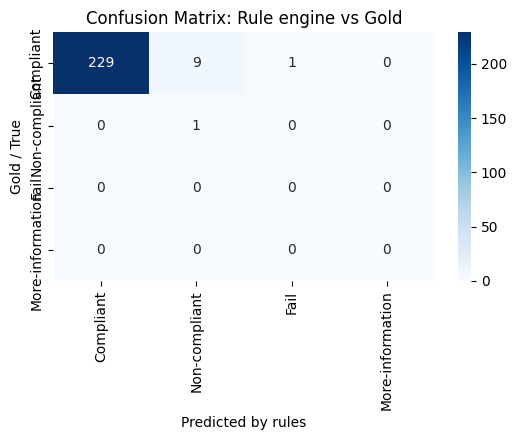

In [ ]:
import pandas as pd
from yesnorules import RULE_IDS, classify_compliance_with_reason
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import json, os

RAW_CSV      = "/content/drive/MyDrive/project/inference/stage1_raw_full_redacted.csv"
PRED_OUT_CSV = "/content/drive/MyDrive/project/CB/yesno_predictions.csv"
METRICS_JSON = "/content/drive/MyDrive/project/CB/rules_metrics.json"

# ── 1. Run the yes/no rules ──────────────────────────────────────
df   = pd.read_csv(RAW_CSV, dtype=str).fillna("")
mask = df["question_id"].isin(RULE_IDS)

results = df.loc[mask].apply(classify_compliance_with_reason, axis=1)
df.loc[mask, "compliancebyrules"] = [r[0] for r in results]
df.loc[mask, "rules_reason"]      = [r[1] for r in results]

# save every prediction the rule engine produced
(df.loc[mask, ["file", "question_id", "compliancebyrules", "rules_reason"]]
   .to_csv(PRED_OUT_CSV, index=False))
print(f"✅  Per‑row rule predictions written →  {PRED_OUT_CSV}")

# ── 2. Evaluate on rows that also have a gold label ─────────────
compare_df = df[mask & df["gold_label"].notna() & (df["gold_label"].str.strip() != "")]

all_labels = ["Compliant", "Non-compliant", "Fail", "More-information"]

print("\n=== Rules vs Gold Label CLASSIFICATION REPORT (only rule‑IDs) ===")
report_txt = classification_report(compare_df["gold_label"],
                                   compare_df["compliancebyrules"],
                                   labels=all_labels,
                                   zero_division=0,
                                   digits=3)
print(report_txt)

acc = accuracy_score(compare_df["gold_label"], compare_df["compliancebyrules"])
print(f"Overall Accuracy: {acc:.3f}")

# also capture metrics programmatically and save
report_dict = classification_report(compare_df["gold_label"],
                                    compare_df["compliancebyrules"],
                                    labels=all_labels,
                                    output_dict=True,
                                    zero_division=0,
                                    digits=3)
report_dict["overall_accuracy"] = acc
os.makedirs(os.path.dirname(METRICS_JSON), exist_ok=True)
with open(METRICS_JSON, "w") as f:
    json.dump(report_dict, f, indent=2)
print(f"✅  Metrics JSON written →  {METRICS_JSON}")

# ── 3. Confusion matrix plot ────────────────────────────────────
cm = confusion_matrix(compare_df["gold_label"],
                      compare_df["compliancebyrules"],
                      labels=all_labels)

plt.figure(figsize=(5.5,4.5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=all_labels, yticklabels=all_labels)
plt.xlabel("Predicted by rules"); plt.ylabel("Gold / True")
plt.title("Confusion Matrix: Rule engine vs Gold")
plt.tight_layout(); plt.show()


In [ ]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score

# Use the compare_df from your pipeline above.
# compare_df must have: question_id, gold_label, compliancebyrules

per_question_metrics = []

for qid, group in compare_df.groupby("question_id"):
    # Sometimes a group may only have one class, handle gracefully
    gold = group["gold_label"]
    pred = group["compliancebyrules"]
    labels_present = sorted(set(gold) | set(pred))

    # Classification report as dict
    report = classification_report(
        gold, pred, labels=labels_present,
        output_dict=True, zero_division=0, digits=3
    )
    # If only two classes, macro avg might not be present
    macro_f1 = report.get("macro avg", {}).get("f1-score", float("nan"))
    weighted_f1 = report.get("weighted avg", {}).get("f1-score", float("nan"))
    acc = accuracy_score(gold, pred)

    per_question_metrics.append({
        "question_id": qid,
        "accuracy": acc,
        "macro_f1": macro_f1,
        "weighted_f1": weighted_f1,
        "support": len(group)
    })

metrics_df = pd.DataFrame(per_question_metrics).sort_values("question_id")
pd.set_option('display.max_rows', 100)
display(metrics_df)


,question_id,accuracy,macro_f1,weighted_f1,support
0,A1.1,1.0,1.000000,1.000000,5
1,A1.10,1.0,1.000000,1.000000,5
2,A1.11,1.0,1.000000,1.000000,3
3,A1.2,1.0,1.000000,1.000000,5
4,A1.3,1.0,1.000000,1.000000,5
5,A1.4,1.0,1.000000,1.000000,5
6,A1.5,1.0,1.000000,1.000000,5
7,A1.6,1.0,1.000000,1.000000,5
8,A1.7,1.0,1.000000,1.000000,5
9,A1.8,1.0,1.000000,1.000000,5


In [ ]:
summary = (
    compare_df.assign(correct=(compare_df["gold_label"] == compare_df["compliancebyrules"]))
    .groupby("question_id")["correct"]
    .agg(
        correct_count="sum",
        total_count="count"
    )
    .reset_index()
)
summary["incorrect_count"] = summary["total_count"] - summary["correct_count"]
summary["incorrect_pct"] = (summary["incorrect_count"] / summary["total_count"] * 100).round(1)

# Reorder and sort by incorrect_pct descending
summary = summary[["question_id", "correct_count", "incorrect_count", "total_count", "incorrect_pct"]]
summary = summary.sort_values("incorrect_pct", ascending=False).reset_index(drop=True)

from IPython.display import display
display(summary)


,question_id,correct_count,incorrect_count,total_count,incorrect_pct
0,A6.3,2,3,5,60.0
1,A4.7,2,3,5,60.0
2,A4.9,2,2,4,50.0
3,A4.8,4,1,5,20.0
4,A7.8,4,1,5,20.0
5,A1.1,5,0,5,0.0
6,A1.5,5,0,5,0.0
7,A1.6,5,0,5,0.0
8,A1.7,5,0,5,0.0
9,A1.8,5,0,5,0.0


In [ ]:
# List of high-error question IDs you want to inspect
ids_to_check = ["A1,11"]


# Choose columns to display for audit
cols = [
    "question_id", "question_text", "answer_text", "gold_label",
    "compliancebyrules", "rules_reason"
]

from IPython.display import display
display(compare_df[compare_df["question_id"].isin(ids_to_check)][cols])

,question_id,question_text,answer_text,gold_label,compliancebyrules,rules_reason


In [ ]:
# List of high-error question IDs you want to inspect
ids_to_check = ["A4.7", "A6.3", "A4.9", "A4.8", "A7.8"]

# Filter: only incorrect rows for these IDs
incorrect_rows = compare_df[
    (compare_df["question_id"].isin(ids_to_check)) &
    (compare_df["gold_label"] != compare_df["compliancebyrules"])
]

# Choose columns to display for audit
cols = [
    "question_id", "question_text", "answer_text", "gold_label",
    "compliancebyrules", "rules_reason"
]

from IPython.display import display
display(incorrect_rows[cols])


,question_id,question_text,answer_text,gold_label,compliancebyrules,rules_reason
33,A4.7,is your firewall configured to allow unauthent...,no,Compliant,Non-compliant,Answered 'No' (non‑compliant)
35,A4.9,are your boundary firewalls configured to allo...,no,Compliant,Non-compliant,Answered 'No' (non‑compliant)
52,A6.3,are any of the in-scope software or cloud serv...,no,Compliant,Non-compliant,Answered 'No' (non‑compliant)
192,A4.7,is your firewall configured to allow unauthent...,no,Compliant,Non-compliant,Answered 'No' (non‑compliant)
194,A4.9,are your boundary firewalls configured to allo...,no,Compliant,Non-compliant,Answered 'No' (non‑compliant)
208,A6.3,are any of the in-scope software or cloud serv...,no,Compliant,Non-compliant,Answered 'No' (non‑compliant)
272,A4.7,is your firewall configured to allow unauthent...,no,Compliant,Non-compliant,Answered 'No' (non‑compliant)
291,A6.3,are any of the in-scope software or cloud serv...,no,Compliant,Non-compliant,Answered 'No' (non‑compliant)
356,A4.8,are your boundary firewalls configured to allo...,not applicable,Compliant,Fail,Non‑scoring Yes/No left blank
393,A7.8,do you formally track which users have adminis...,no no separate administrator accounts are used,Compliant,Non-compliant,Answered 'No' (non‑compliant)


**Summary of the rule-based check versus the assessor’s gold labels**


The rule engine, which encodes the official IASME / Cyber-Essentials self-assessment marking notes, aligned with the assessor in 95.8 % of the 220 judgements where rules were applicable.

- Overall accuracy: 0.958

- Weighted F1: 0.975 (dominated by the large “Compliant” class)

- Macro-averaged F1: 0.290 – low because almost every row is “Compliant”, so the single truly “Non-compliant” instance skews the macro score.

- Per-question performance: 43 of the 48 question-IDs evaluated achieved a perfect 100 % accuracy; five IDs generated mismatches (see below).




**Interpretation**




Disagreements between the rule engine and assessor are both expected and intentional. The automated rules are designed to strictly enforce the official Cyber Essentials marking guidance, which requires that any question left blank, marked as ‘not applicable’ or ‘N/A’, or not directly answered must be marked as a failure. The guidance also states that assessors should not seek or review detailed supporting evidence beyond asset information; such scrutiny is reserved for the audited “Plus” assessment.



As a result, whenever an answer is missing or marked “N/A,” the rule engine correctly applies a “Fail,” per the marking guide. For certain questions—such as A4.7, A6.3, A4.9, and A7.8—the rules also require that any negative answer (“No”) results in a “Non-compliant” outcome, even if an assessor would have accepted it. This strict, guidance-driven approach may occasionally differ from the gold labels, which can reflect assessor discretion, misunderstanding, or bias. However, these stricter rule-based classifications are not only justified, but fully aligned with the published Cyber Essentials requirements and the expectations set out in the marking guidance.

### **INFERENCE FOR CLASSIFICATION BY SEMANTIC FRAMES**

In [ ]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 105.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


### Define Global patterns

In [ ]:
# 🔹 Add global patterns (optional, not per-question specific)
%%writefile global_patterns.py

global_patterns = [
{"label": "TOOL", "pattern": "SentinelOne"},
{"label": "TOOL", "pattern": "Antivirus"},
{"label": "DEVICE", "pattern": "laptops"},
{"label": "DEVICE", "pattern": "servers"},
{"label": "ROLE", "pattern": "administrator"},
{"label": "ROLE", "pattern": [{"LOWER": "it"}, {"LOWER": "manager"}]},
{"label": "ROLE", "pattern": [{"LOWER": "director"}]},
{"label": "ROLE", "pattern": [{"LOWER": "head"}, {"LOWER": "of"}, {"LOWER": "it"}]},
{"label": "LOCATION", "pattern": "aberdeen"},
{"label": "LOCATION", "pattern": "glasgow"},
{"label": "LOCATION", "pattern": "bathgate"},
{"label": "LOCATION", "pattern": "elgin"},
{"label": "LOCATION", "pattern": "dundee"},
{"label": "LOCATION", "pattern": "swansea"},
{"label": "LOCATION", "pattern": "bengaluru"},
{"label": "LOCATION", "pattern": "sydney"},
{"label": "LOCATION", "pattern": "frankfurt"},
{"label": "LOCATION", "pattern": "rosyth"},
{"label": "LOCATION", "pattern": "san jose"},
{"label": "LOCATION", "pattern": "lafayette"},
{"label": "LOCATION", "pattern": "congo"},
{"label": "LOCATION", "pattern": "winchester"},
{"label": "LOCATION", "pattern": "nairobi"},
{"label": "LOCATION", "pattern": "istanbul"},
{"label": "LOCATION", "pattern": "hong kong"},
{"label": "LOCATION", "pattern": "turkey"},
{"label": "SCOPE", "pattern": "all uk offices"},
{"label": "SCOPE", "pattern": "remote"},
{"label": "SCOPE", "pattern": "hybrid"},
{"label": "SCOPE", "pattern": "buildings"},
{"label": "OS", "pattern": [{"LOWER": "windows"}, {"IS_DIGIT": True}]},
{"label": "OS", "pattern": [{"LOWER": "windows"}, {"TEXT": {"REGEX": "10|11"}}]},
{"label": "OS", "pattern": [{"LOWER": "macos"}, {"TEXT": {"REGEX": "sonoma|ventura|sequoia|monterey"}}]},
{"label": "OS", "pattern": [{"LOWER": "linux"}]},
{"label": "OS", "pattern": [{"LOWER": "ubuntu"}]},
{"label": "OS", "pattern": [{"LOWER": "mageia"}]},
{"label": "OS", "pattern": [{"LOWER": "fedora"}]},
{"label": "OS", "pattern": [{"LOWER": "android"}]},
{"label": "OS", "pattern": [{"LOWER": "ios"}]},
{"label": "OS", "pattern": [{"LOWER": "ipados"}]},
{"label": "TOOL", "pattern": [{"LOWER": "intune"}]},
{"label": "TOOL", "pattern": [{"LOWER": "sccm"}]},
{"label": "DEVICE", "pattern": [{"LOWER": "laptop"}]},
{"label": "DEVICE", "pattern": [{"LOWER": "desktop"}]},
{"label": "DEVICE", "pattern": [{"LOWER": "virtual"}, {"LOWER": "desktop"}]},
{"label": "DEVICE", "pattern": [{"LOWER": "macbook"}]},
{"label": "DEVICE", "pattern": [{"LOWER": "surface"}]},
{"label": "DEVICE", "pattern": [{"LOWER": "ipad"}]},
{"label": "DEVICE", "pattern": [{"LOWER": "nuc"}]},
{"label": "DEVICE", "pattern": [{"LOWER": "thin"}, {"LOWER": "client"}]},
{"label": "OS", "pattern": [{"LOWER": "igel"}, {"LOWER": "os"}]},
{"label": "OS", "pattern": [{"LOWER": "hp"}, {"LOWER": "thin"}, {"LOWER": "os"}]},
{"label": "OS", "pattern": [{"LOWER": "windows"}, {"IS_DIGIT": True}]},
{"label": "OS", "pattern": [{"LOWER": "linux"}]},
{"label": "OS", "pattern": [{"LOWER": "ubuntu"}]},
{"label": "TOOL", "pattern": [{"LOWER": "virtual"}, {"LOWER": "desktop"}]},
{"label": "OS", "pattern": [{"LOWER": "windows"}, {"LOWER": "server"}, {"IS_DIGIT": True}]},
{"label": "OS", "pattern": [{"LOWER": "ubuntu"}, {"TEXT": {"REGEX": "\d+\.\d+"}}]},
{"label": "OS", "pattern": [{"LOWER": "redhat"}, {"LOWER": "linux"}]},
{"label": "OS", "pattern": [{"LOWER": "rocky"}, {"LOWER": "linux"}]},
{"label": "OS", "pattern": [{"LOWER": "oracle"}, {"LOWER": "linux"}]},
{"label": "OS", "pattern": [{"LOWER": "centos"}]},
{"label": "OS", "pattern": [{"LOWER": "debian"}]},
{"label": "TOOL", "pattern": [{"LOWER": "vmware"}, {"LOWER": "esxi"}]},
{"label": "TOOL", "pattern": [{"LOWER": "hyper"}, {"LOWER": "v"}]},
{"label": "TOOL", "pattern": [{"LOWER": "proxmox"}]},
{"label": "TOOL", "pattern": [{"LOWER": "vcenter"}]},
{"label": "TOOL", "pattern": [{"LOWER": "azure"}]},
{"label": "TOOL", "pattern": [{"LOWER": "gcp"}]},
{"label": "TOOL", "pattern": [{"LOWER": "cloud"}, {"LOWER": "run"}]},
{"label": "DEVICE", "pattern": [{"LOWER": "iphone"}]},
{"label": "DEVICE", "pattern": [{"LOWER": "ipad"}]},
{"label": "DEVICE", "pattern": [{"LOWER": "android"}, {"LOWER": "phone"}]},
{"label": "DEVICE", "pattern": [{"LOWER": "tablet"}]},
{"label": "DEVICE", "pattern": [{"LOWER": "mobile"}, {"LOWER": "device"}]},
{"label": "OS", "pattern": [{"LOWER": "ios"}]},
{"label": "OS", "pattern": [{"LOWER": "ipados"}]},
{"label": "OS", "pattern": [{"LOWER": "android"}]},
{"label": "OS", "pattern": [{"LOWER": "coloros"}]},
{"label": "OS", "pattern": [{"LOWER": "magic"}, {"LOWER": "os"}]},
{"label": "OS", "pattern": [{"LOWER": "emu1"}]},
{"label": "LOCATION", "pattern": "aberdeen"},
{"label": "LOCATION", "pattern": "glasgow"},
{"label": "LOCATION", "pattern": "london"},
{"label": "LOCATION", "pattern": "coventry"},
{"label": "LOCATION", "pattern": "lichfield"},
{"label": "LOCATION", "pattern": "turkey"},
{"label": "LOCATION", "pattern": "reading"},
{"label": "LOCATION", "pattern": "zurich"},
{"label": "LOCATION", "pattern": "bangalore"},
{"label": "LOCATION", "pattern": "gurgaon"},
{"label": "LOCATION", "pattern": "virginia"},
{"label": "LOCATION", "pattern": "il"},
{"label": "DEVICE", "pattern": [{"LOWER": "router"}]},
{"label": "TOOL", "pattern": [{"LOWER": "vpn"}]},
{"label": "TOOL", "pattern": [{"LOWER": "azure"}]},
{"label": "TOOL", "pattern": [{"LOWER": "lan"}]},
{"label": "TOOL", "pattern": [{"LOWER": "wi-fi"}]},
{"label": "TOOL", "pattern": [{"LOWER": "network"}]},
{"label": "ROLE", "pattern": [{"LOWER": "home"}, {"LOWER": "worker"}]},
{"label": "ROLE", "pattern": [{"LOWER": "remote"}, {"LOWER": "worker"}]},
{"label": "ROLE", "pattern": [{"LOWER": "hybrid"}, {"LOWER": "worker"}]},
{"label": "TOOL", "pattern": [{"LOWER": "vpn"}]},
{"label": "TOOL", "pattern": [{"LOWER": "remote"}, {"LOWER": "access"}]},
{"label": "TOOL", "pattern": [{"LOWER": "fortigate"}]},
{"label": "TOOL", "pattern": [{"LOWER": "cisco"}, {"TEXT": {"REGEX": ".*"}}]},
{"label": "TOOL", "pattern": [{"LOWER": "fortigate"}]},
{"label": "TOOL", "pattern": [{"LOWER": "meraki"}]},
{"label": "TOOL", "pattern": [{"LOWER": "draytek"}]},
{"label": "TOOL", "pattern": [{"LOWER": "palo"}, {"LOWER": "alto"}]},
{"label": "TOOL", "pattern": [{"LOWER": "watchguard"}]},
{"label": "TOOL", "pattern": [{"LOWER": "juniper"}]},
{"label": "TOOL", "pattern": [{"LOWER": "tp-link"}]},
{"label": "TOOL", "pattern": [{"LOWER": "asus"}]},
{"label": "TOOL", "pattern": [{"LOWER": "bitdefender"}]},
{"label": "TOOL", "pattern": [{"LOWER": "windows"}, {"LOWER": "defender"}]},
{"label": "TOOL", "pattern": [{"LOWER": "sophos"}]},
{"label": "TOOL", "pattern": [{"LOWER": "untangle"}]},
{"label": "TOOL", "pattern": [{"LOWER": "pfsense"}]},
{"label": "TOOL", "pattern": [{"LOWER": "technicolor"}]},
{"label": "TOOL", "pattern": [{"LOWER": "vodafone"}]},
{"label": "TOOL", "pattern": [{"LOWER": "smart"}, {"LOWER": "hub"}]},
{"label": "TOOL", "pattern": [{"LOWER": "nokia"}]},
{"label": "TOOL", "pattern": [{"LOWER": "algosec"}]},
{"label": "TOOL", "pattern": [{"LOWER": "barracuda"}]},
{"label": "TOOL", "pattern": [{"LOWER": "azure"}, {"LOWER": "virtual"}, {"LOWER": "firewall"}]},
{"label": "TOOL", "pattern": [{"LOWER": "microsoft"}, {"LOWER": "365"}]},
{"label": "TOOL", "pattern": [{"LOWER": "google"}, {"LOWER": "workspace"}]},
{"label": "TOOL", "pattern": [{"LOWER": "aws"}]},
{"label": "TOOL", "pattern": [{"LOWER": "azure"}]},
{"label": "TOOL", "pattern": [{"LOWER": "dropbox"}]},
{"label": "TOOL", "pattern": [{"LOWER": "salesforce"}]},
{"label": "TOOL", "pattern": [{"LOWER": "zendesk"}]},
{"label": "TOOL", "pattern": [{"LOWER": "jira"}]},
{"label": "TOOL", "pattern": [{"LOWER": "github"}]},
{"label": "TOOL", "pattern": [{"LOWER": "adobe"}]},
{"label": "TOOL", "pattern": [{"LOWER": "crowdstrike"}]},
{"label": "TOOL", "pattern": [{"LOWER": "cloudflare"}]},
{"label": "TOOL", "pattern": [{"LOWER": "slack"}]},
{"label": "TOOL", "pattern": [{"LOWER": "zoom"}]},
{"label": "TOOL", "pattern": [{"LOWER": "asana"}]},
{"label": "TOOL", "pattern": [{"LOWER": "teamviewer"}]},
{"label": "TOOL", "pattern": [{"LOWER": "jamf"}]},
{"label": "TOOL", "pattern": [{"LOWER": "xero"}]},
{"label": "TOOL", "pattern": [{"LOWER": "imperva"}]},
{"label": "TOOL", "pattern": [{"LOWER": "wiz"}]},
{"label": "TOOL", "pattern": [{"LOWER": "oracle"}, {"LOWER": "cloud"}]},
{"label": "TOOL", "pattern": [{"LOWER": "netsuite"}]},
{"label": "TOOL", "pattern": [{"LOWER": "famly"}]},
{"label": "TOOL", "pattern": [{"LOWER": "doctract"}]},
{"label": "TOOL", "pattern": [{"LOWER": "datadog"}]},
{"label": "TOOL", "pattern": [{"LOWER": "survey"}, {"LOWER": "monkey"}]},
{"label": "TOOL", "pattern": [{"LOWER": "sharepoint"}]},
{"label": "TOOL", "pattern": [{"LOWER": "onedrive"}]},
{"label": "TOOL", "pattern": [{"LOWER": "software"}, {"LOWER": "firewall"}]},
{"label": "TOOL", "pattern": [{"LOWER": "windows"}, {"LOWER": "firewall"}]},
{"label": "TOOL", "pattern": [{"LOWER": "defender"}, {"LOWER": "firewall"}]},
{"label": "TOOL", "pattern": [{"LOWER": "macos"}, {"LOWER": "firewall"}]},
{"label": "TOOL", "pattern": [{"LOWER": "bitdefender"}]},
{"label": "TOOL", "pattern": [{"LOWER": "eset"}]},
{"label": "TOOL", "pattern": [{"LOWER": "iptables"}]},
{"label": "TOOL", "pattern": [{"LOWER": "vpn"}]},
{"label": "TOOL", "pattern": [{"LOWER": "globalprotect"}]},
{"label": "TOOL", "pattern": [{"LOWER": "intune"}]},
{"label": "TOOL", "pattern": [{"LOWER": "cloudflare"}, {"LOWER": "warp"}]},
{"label": "TOOL", "pattern": [{"LOWER": "group"}, {"LOWER": "policy"}]},
{"label": "TOOL", "pattern": [{"LOWER": "jamf"}]},
{"label": "TOOL", "pattern": [{"LOWER": "posture"}, {"LOWER": "check"}]},
{"label": "TOOL", "pattern": [{"LOWER": "roboshadow"}]},
{"label": "SECURITY", "pattern": [{"LOWER": "mfa"}]},
{"label": "SECURITY", "pattern": [{"LOWER": "2fa"}]},
{"label": "SECURITY", "pattern": [{"LOWER": "multi"}, {"LOWER": "factor"}, {"LOWER": "authentication"}]},
{"label": "SECURITY", "pattern": [{"LOWER": "trusted"}, {"LOWER": "ip"}]},
{"label": "SECURITY", "pattern": [{"LOWER": "ip"}, {"LOWER": "restriction"}]},
{"label": "SECURITY", "pattern": [{"LOWER": "ip"}, {"LOWER": "filter"}]},
{"label": "SECURITY", "pattern": [{"LOWER": "geo"}, {"LOWER": "block"}]},
{"label": "SECURITY", "pattern": [{"LOWER": "brute"}, {"LOWER": "force"}]},
{"label": "SECURITY", "pattern": [{"LOWER": "captcha"}]},
{"label": "TOOL", "pattern": "JumpCloud"},
{"label": "TOOL", "pattern": "Meraki"},
{"label": "TOOL", "pattern": "LastPass"},
{"label": "TOOL", "pattern": "Bitwarden"},
{"label": "TOOL", "pattern": "Azure"},
{"label": "TOOL", "pattern": "Cisco"},
{"label": "TOOL", "pattern": "Fortigate"},
{"label": "ROLE", "pattern": "IT support"},
{"label": "ROLE", "pattern": [{"LOWER": "network"}, {"LOWER": "admin"}]},
{"label": "TOOL", "pattern": "Jira"},
{"label": "TOOL", "pattern": "ServiceNow"},
{"label": "TOOL", "pattern": "Firewall Register"},
{"label": "ROLE", "pattern": [{"LOWER": "ict"}, {"LOWER": "manager"}]},
{"label": "ROLE", "pattern": [{"LOWER": "security"}, {"LOWER": "director"}]},
{"label": "ROLE", "pattern": [{"LOWER": "support"}, {"LOWER": "director"}]},
{"label": "ROLE", "pattern": [{"LOWER": "senior"}, {"LOWER": "management"}]},
{"label": "ROLE", "pattern": "partner"},
{"label": "ORG", "pattern": "Gamma"},
{"label": "ORG", "pattern": "Converged Communication Solutions"},
{"label": "ORG", "pattern": "Simblox Technologies"},
{"label": "TOOL", "pattern": [{"LOWER": "intune"}]},
{"label": "TOOL", "pattern": [{"LOWER": "jamf"}]},
{"label": "TOOL", "pattern": [{"LOWER": "rmm"}]},
{"label": "TOOL", "pattern": [{"LOWER": "sccm"}]},
{"label": "TOOL", "pattern": [{"LOWER": "datto"}]},
{"label": "TOOL", "pattern": [{"LOWER": "endpoint"}, {"LOWER": "central"}]},
{"label": "TOOL", "pattern": [{"LOWER": "manageengine"}]},
{"label": "TOOL", "pattern": [{"LOWER": "crowdstrike"}]},
{"label": "TOOL", "pattern": [{"LOWER": "tanium"}]},
{"label": "PROCESS", "pattern": [{"LOWER": "standard"}, {"LOWER": "build"}]},
{"label": "PROCESS", "pattern": [{"LOWER": "remove"}, {"LOWER": "bloatware"}]},
{"label": "PROCESS", "pattern": [{"LOWER": "preinstalled"}, {"LOWER": "software"}]},
{"label": "CLOUD", "pattern": [{"LOWER": "microsoft"}, {"LOWER": "365"}]},
{"label": "CLOUD", "pattern": [{"LOWER": "cloud"}, {"LOWER": "services"}]},
{"label": "CLOUD", "pattern": [{"LOWER": "untick"}, {"LOWER": "services"}]},
{"label": "TOOL", "pattern": [{"LOWER": "intune"}]},
{"label": "TOOL", "pattern": [{"LOWER": "jamf"}]},
{"label": "TOOL", "pattern": [{"LOWER": "rmm"}]},
{"label": "TOOL", "pattern": [{"LOWER": "sccm"}]},
{"label": "TOOL", "pattern": [{"LOWER": "datto"}]},
{"label": "TOOL", "pattern": [{"LOWER": "endpoint"}, {"LOWER": "central"}]},
{"label": "TOOL", "pattern": [{"LOWER": "manageengine"}]},
{"label": "TOOL", "pattern": [{"LOWER": "crowdstrike"}]},
{"label": "TOOL", "pattern": [{"LOWER": "tanium"}]},
{"label": "PROCESS", "pattern": [{"LOWER": "standard"}, {"LOWER": "build"}]},
{"label": "PROCESS", "pattern": [{"LOWER": "bloatware"}, {"LOWER": "removed"}]},
{"label": "PROCESS", "pattern": [{"LOWER": "reviewed"}, {"LOWER": "quarterly"}]},
{"label": "CLOUD", "pattern": [{"LOWER": "microsoft"}, {"LOWER": "365"}, {"LOWER": "admin"}, {"LOWER": "portal"}]},
{"label": "CLOUD", "pattern": [{"LOWER": "cloud"}, {"LOWER": "services"}]},
{"label": "CLOUD", "pattern": [{"LOWER": "cloud"}, {"LOWER": "applications"}]},
{"label": "CLOUD", "pattern": [{"LOWER": "untick"}, {"LOWER": "services"}]},
{"label": "AUTH", "pattern": [{"LOWER": "biometric"}]},
{"label": "AUTH", "pattern": [{"LOWER": "fingerprint"}]},
{"label": "AUTH", "pattern": [{"LOWER": "faceid"}]},
{"label": "AUTH", "pattern": [{"LOWER": "windows"}, {"LOWER": "hello"}]},
{"label": "AUTH", "pattern": [{"LOWER": "touch"}, {"LOWER": "id"}]},
{"label": "AUTH", "pattern": [{"LOWER": "yubikey"}]},
{"label": "AUTH", "pattern": [{"LOWER": "password"}]},
{"label": "AUTH", "pattern": [{"LOWER": "passphrase"}]},
{"label": "AUTH", "pattern": [{"LOWER": "pin"}]},
{"label": "SECURITY", "pattern": [{"LOWER": "mfa"}]},
{"label": "SECURITY", "pattern": [{"LOWER": "2fa"}]},
{"label": "REQUIREMENT", "pattern": [{"LOWER": "physical"}, {"LOWER": "presence"}]},
{"label": "REQUIREMENT", "pattern": [{"LOWER": "minimum"}, {"LOWER": "password"}, {"LOWER": "length"}]},
{"label": "REQUIREMENT", "pattern": [{"LOWER": "account"}, {"LOWER": "lockout"}]},
{"label": "REQUIREMENT", "pattern": [{"LOWER": "deny"}, {"LOWER": "list"}]},
{"label": "REQUIREMENT", "pattern": [{"LOWER": "password"}, {"LOWER": "complexity"}]},
{"label": "REQUIREMENT", "pattern": [{"LOWER": "unlock"}, {"LOWER": "device"}]},
{"label": "BROWSER", "pattern": [{"LOWER": "chrome"}]},
{"label": "BROWSER", "pattern": [{"LOWER": "google"}, {"LOWER": "chrome"}]},
{"label": "BROWSER", "pattern": [{"LOWER": "safari"}]},
{"label": "BROWSER", "pattern": [{"LOWER": "edge"}]},
{"label": "BROWSER", "pattern": [{"LOWER": "microsoft"}, {"LOWER": "edge"}]},
{"label": "BROWSER", "pattern": [{"LOWER": "firefox"}]},
{"label": "BROWSER", "pattern": [{"LOWER": "mozilla"}, {"LOWER": "firefox"}]},
{"label": "BROWSER", "pattern": [{"LOWER": "opera"}]},
{"label": "BROWSER", "pattern": [{"LOWER": "chromium"}]},
{"label": "BROWSER", "pattern": [{"LOWER": "samsung"}, {"LOWER": "internet"}]},
{"label": "VERSION", "pattern": [{"TEXT": {"REGEX": "^(\\d{2,3})(\\.\\d+)+$"}}]},
{"label": "VERSION", "pattern": [{"LOWER": "version"}, {"TEXT": {"REGEX": "^(\\d{2,3})(\\.\\d+)+$"}}]},
{"label": "ANTIVIRUS", "pattern": [{"LOWER": "windows"}, {"LOWER": "defender"}]},
{"label": "ANTIVIRUS", "pattern": [{"LOWER": "bitdefender"}]},
{"label": "ANTIVIRUS", "pattern": [{"LOWER": "eset"}]},
{"label": "ANTIVIRUS", "pattern": [{"LOWER": "sophos"}]},
{"label": "ANTIVIRUS", "pattern": [{"LOWER": "sentinelone"}]},
{"label": "ANTIVIRUS", "pattern": [{"LOWER": "crowdstrike"}]},
{"label": "ANTIVIRUS", "pattern": [{"LOWER": "mcafee"}]},
{"label": "ANTIVIRUS", "pattern": [{"LOWER": "clamav"}]},
{"label": "ANTIVIRUS", "pattern": [{"LOWER": "norton"}]},
{"label": "ANTIVIRUS", "pattern": [{"LOWER": "xprotect"}]},
{"label": "VERSION", "pattern": [{"TEXT": {"REGEX": "^\\d{1,3}(\\.\\d+){1,4}$"}}]},
{"label": "VERSION", "pattern": [{"LOWER": "version"}, {"TEXT": {"REGEX": "^\\d{1,3}(\\.\\d+){1,4}$"}}]},
{"label": "EMAIL_APP", "pattern": [{"LOWER": "outlook"}]},
{"label": "EMAIL_APP", "pattern": [{"LOWER": "gmail"}]},
{"label": "EMAIL_APP", "pattern": [{"LOWER": "exchange"}]},
{"label": "EMAIL_APP", "pattern": [{"LOWER": "office"}, {"LOWER": "365"}]},
{"label": "EMAIL_APP", "pattern": [{"LOWER": "microsoft"}, {"LOWER": "365"}]},
{"label": "EMAIL_APP", "pattern": [{"LOWER": "google"}, {"LOWER": "workspace"}]},
{"label": "EMAIL_APP", "pattern": [{"LOWER": "superhuman"}]},
{"label": "EMAIL_APP", "pattern": [{"LOWER": "iphone"}, {"LOWER": "mail"}]},
{"label": "VERSION", "pattern": [{"TEXT": {"REGEX": "^\\d{1,3}(\\.\\d+){1,4}$"}}]},
{"label": "VERSION", "pattern": [{"LOWER": "version"}, {"TEXT": {"REGEX": "^\\d{1,3}(\\.\\d+){1,4}$"}}]},
{"label": "OFFICE_APP", "pattern": [{"LOWER": "microsoft"}, {"LOWER": "365"}]},
{"label": "OFFICE_APP", "pattern": [{"LOWER": "office"}, {"LOWER": "365"}]},
{"label": "OFFICE_APP", "pattern": [{"LOWER": "google"}, {"LOWER": "workspace"}]},
{"label": "OFFICE_APP", "pattern": [{"LOWER": "libreoffice"}]},
{"label": "OFFICE_APP", "pattern": [{"LOWER": "office"}, {"LOWER": "2016"}]},
{"label": "OFFICE_APP", "pattern": [{"LOWER": "office"}, {"LOWER": "2019"}]},
{"label": "OFFICE_APP", "pattern": [{"LOWER": "office"}, {"LOWER": "2021"}]},
{"label": "OFFICE_APP", "pattern": [{"LOWER": "office"}, {"LOWER": "2024"}]},
{"label": "OFFICE_APP", "pattern": [{"LOWER": "adobe"}, {"LOWER": "creative"}, {"LOWER": "cloud"}]},
{"label": "OFFICE_APP", "pattern": [{"LOWER": "affinity"}, {"LOWER": "publisher"}]},
{"label": "OFFICE_APP", "pattern": [{"LOWER": "netdocuments"}]},
{"label": "VERSION", "pattern": [{"TEXT": {"REGEX": "^v?\\d{2,4}(\\.\\d+)*$"}}]},
{"label": "VERSION", "pattern": [{"LOWER": "version"}, {"TEXT": {"REGEX": "^\\d{2,4}(\\.\\d+)*$"}}]},
{"label": "SECURITY_PROCESS", "pattern": [{"LOWER": "manual"}, {"LOWER": "updates"}]},
{"label": "SECURITY_PROCESS", "pattern": [{"LOWER": "patching"}, {"LOWER": "schedule"}]},
{"label": "SECURITY_PROCESS", "pattern": [{"LOWER": "auto"}, {"LOWER": "updates"}]},
{"label": "SECURITY_PROCESS", "pattern": [{"LOWER": "weekly"}, {"LOWER": "updates"}]},
{"label": "SECURITY_PROCESS", "pattern": [{"LOWER": "firmware"}, {"LOWER": "updates"}]},
{"label": "UPDATE_TOOL", "pattern": [{"LOWER": "intune"}]},
{"label": "UPDATE_TOOL", "pattern": [{"LOWER": "datto"}]},
{"label": "UPDATE_TOOL", "pattern": [{"LOWER": "rmm"}]},
{"label": "UPDATE_TOOL", "pattern": [{"LOWER": "connectwise"}]},
{"label": "UPDATE_TOOL", "pattern": [{"LOWER": "patchmypc"}]},
{"label": "UPDATE_TOOL", "pattern": [{"LOWER": "solarwinds"}]},
{"label": "UPDATE_TOOL", "pattern": [{"LOWER": "appcheck"}]},
{"label": "SECURITY_PROCESS", "pattern": [{"LOWER": "helpdesk"}]},
{"label": "SECURITY_PROCESS", "pattern": [{"LOWER": "manual"}, {"LOWER": "intervention"}]},
{"label": "SECURITY_PROCESS", "pattern": [{"LOWER": "manual"}, {"LOWER": "update"}]},
{"label": "SECURITY_PROCESS", "pattern": [{"LOWER": "patch"}, {"LOWER": "management"}]},
{"label": "SECURITY_PROCESS", "pattern": [{"LOWER": "ticket"}]},
{"label": "SECURITY_PROCESS", "pattern": [{"LOWER": "helpdesk"}]},
{"label": "SECURITY_PROCESS", "pattern": [{"LOWER": "engineer"}, {"LOWER": "assigned"}]},
{"label": "SECURITY_PROCESS", "pattern": [{"LOWER": "remote"}, {"LOWER": "session"}]},
{"label": "SECURITY_PROCESS", "pattern": [{"LOWER": "14"}, {"LOWER": "days"}]},
{"label": "SECURITY_PROCESS", "pattern": [{"LOWER": "update"}, {"LOWER": "installed"}]},
{"label": "UPDATE_TOOL", "pattern": [{"LOWER": "intune"}]},
{"label": "UPDATE_TOOL", "pattern": [{"LOWER": "datto"}]},
{"label": "UPDATE_TOOL", "pattern": [{"LOWER": "rmm"}]},
{"label": "UPDATE_TOOL", "pattern": [{"LOWER": "connectwise"}]},
{"label": "UPDATE_TOOL", "pattern": [{"LOWER": "patchmypc"}]},
{"label": "UPDATE_TOOL", "pattern": [{"LOWER": "crowdstrike"}]},
{"label": "UPDATE_TOOL", "pattern": [{"LOWER": "jamf"}]},
{"label": "UPDATE_TOOL", "pattern": [{"LOWER": "cyrisma"}]},
{"label": "UPDATE_TOOL", "pattern": [{"LOWER": "manageengine"}]},
{"label": "UPDATE_TOOL", "pattern": [{"LOWER": "wsus"}]},
{"label": "UPDATE_TOOL", "pattern": [{"LOWER": "noc"}, {"LOWER": "team"}]},
{"label": "SECURITY_POLICY", "pattern": [{"LOWER": "no"}, {"LOWER": "unsupported"}, {"LOWER": "software"}]},
{"label": "SECURITY_POLICY", "pattern": [{"LOWER": "unsupported"}, {"LOWER": "software"}, {"LOWER": "removed"}]},
{"label": "SEGREGATION_METHOD", "pattern": [{"LOWER": "vlan"}]},
{"label": "SEGREGATION_METHOD", "pattern": [{"LOWER": "sub"}, {"LOWER": "set"}]},
{"label": "SEGREGATION_METHOD", "pattern": [{"LOWER": "firewall"}]},
{"label": "SEGREGATION_METHOD", "pattern": [{"LOWER": "segregated"}]},
{"label": "SEGREGATION_METHOD", "pattern": [{"LOWER": "proxy"}]},
{"label": "SEGREGATION_METHOD", "pattern": [{"LOWER": "network"}, {"LOWER": "separation"}]},
{"label": "SEGREGATION_METHOD", "pattern": [{"LOWER": "no"}, {"LOWER": "internet"}, {"LOWER": "access"}]},
{"label": "UPDATE_TOOL", "pattern": [{"LOWER": "jamf"}]},
{"label": "UPDATE_TOOL", "pattern": [{"LOWER": "intune"}]},
{"label": "UPDATE_TOOL", "pattern": [{"LOWER": "datto"}, {"LOWER": "rmm"}]},
{"label": "UPDATE_TOOL", "pattern": [{"LOWER": "soe"}]},
{"label": "UPDATE_TOOL", "pattern": [{"LOWER": "software"}, {"LOWER": "register"}]},
{"label": "ROLE", "pattern": [{"LOWER": "hr"}]},
{"label": "ROLE", "pattern": [{"LOWER": "director"}]},
{"label": "ROLE", "pattern": [{"LOWER": "ceo"}]},
{"label": "ROLE", "pattern": [{"LOWER": "manager"}]},
{"label": "ROLE", "pattern": [{"LOWER": "line"}, {"LOWER": "manager"}]},
{"label": "ROLE", "pattern": [{"LOWER": "founder"}]},
{"label": "ROLE", "pattern": [{"LOWER": "operations"}, {"LOWER": "director"}]},
{"label": "ROLE", "pattern": [{"LOWER": "engineering"}, {"LOWER": "lead"}]},
{"label": "ROLE", "pattern": [{"LOWER": "cab"}]},
{"label": "ROLE", "pattern": [{"LOWER": "coo"}]},
{"label": "TOOL", "pattern": [{"LOWER": "servicedesk"}]},
{"label": "TOOL", "pattern": [{"LOWER": "jira"}]},
{"label": "TOOL", "pattern": [{"LOWER": "personio"}]},
{"label": "TOOL", "pattern": [{"LOWER": "jumpcloud"}]},
{"label": "TOOL", "pattern": [{"LOWER": "microsoft"}, {"LOWER": "admin"}, {"LOWER": "centre"}]},
{"label": "TOOL", "pattern": [{"LOWER": "mdm"}]},
{"label": "TOOL", "pattern": [{"LOWER": "intune"}]},
{"label": "TOOL", "pattern": [{"LOWER": "sword"}]},
{"label": "TOOL", "pattern": [{"LOWER": "eskimo"}]},
{"label": "TOOL", "pattern": [{"LOWER": "adaxes"}]},
{"label": "SECURITY_MEASURE", "pattern": [{"LOWER": "mfa"}]},
{"label": "SECURITY_MEASURE", "pattern": [{"LOWER": "multi"}, {"LOWER": "factor"}, {"LOWER": "authentication"}]},
{"label": "SECURITY_MEASURE", "pattern": [{"LOWER": "2fa"}]},
{"label": "SECURITY_MEASURE", "pattern": [{"LOWER": "rate"}, {"LOWER": "limit"}]},
{"label": "SECURITY_MEASURE", "pattern": [{"LOWER": "throttling"}]},
{"label": "SECURITY_MEASURE", "pattern": [{"LOWER": "lockout"}, {"LOWER": "policy"}]},
{"label": "TOOL", "pattern": [{"LOWER": "smart"}, {"LOWER": "lockout"}]},
{"label": "TOOL", "pattern": [{"LOWER": "entra"}]},
{"label": "TOOL", "pattern": [{"LOWER": "bitdefender"}]},
{"label": "TOOL", "pattern": [{"LOWER": "azure"}, {"LOWER": "ad"}]},
{"label": "TOOL", "pattern": [{"LOWER": "defender"}]},
{"label": "SECURITY_MEASURE", "pattern": [{"LOWER": "mfa"}]},
{"label": "SECURITY_MEASURE", "pattern": [{"LOWER": "multi"}, {"LOWER": "factor"}, {"LOWER": "authentication"}]},
{"label": "SECURITY_MEASURE", "pattern": [{"LOWER": "deny"}, {"LOWER": "list"}]},
{"label": "SECURITY_MEASURE", "pattern": [{"LOWER": "automatic"}, {"LOWER": "blocking"}, {"LOWER": "of"}, {"LOWER": "common"}, {"LOWER": "passwords"}]},
{"label": "SECURITY_MEASURE", "pattern": [{"LOWER": "password"}, {"LOWER": "length"}]},
{"label": "POLICY", "pattern": [{"LOWER": "password"}, {"LOWER": "policy"}]},
{"label": "POLICY", "pattern": [{"LOWER": "password"}, {"LOWER": "history"}]},
{"label": "TOOL", "pattern": [{"LOWER": "entra"}]},
{"label": "TOOL", "pattern": [{"LOWER": "intune"}]},
{"label": "TOOL", "pattern": [{"LOWER": "jumpcloud"}]},
{"label": "SECURITY_PRACTICE", "pattern": [{"LOWER": "three"}, {"LOWER": "random"}, {"LOWER": "words"}]},
{"label": "SECURITY_PRACTICE", "pattern": [{"LOWER": "password"}, {"LOWER": "manager"}]},
{"label": "SECURITY_PRACTICE", "pattern": [{"LOWER": "avoid"}, {"LOWER": "common"}, {"LOWER": "passwords"}]},
{"label": "SECURITY_PRACTICE", "pattern": [{"LOWER": "password"}, {"LOWER": "training"}]},
{"label": "SECURITY_PRACTICE", "pattern": [{"LOWER": "password"}, {"LOWER": "advice"}]},
{"label": "SECURITY_PRACTICE", "pattern": [{"LOWER": "no"}, {"LOWER": "regular"}, {"LOWER": "expiry"}]},
{"label": "SECURITY_PRACTICE", "pattern": [{"LOWER": "not"}, {"LOWER": "enforcing"}, {"LOWER": "complexity"}]},
{"label": "TOOL", "pattern": [{"LOWER": "authenticator"}]},
{"label": "TOOL", "pattern": [{"LOWER": "google"}, {"LOWER": "authenticator"}]},
{"label": "TOOL", "pattern": [{"LOWER": "ms"}, {"LOWER": "authenticator"}]},
{"label": "TOOL", "pattern": [{"LOWER": "windows"}, {"LOWER": "authenticator"}]},
{"label": "TOOL", "pattern": [{"LOWER": "proton"}]},
{"label": "TOOL", "pattern": [{"LOWER": "dropbox"}]},
{"label": "TOOL", "pattern": [{"LOWER": "saml"}]},
{"label": "TOOL", "pattern": [{"LOWER": "entra"}, {"LOWER": "id"}]},
{"label": "SERVICE", "pattern": [{"LOWER": "proofpoint"}]},
{"label": "SERVICE", "pattern": [{"LOWER": "homemaster"}]},
{"label": "SERVICE", "pattern": [{"LOWER": "dropbox"}]},
{"label": "SERVICE", "pattern": [{"LOWER": "proton"}]},
{"label": "SERVICE", "pattern": [{"LOWER": "google"}, {"LOWER": "workspace"}]},
{"label": "SERVICE", "pattern": [{"LOWER": "microsoft"}, {"LOWER": "365"}]},
{"label": "PROCESS", "pattern": [{"LOWER": "leaver"}, {"LOWER": "process"}]},
{"label": "ROLE", "pattern": [{"LOWER": "hr"}]},
{"label": "ROLE", "pattern": [{"LOWER": "line"}, {"LOWER": "manager"}]},
{"label": "TOOL", "pattern": [{"LOWER": "servicenow"}]},
{"label": "TOOL", "pattern": [{"LOWER": "helpdesk"}]},
{"label": "TOOL", "pattern": [{"LOWER": "intune"}]},
{"label": "ACTION", "pattern": [{"LOWER": "disable"}, {"LOWER": "account"}]},
{"label": "ACTION", "pattern": [{"LOWER": "delete"}, {"LOWER": "account"}]},
{"label": "POLICY", "pattern": [{"LOWER": "least"}, {"LOWER": "privilege"}]},
{"label": "TOOL", "pattern": [{"LOWER": "active"}, {"LOWER": "directory"}]},
{"label": "TOOL", "pattern": [{"LOWER": "rbac"}]},
{"label": "TOOL", "pattern": [{"LOWER": "google"}, {"LOWER": "workspace"}, {"LOWER": "groups"}]},
{"label": "PROCESS", "pattern": [{"LOWER": "access"}, {"LOWER": "review"}]},
{"label": "PROCESS", "pattern": [{"LOWER": "role"}, {"LOWER": "change"}]},
{"label": "ROLE", "pattern": [{"LOWER": "line"}, {"LOWER": "manager"}]},
{"label": "TOOL", "pattern": [{"LOWER": "helpdesk"}]},
{"label": "TOOL", "pattern": [{"LOWER": "itsm"}]},
{"label": "ROLE", "pattern": [{"LOWER": "it"}, {"LOWER": "manager"}]},
{"label": "ROLE", "pattern": [{"LOWER": "director"}]},
{"label": "ROLE", "pattern": [{"LOWER": "head"}, {"LOWER": "of"}, {"LOWER": "it"}]},
{"label": "ROLE", "pattern": [{"LOWER": "ciso"}]},
{"label": "TOOL", "pattern": [{"LOWER": "servicenow"}]},
{"label": "TOOL", "pattern": [{"LOWER": "jira"}]},
{"label": "TOOL", "pattern": [{"LOWER": "helpdesk"}]},
{"label": "TOOL", "pattern": [{"LOWER": "laps"}]},
{"label": "TOOL", "pattern": [{"LOWER": "privileged"}, {"LOWER": "identity"}, {"LOWER": "management"}]},
{"label": "TOOL", "pattern": [{"LOWER": "laps"}]},
{"label": "TOOL", "pattern": [{"LOWER": "intune"}]},
{"label": "TOOL", "pattern": [{"LOWER": "pim"}]},
{"label": "TOOL", "pattern": [{"LOWER": "entra"}]},
{"label": "TOOL", "pattern": [{"LOWER": "jamf"}]},
{"label": "TOOL", "pattern": [{"LOWER": "syncro"}]},
{"label": "TOOL", "pattern": [{"LOWER": "threatlocker"}]},
{"label": "TOOL", "pattern": [{"LOWER": "group"}, {"LOWER": "policy"}]},
{"label": "ROLE", "pattern": [{"LOWER": "head"}, {"LOWER": "of"}, {"LOWER": "technology"}]},
{"label": "ROLE", "pattern": [{"LOWER": "it"}, {"LOWER": "manager"}]},
{"label": "TOOL", "pattern": [{"LOWER": "threatlocker"}]},
{"label": "TOOL", "pattern": [{"LOWER": "pim"}]},
{"label": "TOOL", "pattern": [{"LOWER": "jamf"}]},
{"label": "TOOL", "pattern": [{"LOWER": "syncro"}]},
{"label": "TOOL", "pattern": [{"LOWER": "entra"}]},
{"label": "TOOL", "pattern": [{"LOWER": "laps"}]},
{"label": "TOOL", "pattern": [{"LOWER": "firewall"}]},
{"label": "ROLE", "pattern": [{"LOWER": "it"}, {"LOWER": "helpdesk"}]},
{"label": "ROLE", "pattern": [{"LOWER": "cyber"}, {"LOWER": "trainer"}]},
{"label": "ROLE", "pattern": [{"LOWER": "head"}, {"LOWER": "of"}, {"LOWER": "technology"}]},
{"label": "ROLE", "pattern": [{"LOWER": "head"}, {"LOWER": "of"}, {"LOWER": "operations"}]},
{"label": "ROLE", "pattern": [{"LOWER": "it"}, {"LOWER": "helpdesk"}]},
{"label": "TOOL", "pattern": [{"LOWER": "azure"}]},
{"label": "TOOL", "pattern": [{"LOWER": "pim"}]},
{"label": "TOOL", "pattern": [{"LOWER": "rmm"}]},
{"label": "TOOL", "pattern": [{"LOWER": "psa"}]},
{"label": "TOOL", "pattern": [{"LOWER": "jumpcloud"}]},
{"label": "TOOL", "pattern": [{"LOWER": "preside"}]},
{"label": "TOOL", "pattern": [{"LOWER": "entra"}]},
{"label": "TOOL", "pattern": [{"LOWER": "whatfix"}]},
{"label": "TOOL", "pattern": [{"LOWER": "sentinel"}]},
{"label": "TOOL", "pattern": [{"LOWER": "gsd"}]},
{"label": "TOOL", "pattern": [{"LOWER": "google"}, {"LOWER": "alerts"}]},
{"label": "TOOL", "pattern": [{"LOWER": "password"}, {"LOWER": "reset"}]},
{"label": "TOOL", "pattern": [{"LOWER": "mfa"}]},
{"label": "ROLE", "pattern": [{"LOWER": "group"}, {"LOWER": "it"}]},
{"label": "ROLE", "pattern": [{"LOWER": "global"}, {"LOWER": "service"}, {"LOWER": "desk"}]},
{"label": "PROCESS", "pattern": [{"LOWER": "lockout"}]},
{"label": "PROCESS", "pattern": [{"LOWER": "account"}, {"LOWER": "recovery"}]},
{"label": "PROCESS", "pattern": [{"LOWER": "self"}, {"LOWER": "service"}, {"LOWER": "reset"}]},
{"label": "SCOPE", "pattern": [{"LOWER": "cssf"}, {"LOWER": "network"}]},
{"label": "SCOPE", "pattern": [{"LOWER": "production"}, {"LOWER": "network"}]},
{"label": "SCOPE", "pattern": [{"LOWER": "nairobi"}, {"LOWER": "network"}]},
]


Writing global_patterns.py


In [ ]:
import json
import spacy
import re
import re
from typing import Dict
import spacy
nlp = spacy.load("en_core_web_sm")
ruler = nlp.add_pipe("entity_ruler", before="ner")
!pip install geotext


In [ ]:
%%writefile semantic_rules.py
import spacy
from global_patterns import global_patterns
from typing import Dict
nlp = spacy.load("en_core_web_sm")
ruler = nlp.add_pipe("entity_ruler", before="ner")
ruler.add_patterns(global_patterns)

#  Per-question rule registry

# --------------------------------------------------------------------------- #
# A2.10  ―
# --------------------------------------------------------------------------- #
def rule_a2_10(text):
    import re
    doc = nlp(text)
    frame = {
        "actor": None,
        "role": None,
        "compliant": False,
        "needs_more_info": False,
        "reason":             ""

    }

    # --- Try to extract name before 'notes:' (allow lower/upper case) ---
    match = re.match(r"([a-zA-Z ,.'-]+)\s*notes:", text, re.IGNORECASE)
    if match:
        possible_name = match.group(1).strip()
        # Accept if it looks like a person (has at least two "words")
        if len(possible_name.split()) >= 2:
            frame["actor"] = possible_name

    # --- Use NER for name (if not already found) ---
    if not frame["actor"]:
        for ent in doc.ents:
            if ent.label_ == "PERSON":
                frame["actor"] = ent.text.strip()
                break

    # --- Fallback: any two-word pattern anywhere (case-insensitive) ---
    if not frame["actor"]:
        match = re.search(r"\b([a-zA-Z]+ [a-zA-Z]+)\b", text)
        if match:
            frame["actor"] = match.group(1).strip()

    # --- Role Extraction (NER then fallback) ---
    for ent in doc.ents:
        if ent.label_ == "ROLE" and not frame["role"]:
            frame["role"] = ent.text.strip()

    if not frame["role"]:
        match = re.search(r"role:\s*([a-zA-Z0-9 &\-/()]+)", text)
        if match:
            frame["role"] = match.group(1).strip()

    # --- Compliance logic ---
    lower = text.lower()
    if frame["actor"] and frame["role"]:
        frame["compliant"] = True
    elif re.search(r"(security reason|provided.*separately|phone call|central pool|iasme|not provid|see comment)", lower):
        frame["compliant"] = False
        frame["needs_more_info"] = True
    else:
        frame["compliant"] = False
        frame["needs_more_info"] = True
    # --- Reason assignment ---
    if frame["compliant"]:
        frame["reason"] = (
            f"Compliant: Name ('{frame['actor']}') and role ('{frame['role']}') identified."
        )
    elif not frame["actor"] and not frame["role"]:
        frame["reason"] = "Needs more information: Neither responsible person's name nor role identified."
    elif not frame["actor"]:
        frame["reason"] = "Needs more information: Responsible person's name not identified."
    elif not frame["role"]:
        frame["reason"] = "Needs more information: Responsible person's role not identified."
    elif re.search(r"(security reason|provided.*separately|phone call|central pool|iasme|not provid|see comment)", lower):
        frame["reason"] = "Needs more information: Applicant deferred answer or referenced out-of-band communication."
    else:
        frame["reason"] = "Needs more information: Incomplete or unclear answer."

    return frame








# --------------------------------------------------------------------------- #
# A2.2  ―
# --------------------------------------------------------------------------- #

def rule_a2_2(text: str) -> dict:
    import re
    text_l = text.lower().strip()

    frame = {
        "mentions_network_boundary": False,
        "mentions_named_subnet": False,
        "mentions_vague_geography": False,
        "mentions_teams_or_departments": False,
        "mentions_device_exclusion": False,
        "mentions_cloud_exclusion": False,
        "mentions_microsegmentation": False,
        "mentions_firewall_rule_exc": False,
        "mentions_vague_only": False,
        "mentions_company_name_only": False,
        "mentions_location_only": False,
        "mentions_product_or_project_only": False,
        "mentions_all_devices_group": False,
        "compliant": False,
        "non_compliant": False,
        "needs_more_info": False,
        "reason": ""
    }

    boundary_patterns = [
        r"\b(vlans?|subnets?)\b",
        r"\b(layer\s*[23])\b",
        r"\b(?:firewall|segmented|segregated)\b",
        r"\bscoped\s+network\b",
        r"\bproduction\s+network\b",
        r"\bnetwork\s+segment\b",
    ]
    if any(re.search(p, text_l) for p in boundary_patterns):
        frame["mentions_network_boundary"] = True

    if re.search(r"\b\w[\w\-]{2,40}\s+(?:network|vlan|subnet|segment|infrastructure|environment)\b", text_l):
        frame["mentions_named_subnet"] = True

    # ---- Improved Vague Geography/Location Handling ----
    # Geography (country/region/city) in any position, with or without "only"
    if re.search(r"\b(uk|us|europe|asia|apac|emea|americas|london|birmingham|manchester|new york|paris|tokyo)\b", text_l):
        frame["mentions_vague_geography"] = True

    # Department/team/network exclusion
    if re.search(r"\b(excluding|except)\s+(?:finance|hr|sales|marketing|legal|admin|it|support|team|production|development|network|workstations|shore operations|ships|infrastructure)\b", text_l):
        frame["mentions_teams_or_departments"] = True

    # Device-type exclusion
    if re.search(r"\b(excluding|except)\s+(?:mobile|phone|tablet|laptop|desktop|server|firewall|router|switch|pc|device)(es)?\b", text_l):
        frame["mentions_device_exclusion"] = True

    # Cloud exclusion
    if re.search(r"\b(excluding|except)\s+(?:aws|azure|gcp|cloud[- ]?services?)\b", text_l):
        frame["mentions_cloud_exclusion"] = True

    # Micro-segmentation / ACL / AD
    if re.search(r"\bmicro[- ]?seg(mentation)?\b", text_l) \
       or re.search(r"\baccess\s+control\s+lists?\b", text_l) \
       or re.search(r"\bactive\s+directory\b", text_l):
        frame["mentions_microsegmentation"] = True

    # Excluded by firewall rule
    if re.search(r"\b(excluding|except).*firewall\s+rule", text_l):
        frame["mentions_firewall_rule_exc"] = True

    # Generic "... only" with no boundary
    if re.fullmatch(r"\s*\w[\w\s\-]{0,40}\s+only\s*", text_l):
        frame["mentions_vague_only"] = True

    # All devices, vague group
    if re.search(r"\ball\s+(computers?|laptops?|servers?|firewalls?|routers?|it infrastructure)", text_l):
        frame["mentions_all_devices_group"] = True

    # Company name only (vague, single entity or Ltd/LLP/Inc etc with no network)
    if re.fullmatch(r".*\b(ltd|llp|inc|corp|plc|group|company|enterprises?)\b.*", text_l) and not frame["mentions_network_boundary"]:
        frame["mentions_company_name_only"] = True

    # Location only (city, region, address)
    if re.fullmatch(r".*\b(london|birmingham|manchester|new york|paris|tokyo|[a-zA-Z]+ office)\b.*", text_l) and not frame["mentions_network_boundary"]:
        frame["mentions_location_only"] = True

    # Product/project name only
    if re.fullmatch(r"\s*system\s*\w+\s*only\s*", text_l) or re.fullmatch(r".*project\s+\w+\s*only.*", text_l):
        frame["mentions_product_or_project_only"] = True

    disallowed_flags = [
        "mentions_vague_geography",
        "mentions_teams_or_departments",
        "mentions_device_exclusion",
        "mentions_cloud_exclusion",
        "mentions_microsegmentation",
        "mentions_firewall_rule_exc",
        "mentions_vague_only",
        "mentions_company_name_only",
        "mentions_location_only",
        "mentions_product_or_project_only",
        "mentions_all_devices_group",
    ]

    if frame["mentions_network_boundary"] and not any(frame[f] for f in disallowed_flags):
        frame["compliant"] = True
    elif any(frame[f] for f in disallowed_flags):
        frame["non_compliant"] = True
    else:
        frame["needs_more_info"] = True

    # --- Reason assignment ---
    if frame["compliant"]:
        frame["reason"] = "Compliant: Network boundary (e.g. subnet, VLAN, firewall) identified with no disallowed exclusions."
    elif frame["non_compliant"]:
        triggered = [f.replace("mentions_", "").replace("_", " ") for f in disallowed_flags if frame[f]]
        frame["reason"] = "Non-compliant: Disallowed exclusions found – " + ", ".join(triggered) + "."
    else:
        frame["reason"] = "Needs more information: No valid network boundary or disallowed exclusions identified."


    return frame










# --------------------------------------------------------------------------- #
# A2.3  ― “Describe the geographical locations of your business in‑scope”
# --------------------------------------------------------------------------- #
#   • Accept clear addresses, towns/cities, data‑centres, offices, sites.
#   • Flag obviously vague answers (“UK”, “Global”, “Online only”, blank, …).
#   • Provide a structured frame so the assessor UI can highlight gaps.
# --------------------------------------------------------------------------- #
def rule_a2_3(text: str) -> dict:
    import re
    answer = text.strip()
    doc = nlp(answer)

    frame = {
        "locations": [],
        "has_vague_location": False,
        "mentions_remote": False,
        "mentions_datacentre": False,
        "needs_more_info": True,
        "compliant": False,
        "reason": ""
    }

    # 1. spaCy NER
    LOC_LABELS = ["GPE", "LOC", "FAC", "ORG"]
    frame["locations"].extend(
        ent.text.strip() for ent in doc.ents if ent.label_ in LOC_LABELS
    )

    # 2. GeoText city extraction
    try:
        from geotext import GeoText
        geo = GeoText(answer)
        frame["locations"].extend(geo.cities)
        frame["locations"].extend(geo.country_mentions)  # Adds country names if detected
    except ImportError:
        pass

    # 3. pycountry for countries
    try:
        import pycountry
        for c in pycountry.countries:
            if c.name.lower() in answer.lower() and c.name not in frame["locations"]:
                frame["locations"].append(c.name)
        # -------- pycountry.subdivisions (UK regions) --------
        uk_subdivs = {s.name.lower() for s in pycountry.subdivisions.get(country_code="GB")}
        # Add common forms if not present
        uk_subdivs |= {"england", "wales", "scotland", "northern ireland"}
        for subdiv in uk_subdivs:
            if subdiv in answer.lower() and subdiv.title() not in frame["locations"]:
                frame["locations"].append(subdiv.title())
    except ImportError:
        pass

           # --- NEW: Always extract UK subdivisions explicitly ---
    uk_subdivisions = ["england", "wales", "scotland", "northern ireland"]
    for region in uk_subdivisions:
        if re.search(rf"\b{region}\b", answer, re.I):
            # Title case for display, e.g., "England"
            display = region.title() if region != "northern ireland" else "Northern Ireland"
            if display not in frame["locations"]:
                frame["locations"].append(display)

    # 4. Datacentre/colo regex
    dc_match = re.findall(
        r"\b(?:aws|azure|gcp|equix?|telehouse|datacentre|data\s*center)\b[\w\-\. ]*",
        answer, flags=re.I
    )
    if dc_match:
        frame["mentions_datacentre"] = True
        frame["locations"].extend([m.strip() for m in dc_match])

    # 5. Address-like
    street_like = re.findall(
        r"\b[A-Z][\w\s]{2,40}\s(?:road|street|lane|park|business\s+park|campus)\b",
        answer, flags=re.I
    )
    frame["locations"].extend(map(str.strip, street_like))

    # 6. Postcodes (UK style)
    postcodes = re.findall(r"\b[A-Z]{1,2}\d{1,2}[A-Z]?\s*\d[A-Z]{2}\b", answer)
    frame["locations"].extend(postcodes)

    # 6a. '[place] office|branch|site...'
    trailing_place_pat = r"([A-Za-z][A-Za-z0-9' \-]{1,60})\s+(?:head\s+)?(?:regional\s+)?(?:office|branch|site|premises|workplace|location|shop|store|factory|warehouse|building|facility|campus)s?"
    for match in re.findall(trailing_place_pat, answer, flags=re.I):
        frame["locations"].append(match.strip())

    # 6b. 'head office: swansea, wales.' / 'regional office: cork, ireland.'
    labelled_office_pat = r"(?:head|regional|main|uk|us)?\s*office:\s*([A-Za-z0-9' ,\-]+)"
    for match in re.findall(labelled_office_pat, answer, flags=re.I):
        parts = [p.strip() for p in match.split(",") if p.strip()]
        frame["locations"].extend(parts)

    labelled_branch_pat = r"(?:branch|site|campus):\s*([A-Za-z0-9' ,\-]+)"
    for match in re.findall(labelled_branch_pat, answer, flags=re.I):
        parts = [p.strip() for p in match.split(",") if p.strip()]
        frame["locations"].extend(parts)

    # 6c. 'in/at/from <place>'
    loc_phrases = re.findall(r"\b(?:in|at|from)\s+([A-Za-z][A-Za-z' \-]{1,40})", answer)
    vague_words = {
        "uk", "england", "scotland", "wales", "northern ireland",
        "united kingdom", "britain", "ireland", "europe", "emea", "global", "worldwide"
    }
    for loc in loc_phrases:
        if loc.strip().lower() not in vague_words:
            frame["locations"].append(loc.strip())

    # 6d. '[place] and [place]' chained after in/at (e.g., 'dunfermline and forfar')
    chain_matches = re.findall(
        r"(?:in|at|from)?\s*([A-Za-z][A-Za-z' \-]{1,40})\s+and\s+([A-Za-z][A-Za-z' \-]{1,40})",
        answer, flags=re.I
    )
    for a, b in chain_matches:
        if a.strip().lower() not in vague_words:
            frame["locations"].append(a.strip())
        if b.strip().lower() not in vague_words:
            frame["locations"].append(b.strip())

    # 6e. Manual override for common places seen in CE data
    known_uk_places = [
        "aberdeen", "perthshire", "london", "manchester", "edinburgh", "glasgow",
        "st andrews", "dunfermline", "forfar", "epsom", "surrey", "winchester",
        "newbury", "berkshire", "westhill", "newbridge", "cork", "swansea"
    ]
    for place in known_uk_places:
        if re.search(r"\b{}\b".format(re.escape(place)), answer, flags=re.I):
            frame["locations"].append(place.title())

    # Remove duplicates & blanks
    frame["locations"] = sorted(set(l for l in frame["locations"] if l))

    # Remote work
    if re.search(r"\b(remote|home[- ]?working|work\s+from\s+home|home\s+office)\b", answer, flags=re.I):
        frame["mentions_remote"] = True

    # --- VAGUE LOGIC ---
    extracted = {l.lower().strip() for l in frame["locations"]}
    if not extracted or extracted.issubset(vague_words):
        frame["has_vague_location"] = True
    else:
        frame["has_vague_location"] = False

    # --- FINAL COMPLIANCE LOGIC ---
    if frame["locations"] and not frame["has_vague_location"]:
        frame["needs_more_info"] = False
        frame["compliant"] = True
    else:
        frame["needs_more_info"] = True
        frame["compliant"] = False

    # --- Reason assignment ---
    if frame["compliant"]:
        frame["reason"] = "Compliant: Specific location(s) identified without vague or global terms."
    elif frame["has_vague_location"]:
        frame["reason"] = "Needs more information: Only vague or global location terms were found (e.g. UK, Europe)."
    else:
        frame["reason"] = "Needs more information: No valid or recognizable location identified."


    return frame














# ──────────────────────────────────────────────────────────
# A2.4  ·  Quantities & OS versions for laptops / desktops / VDI
#        → raises Auto‑Fail if unsupported or pentest OS / hypervisor
# ──────────────────────────────────────────────────────────

from typing import Dict, List
import re

DEVICE_TYPE_KEYWORDS = {
    "laptop": ["laptop", "notebook", "macbook", "latitude", "thinkpad", "ideapad", "yoga", "surface"],
    "desktop": ["desktop", "pc", "computer", "imac", "nuc"],
    "vdi": ["vdi", "virtual desktop", "azure virtual desktop"],
}
BRANDS = ["dell", "hp", "lenovo", "apple", "asus", "acer", "huawei", "macbook", "imac", "nuc", "surface"]

def infer_device_type(text: str) -> str:
    text = text.lower()
    # Direct check for laptop/desktop model names first
    if any(x in text for x in ["laptop", "notebook", "macbook", "ideapad", "yoga", "surface"]):
        return "laptop"
    if any(x in text for x in ["desktop", "pc", "imac", "nuc"]):
        return "desktop"
    if "virtual" in text or "vdi" in text:
        return "vdi"
    for brand in BRANDS:
        if brand in text:
            if brand in {"macbook", "latitude", "thinkpad", "ideapad", "yoga", "surface"}:
                return "laptop"
            if brand in {"imac", "nuc"}:
                return "desktop"
            return "other"
    return "other"

def extract_device_counts(answer: str):
    version_spans = []
    for m in re.finditer(r'\d+\.\d+(?:\.\d+)?', answer):
        version_spans.append((m.start(), m.end()))
    pattern = re.compile(r'(\d+)\s*(?:x)?\s*([\w\- ]+)', re.I)
    counts = {"laptop": 0, "desktop": 0, "vdi": 0, "other": 0}
    device_count_total = 0
    for m in pattern.finditer(answer):
        n = int(m.group(1))
        start, end = m.span(1)
        if 2000 <= n <= 2100:
            continue
        if any(start >= vstart and end <= vend for (vstart, vend) in version_spans):
            continue
        desc = m.group(2).strip().lower()
        dtype = infer_device_type(desc)
        counts[dtype] += n
        device_count_total += n
    return counts, device_count_total

def rule_a2_4(text: str) -> Dict[str, object]:
    doc = nlp(text)
    lowered = text.lower().strip()
    frame: Dict[str, object] = {
        "counts": {"laptop": 0, "desktop": 0, "vdi": 0, "other": 0},
        "device_count_total": 0,
        "os_versions": [],
        "mentions_byod": False,
        "mentions_hypervisor": False,
        "unsupported_os": False,
        "pentest_os_flag": False,
        "needs_more_info": True,
        "auto_fail": False,
        "compliant": False,
        "all_devices_supported_os": False,
        "reason": ""
    }

    # --- "attached" anywhere: immediately compliant ---
    if re.search(r"\bat+ach(ed|ment)?\b", lowered):
        frame["compliant"] = True
        frame["needs_more_info"] = False
        frame["all_devices_supported_os"] = True
        return frame

    if re.search(r"\b(byod|bring\s+your\s+own\s+device|personal\s+device)\b", lowered):
        frame["mentions_byod"] = True

    counts, device_count_total = extract_device_counts(lowered)
    for k in frame["counts"]:
        frame["counts"][k] = counts.get(k, 0)
    frame["device_count_total"] = device_count_total

    match_all_devices_os = re.search(r"\ball\s+devices\s+(?:are|running|use)\s+([\w\s\d\.]+)", lowered)
    if match_all_devices_os:
        os_guess = match_all_devices_os.group(1).strip()
        if os_guess:
            frame["all_devices_supported_os"] = True
            frame["os_versions"].append(os_guess)

    # --- OS / Version extraction ---
    rx_bank: List[str] = [
        # Windows 10/11 edition + version/build (COMPLIANT only with version/build)
        r"(windows\s+(?:10|11)\s+(?:pro|professional|enterprise|home|education|business)\s*(?:version\s*)?(?:\d{2,4}h\d|\d{4}|build\s*\d+))",
        # Windows server
        r"(windows\s+server\s+\d{4}\s*(?:standard|datacentre|essentials)?)",
        r"(windows\s+(?:vista|xp|7|8(?:\.1)?))",
        r"(windows\s+\d+\.\d+\.\d+)",
        r"(mac\s?os\s+[a-z\s]+(?:\d+\.\d+(?:\.\d+)?)?)",
        r"(opensuse\s+leap\s+\d+\.\d+)",
        r"(mageia\s+linux\s+\d+)",
        r"(ubuntu\s+\d{2}\.\d{2}(?:\s+lts)?)",
        r"(debian\s+\d+)",
        r"(centos\s+(?:stream\s+)?\d+)",
        r"(android\s+\d+)",
        r"(kali\s+linux|parrot\s+os)",
        r"(esxi\s+\d+(?:\.\d+)?|hyper[-\s]?v|vmware\s+v?sphere|virtualbox)",
    ]
    os_found: List[str] = []
    for rx in rx_bank:
        os_found += re.findall(rx, lowered)


    # --- Standalone version numbers, always capture ---
    os_found += re.findall(r'\b\d+\.\d+\.\d+\b', lowered)   # e.g. 10.0.19045
    os_found += re.findall(r'\b\d+h\d+\b', lowered)         # e.g. 2h32, 22h2, 1123h2
    os_found += re.findall(r'build\s*[-: ]*\d+', lowered)   # e.g. build 22621, build-22631
    os_found += re.findall(r'\(\s*\d+\s*\)', lowered)       # e.g. (22621), (22631)
    os_found += re.findall(r'\b\d{5}\b', lowered)           # e.g. 22631


    # spaCy mac product names
    mac_names = {"ventura", "sonoma", "sequoia", "monterey", "big sur", "catalina"}
    for ent in doc.ents:
        if ent.label_ == "PRODUCT" and ent.text.lower() in mac_names:
            os_found.append("macos " + ent.text.lower())

    # --- Only add "windows 10" or "windows 11" if there is edition *and* version/build ---
    cleaned_os = []
    for os in os_found:
        # Accept only if version or build or "22h2"/"23h2"/"10.0.19xxx" included
        if re.match(r'windows\s+(?:10|11)\s+(?:pro|professional|enterprise|home|education|business).*?(?:\d{2,4}h\d|\d{4}|build\s*\d+)', os):
            cleaned_os.append(os)
        elif re.match(r'windows\s+(?:10|11)\b', os):
            continue  # Skip plain "windows 10"/"windows 11" (no edition/version)
        else:
            cleaned_os.append(os)
    frame["os_versions"] = sorted(set(s.strip() for s in cleaned_os + frame["os_versions"] if s.strip()))

    unsupported_kw = {
        "windows vista", "windows xp", "windows 7", "windows 8", "windows 8.1",
        "windows 10 home 21h1", "windows 10 1607", "windows 10 1809", "windows 10 1909",
        "android 9", "macos high sierra", "macos el capitan",
    }
    pentest_kw = {"kali linux", "parrot os"}

    for os_str in frame["os_versions"]:
        l = os_str.lower()
        if any(bad in l for bad in unsupported_kw):
            frame["unsupported_os"] = True
            frame["auto_fail"] = True
        if any(pen in l for pen in pentest_kw):
            frame["pentest_os_flag"] = True
            frame["auto_fail"] = True
        if re.search(r"(hyper[-\s]?v|esxi\s+\d|vmware|virtualbox)", l):
            frame["mentions_hypervisor"] = True

    if frame["device_count_total"] > 0 and frame["os_versions"] and not frame["auto_fail"]:
        frame["compliant"] = True
        frame["needs_more_info"] = False
    elif frame["all_devices_supported_os"] and not frame["auto_fail"]:
        frame["compliant"] = True
        frame["needs_more_info"] = False
    else:
        frame["compliant"] = False
        frame["needs_more_info"] = True

    # --- Reason assignment ---
    if frame["compliant"]:
        if frame["device_count_total"] > 0 and frame["os_versions"]:
            frame["reason"] = f"Compliant: Device count ({frame['device_count_total']}) and OS version(s) provided."
        elif frame["all_devices_supported_os"]:
            frame["reason"] = "Compliant: All devices confirmed to run supported OS."
    elif frame["auto_fail"]:
        if frame["unsupported_os"]:
            frame["reason"] = "Auto-fail: Unsupported operating system detected."
        elif frame["pentest_os_flag"]:
            frame["reason"] = "Auto-fail: Penetration testing OS detected (e.g. Kali Linux)."
        else:
            frame["reason"] = "Auto-fail: Critical failure condition triggered."
    else:
        if frame["device_count_total"] == 0:
            frame["reason"] = "Needs more information: No countable user devices found."
        elif not frame["os_versions"]:
            frame["reason"] = "Needs more information: No valid operating system version identified."
        else:
            frame["reason"] = "Needs more information: Incomplete information on devices or OS."

    return frame


















# --------------------------------------------------------------------------- #
# A2.4.1  ―
# --------------------------------------------------------------------------- #

def rule_a2_4_1(text):
    doc = nlp(text)
    text_l = text.lower().strip()

    frame = {
        "mentions_thin_clients": False,
        "quantity": 0,
        "has_os_info": False,
        "unsupported_os": False,
        "clear_no_thin_clients": False,
        "non_compliant_missing_os": False,
        "auto_fail": False,
        "compliant": False,
        "needs_more_info": True,
        "reason": ""
    }

    # --- 0 / none / n/a by itself: treat as "no thin clients" ---
    if text_l in {"0", "none", "n/a", "not applicable", "no"}:
        frame["clear_no_thin_clients"] = True
        frame["compliant"] = True
        frame["needs_more_info"] = False
        return frame

    # Detect mention of thin clients
    if re.search(r"\bthin client(s)?\b", text_l):
        frame["mentions_thin_clients"] = True

    # Explicit "no thin clients" phrases — early exit
    no_phrases = [
    r"\bno thin clients?\b",
    r"\b(we|i)\s+(do not|don’t|dont|are not|aren't|not)\s+(have|use|using|utilise|utilizing|deploy(ed|ing)?)\b.*thin clients?",
    r"\bnone\b", r"\bn/a\b", r"\bnot applicable\b",
    r"\bno\b.*thin clients?.*in use",
    r"\bdo not utilise\b.*thin clients?",
    r"\bno.*thin client.*on the network",
    r"\bnot using thin clients?\b",
    r"\bnot.*using.*thin clients?\b",
    r"\bnot.*thin client.*environment\b"
]



    for pattern in no_phrases:
        if re.search(pattern, text_l):
            frame["clear_no_thin_clients"] = True
            frame["compliant"] = True   # Explicit "no thin clients" is acceptable/compliant
            frame["needs_more_info"] = False
            return frame

    # Quantity detection — only if thin clients are mentioned
    if frame["mentions_thin_clients"]:
        number_matches = re.findall(r"\b\d+\b", text_l)
        if number_matches:
            numbers = [int(n) for n in number_matches]
            frame["quantity"] = max(numbers)

    # OS detection (supported and mentioned)
    os_patterns = [
        r"windows\s+(10|11|7|8|xp|vista|iot|home|enterprise|ltsc|pro)?",
        r"ubuntu", r"linux", r"debian", r"macos", r"el capitan",
        r"android", r"chromeos", r"igel", r"hp thin os", r"parrot", r"kali"
    ]
    if any(re.search(p, text_l) for p in os_patterns):
        frame["has_os_info"] = True

    # Unsupported OS = Auto-fail
    unsupported_os_keywords = [
        "windows 7", "windows 8", "vista", "xp",
        "1809", "1607", "1903", "1909", "2004",
        "macos high sierra", "el capitan",
        "parrot", "kali",
        "android 9", "windows 10 home 21h1"
    ]
    if any(os in text_l for os in unsupported_os_keywords):
        frame["unsupported_os"] = True
        frame["auto_fail"] = True

    # Windows 10 without safe versions (optional stricter rule)
    if re.search(r"\bwindows\s+10\b", text_l) and not re.search(r"\b(22h2|iot|enterprise|ltsc)\b", text_l):
        frame["unsupported_os"] = True
        frame["auto_fail"] = True

    # Flag missing OS info if thin clients are mentioned with quantity
    if frame["mentions_thin_clients"] and frame["quantity"] > 0 and not frame["has_os_info"]:
        frame["non_compliant_missing_os"] = True

    # --- Final label logic ---
    # If thin clients listed, quantity > 0, OS info present, no auto-fail/missing-os -> compliant
    if (
        frame["mentions_thin_clients"]
        and frame["quantity"] > 0
        and frame["has_os_info"]
        and not frame["auto_fail"]
        and not frame["non_compliant_missing_os"]
    ):
        frame["compliant"] = True
        frame["needs_more_info"] = False
    elif (
        frame["mentions_thin_clients"]
        and (frame["quantity"] == 0 or not frame["has_os_info"])
        and not frame["auto_fail"]
    ):
        frame["needs_more_info"] = True
    # All other cases leave defaults

    # --- Reason assignment ---
    if frame["compliant"]:
        if frame["clear_no_thin_clients"]:
            frame["reason"] = "Compliant: Applicant explicitly states no thin clients in use."
        elif frame["quantity"] > 0 and frame["has_os_info"]:
            frame["reason"] = f"Compliant: {frame['quantity']} thin clients listed with OS information provided."
        else:
            frame["reason"] = "Compliant: Thin client use confirmed with acceptable supporting detail."
    elif frame["auto_fail"]:
        if frame["unsupported_os"]:
            frame["reason"] = "Auto-fail: Unsupported OS version mentioned for thin clients."
        else:
            frame["reason"] = "Auto-fail: Critical OS or configuration not supported."
    elif frame["non_compliant_missing_os"]:
        frame["reason"] = "Needs more information: Thin client count provided but OS version is missing."
    elif frame["mentions_thin_clients"]:
        frame["reason"] = "Needs more information: Thin clients mentioned but device count or OS info is unclear."
    else:
        frame["reason"] = "Needs more information: Thin client usage unclear or not stated explicitly."


    return frame









# --------------------------------------------------------------------------- #
# A2.5  ―
# --------------------------------------------------------------------------- #

from typing import Dict, List
import re

try:
    from text2num import text2num
except ImportError:
    text2num = None

def extract_all_numbers(text: str) -> List[int]:
    nums = [int(x) for x in re.findall(r"\b\d{1,4}\b", text)]
    if text2num:
        for m in re.finditer(
            r'\b(?:zero|one|two|three|four|five|six|seven|eight|nine|ten|'
            r'eleven|twelve|thirteen|fourteen|fifteen|sixteen|seventeen|'
            r'eighteen|nineteen|twenty|thirty|forty|fifty|sixty|seventy|'
            r'eighty|ninety|hundred|thousand|and|-)+\b(?:\s+\b(?:zero|one|'
            r'two|three|four|five|six|seven|eight|nine|ten|eleven|twelve|'
            r'thirteen|fourteen|fifteen|sixteen|seventeen|eighteen|nineteen|'
            r'twenty|thirty|forty|fifty|sixty|seventy|eighty|ninety|hundred|thousand|and|-)+\b)*',
            text, re.I):
            try:
                nums.append(text2num(m.group(0)))
            except Exception:
                continue
    return nums

def rule_a2_5(text: str) -> Dict[str, object]:
    doc = nlp(text)
    lowered = text.lower().strip()

    frame: Dict[str, object] = {
        "server_count": 0,
        "hypervisor_os": [],
        "server_os": [],
        "unsupported_os": False,
        "auto_fail": False,
        "compliant": False,
        "needs_more_info": True,
        "no_servers": False,   # Explicit no/none/n/a
        "attached": False,      # Explicit attached
        "reason": ""
    }

    # 1. Mark 'attached' as compliant
    if re.search(r"\bat+ach(ed|ment)?\b", lowered):
        frame.update({
            "compliant": True,
            "needs_more_info": False,
            "attached": True,
            "reason": "Compliant: Answer refers to attached document."
        })
        return frame

    # 2. Mark negative/none answers as compliant (no servers)
    negative_phrases = [
        r"\bno servers?\b", r"\bnone\b", r"\bn/a\b", r"\bnot applicable\b",
        r"\bdo not use servers?\b", r"\bwe do not use servers?\b",
        r"\bno virtual servers?\b", r"\bno physical servers?\b",
        r"\bno servers? used\b", r"\bdo not have any servers?\b",
        r"\bwe currently do not have any servers?\b",
        r"\bwe don't use servers?\b", r"\bthere are none\b",
        r"\bnone used\b",
        r"\bjust laptops?\b", r"\bonly laptops?\b", r"\bjust desktops?\b", r"\bonly desktops?\b",
        r"\bi don't have any servers\b", r"\bthere (are|is) none\b", r"\bonly\b.*\blaptop[s]?\b", r"\bjust\b.*\blaptop[s]?\b"
    ]
    if any(re.search(p, lowered) for p in negative_phrases) or lowered.strip() in {"0", "none"}:
        frame.update({
            "compliant": True,
            "needs_more_info": False,
            "no_servers": True,
            "reason": "Compliant: Applicant clearly states that no servers are in use."
        })
        return frame

    # 3. Handle cloud servers: treat as at least one if plural and OS present
    if re.search(r"\bcloud servers?\b", lowered) and (
        re.search(r"windows server|ubuntu|linux|centos|redhat|debian", lowered)
    ):
        frame.update({
            "server_count": 1,
            "compliant": True,
            "needs_more_info": False,
            "reason": "Compliant: Cloud server(s) mentioned with valid OS."
        })
        # Continue to OS extraction below

    # 4. Server Count Extraction (robust)
    count = 0
    count_patterns = [
        r"((?:\d+|zero|one|two|three|four|five|six|seven|eight|nine|ten|"
        r"eleven|twelve|thirteen|fourteen|fifteen|sixteen|seventeen|eighteen|nineteen|twenty|"
        r"thirty|forty|fifty|sixty|seventy|eighty|ninety|hundred|thousand)+)\s*(?:x\s*)?"
        r"(?:dell|hp|microsoft|ubuntu|linux|rocky|oracle|redhat|rhel|centos)?\s*"
        r"(?:windows\s+server\s+\d{4}|windows\s+\d{4}|linux)?\s*"
        r"(servers?|vms?|instances?|machines?)",
        r"((?:\d+|zero|one|two|three|four|five|six|seven|eight|nine|ten|"
        r"eleven|twelve|thirteen|fourteen|fifteen|sixteen|seventeen|eighteen|nineteen|twenty|"
        r"thirty|forty|fifty|sixty|seventy|eighty|ninety|hundred|thousand)+)\s*(?:x\s*)?(standard_b\d+ms)"
    ]

    for pattern in count_patterns:
        for match in re.findall(pattern, lowered):
            num = match[0] if isinstance(match, tuple) else match
            try:
                count += int(num)
            except ValueError:
                if text2num:
                    try:
                        count += text2num(num)
                    except Exception:
                        continue
    # Fallback: scan for all numbers (avoid years)
    if count == 0:
        for n in extract_all_numbers(lowered):
            if 2000 <= n <= 2100:  # ignore years
                continue
            count += n
    frame["server_count"] = count

    # 5. OS / Hypervisor Extraction (robust)
    os_patterns = [
        r"(windows server \d{4}(?: [a-z]+)?)",
        r"(windows \d{4}(?: [a-z]+)?)",
        r"(ubuntu \d{2}\.\d{2})", r"(debian \d+)",
        r"(redhat(?: enterprise)? linux \d+)", r"(centos \d+)", r"(oracle linux \d+)",
        r"(rocky linux \d+)",
        r"\(\s*\d+\s*\)", r"build\s*[-: ]*\d+", r"\b\d{5}\b"
    ]
    hypervisor_patterns = [
        r"(vmware esxi \d+\.\d+)", r"\b(hyper[- ]?v)\b", r"(proxmox)",
        r"(azure)", r"(gcp)", r"(aws)", r"(cloud run)", r"(vcenter)",
        r"\bstandard_b\d+[a-z]*\b"
    ]
    server_os = []
    for pattern in os_patterns:
        server_os += [m for m in re.findall(pattern, lowered)]

    # Windows Server year patterns (allow "server 2016", "2019", "2022")
    if not server_os:
        for yr in ("2016", "2019", "2022"):
            if re.search(rf"server\s*{yr}", lowered) or re.search(rf"\b{yr}\b", lowered):
                server_os.append(f"windows server {yr}")

    # Add standalone version/build numbers
    server_os += re.findall(r'\b\d+\.\d+\.\d+\b', lowered)    # e.g. 10.0.19045
    server_os += re.findall(r'\b\d+h\d+\b', lowered)          # e.g. 2h32, 22h2
    server_os += re.findall(r'\b\d{4}h\d\b', lowered)         # e.g. 1123h2, 1022h2

    # spaCy mac product names (if your org uses non-Windows servers)
    mac_names = {"ventura", "sonoma", "sequoia", "monterey", "big sur", "catalina"}
    for ent in doc.ents:
        if ent.label_ == "PRODUCT" and ent.text.lower() in mac_names:
            server_os.append("macos " + ent.text.lower())

    frame["server_os"] = sorted(set(s.strip() for s in server_os if s.strip()))

    # --- Hypervisors ---
    hypervisors = []
    for pattern in hypervisor_patterns:
        for match in re.findall(pattern, lowered):
            hypervisors.append(match.strip())
    if "azure" in lowered and "azure" not in hypervisors:
        hypervisors.append("azure")
    frame["hypervisor_os"] = sorted(set(hypervisors))

    # 6. Unsupported/Pentest OS detection
    unsupported_keywords = [
        "windows server 2008", "windows server 2012", "windows 7", "windows 8",
        "centos 6", "centos 7", "oracle linux 6", "esxi 6.5", "parrot", "kali", "rhel 6"
    ]
    for keyword in unsupported_keywords:
        if keyword in lowered:
            frame["unsupported_os"] = True
            frame["auto_fail"] = True
            break
    for os_version in frame["server_os"]:
        if any(u in os_version.lower() for u in unsupported_keywords):
            frame["unsupported_os"] = True
            frame["auto_fail"] = True
            break

    # 7. Final Compliance / MIR logic
    # Compliant if servers listed and OS/hypervisor, not auto-fail
    if (
        frame["server_count"] > 0 and
        (frame["server_os"] or frame["hypervisor_os"]) and
        not frame["auto_fail"]
    ):
        frame["compliant"] = True
        frame["needs_more_info"] = False
        frame["reason"] = f"Compliant: {frame['server_count']} server(s) listed with OS or hypervisor information."

    elif not frame["auto_fail"]:
        frame["compliant"] = False
        frame["needs_more_info"] = True
        if frame["server_count"] == 0:
            frame["reason"] = "Needs more information: No server count could be determined."
        elif not (frame["server_os"] or frame["hypervisor_os"]):
            frame["reason"] = "Needs more information: Server(s) listed but missing OS or hypervisor info."
        else:
            frame["reason"] = "Needs more information: Server data incomplete or unclear."

    # --- Auto-fail block ---
    if frame["auto_fail"]:
        if frame["unsupported_os"]:
            frame["reason"] = "Auto-fail: Unsupported server OS or configuration detected."
        else:
            frame["reason"] = "Auto-fail: Critical unsupported software or environment detected."

    return frame














# --------------------------------------------------------------------------- #
# A2.6 — “Quantities of tablets / mobiles in scope”
# --------------------------------------------------------------------------- #
from typing import List, Dict
import re

try:
    from text2num import text2num
except ImportError:
    text2num = None

def extract_all_numbers(text: str) -> List[int]:
    nums = [int(x) for x in re.findall(r"\b\d{1,4}\b", text)]
    if text2num:
        for m in re.finditer(
            r'\b(?:zero|one|two|three|four|five|six|seven|eight|nine|ten|'
            r'eleven|twelve|thirteen|fourteen|fifteen|sixteen|seventeen|'
            r'eighteen|nineteen|twenty|thirty|forty|fifty|sixty|seventy|'
            r'eighty|ninety|hundred|thousand|and|-)+\b(?:\s+\b(?:zero|one|'
            r'two|three|four|five|six|seven|eight|nine|ten|eleven|twelve|'
            r'thirteen|fourteen|fifteen|sixteen|seventeen|eighteen|nineteen|'
            r'twenty|thirty|forty|fifty|sixty|seventy|eighty|ninety|hundred|thousand|and|-)+\b)*',
            text, re.I):
            try:
                nums.append(text2num(m.group(0)))
            except Exception:
                continue
    return nums

def rule_a2_6(text: str) -> Dict[str, object]:
    """
    Returns a frame describing the applicant’s answer to A2.6 (mobile/tablet OS).
    Every number counts as a device unless:
      - It is in a decimal (e.g., 18.3.1, 14.0),
      - OR it is immediately after 'samsung' or 'iphone'.
    """
    doc = nlp(text)
    lower = text.lower().strip()
    frame: Dict[str, object] = {
        "mobile_device_count": 0,
        "os_versions":        [],
        "unsupported_os":     False,
        "auto_fail":          False,
        "compliant":          False,
        "needs_more_info":    False,
        "non_compliant":      False,
        "mentions_byod":      False,
        "attached":           False,
        "no_devices":         False,
        "reason":             ""
    }

    # 1. "Attached" shortcut
    if re.search(r"\bat+ach(ed|ment)?\b", lower):
        frame["compliant"] = True
        frame["attached"] = True
        return frame

    # 2. Explicit negative/none patterns (more aggressive)
    NEG_PATTERNS = [
        r"\bno (mobiles?|tablets?|devices?|iphones?|ipads?)\b",
        r"\bnone\b",
        r"\bn/a\b",
        r"\bnot applicable\b",
        r"\bdo not use\b.*(mobile|tablet|device|phone|ipad|iphone)s?",
        r"\bdo not have\b.*(mobile|tablet|device|phone|ipad|iphone)s?",
        r"\bwe do not use\b.*(mobile|tablet|device|phone|ipad|iphone)s?",
        r"\bwe do not have\b.*(mobile|tablet|device|phone|ipad|iphone)s?",
        r"\bnot using\b.*(mobile|tablet|device|phone|ipad|iphone)s?",
        r"\bno company mobile\b",
        r"\bno company tablet\b",
        r"\bno company device\b",
        r"\bnot in use\b",
        r"\bno one allowed\b.*(mobile|tablet|device|phone|ipad|iphone)s?",
        r"\bno byod\b",
        r"\bnot used\b",
        r"\bthere (are|is) none\b",
        r"\bnone used\b"
    ]
    if any(re.search(p, lower) for p in NEG_PATTERNS) or lower in {"0", "none"}:
        frame["compliant"] = True
        frame["no_devices"] = True
        return frame

    # 3. BYOD / personal device mention (informational)
    if re.search(r"\b(byod|bring\s+your\s+own\s+device|personal\s+device)\b", lower):
        frame["mentions_byod"] = True

    # 4. Device-count extraction (NOW handles 1x, 6x, 2*, etc.)
    # Normalize 1x, 10x, 3*, etc. to just the number
     # 4. Device-count extraction (NOW handles 1x, 6x, 2*, etc.)
    norm = re.sub(r"(\d+)\s*[\*x×]\s*", r"\1 ", lower)
    device_count = 0
    for m in re.finditer(r"\b\d{1,4}\b", norm):
        start, end = m.span()
        if re.match(r"\.\d", norm[end:end+2]) or re.match(r"\d+\.", norm[max(0, start-2):start]):
            continue
        preceding = norm[max(0, start-10):start]
        if re.search(r"(samsung|iphone|apple|huawei|android|pixel|nokia|sony|oneplus|xiaomi|oppo|vivo|motorola|lg|htc)s?\s*$", preceding):
           continue
        device_count += int(m.group())

    # --- NEW: Add spelled-out numbers (e.g. "two") ---
    # This catches "we have two mobile samsung devices ..."
    device_count += sum(extract_all_numbers(lower))

    frame["mobile_device_count"] = device_count

    # 5. OS detection: Patterns for explicit and standalone versions
    OS_PATTERNS: List[str] = [
        r"\b(android)[^\d\n]{0,10}(\d{1,2}(?:\.\d+){0,2})",
        r"\b(ios|ipados)[^\d\n]{0,10}(\d{1,2}(?:\.\d+){0,2})",
        r"\b(coloros|oxygen\s?os|one\sui)[^\d\n]{0,10}(\d{1,2}(?:\.\d+){0,2})",
    ]
    os_found: List[str] = []
    for pat in OS_PATTERNS:
        for name, ver in re.findall(pat, lower):
            os_found.append(f"{name.strip()} {ver.strip()}")
            # Unsupported check: Android ≤8, iOS/iPadOS ≤12
            try:
                major = int(ver.split(".")[0])
                if (name == "android" and major <= 8) or (name in {"ios", "ipados"} and major <= 12):
                    frame["unsupported_os"] = True
            except Exception:
                continue

    # 6. Standalone version numbers
    os_found += re.findall(r'\b\d+\.\d+\.\d+\b', lower)
    os_found += re.findall(r'\b\d+h\d+\b', lower)         # e.g. 2h32, 22h2, 1123h2
    os_found += re.findall(r'build\s*[-: ]*\d+', lower)   # e.g. build 22621, build-22631
    os_found += re.findall(r'\(\s*\d+\s*\)', lower)       # e.g. (22621), (22631)
    os_found += re.findall(r'\b\d{5}\b', lower)           # e.g. 22631

    # spaCy mac product names
    mac_names = {"ventura", "sonoma", "sequoia", "monterey", "big sur", "catalina"}
    for ent in doc.ents:
        if ent.label_ == "PRODUCT" and ent.text.lower() in mac_names:
            os_found.append("macos " + ent.text.lower())

    frame["os_versions"] = sorted(set(s.strip() for s in os_found if s.strip()))

    # 7. Auto-fail for unsupported OS
    if frame["unsupported_os"]:
        frame["auto_fail"] = True

    # 8. Final compliance/MIR/non-compliant logic (exclusive)
    if frame["auto_fail"]:
        frame["non_compliant"] = True
    elif frame["mobile_device_count"] > 0 and frame["os_versions"]:
        frame["compliant"] = True
    elif not frame["mobile_device_count"] and not frame["os_versions"]:
        frame["needs_more_info"] = True
    else:
        frame["needs_more_info"] = True

    # Guarantee exclusivity
    if frame["compliant"]:
        frame["needs_more_info"] = frame["non_compliant"] = False
    elif frame["needs_more_info"]:
        frame["compliant"] = frame["non_compliant"] = False
    else:
        frame["compliant"] = frame["needs_more_info"] = False

    # --- Reason assignment ---
    if frame["compliant"]:
        frame["reason"] = f"Compliant: {frame['mobile_device_count']} mobile device(s) listed with supported OS version(s)."
    elif frame["auto_fail"]:
        frame["reason"] = "Auto-fail: Unsupported OS version detected for mobile/tablet device (e.g. Android ≤8 or iOS ≤12)."
    elif frame["no_devices"]:
        frame["reason"] = "Compliant: Applicant explicitly states no mobile or tablet devices are in use."
    elif frame["mobile_device_count"] == 0 and not frame["os_versions"]:
        frame["reason"] = "Needs more information: No device count or OS version found in the answer."
    elif frame["mobile_device_count"] > 0 and not frame["os_versions"]:
        frame["reason"] = f"Needs more information: {frame['mobile_device_count']} device(s) found, but no OS version provided."
    elif not frame["mobile_device_count"] and frame["os_versions"]:
        frame["reason"] = f"Needs more information: OS version(s) mentioned ({', '.join(frame['os_versions'])}), but no device count identified."
    else:
        frame["reason"] = "Needs more information: Answer incomplete or unclear regarding mobile devices and OS."

    return frame













# --------------------------------------------------------------------------- #
# A2.7 – "List the networks in scope"
# --------------------------------------------------------------------------- #
#  Marking-guide highlights:
#   • Expect short descriptive names (“Head Office LAN”, “Prod network”, “Guest Wi-Fi”).
#   • Do NOT require IP ranges etc.
#   • Home-worker locations are *not required*; if the answer only lists home wifi,
#     prompt for clarification.
#   • If unclear / blank → assessor must request more info.
# --------------------------------------------------------------------------- #
from typing import List, Dict
import re

try:
    from text2num import text2num, NumberException
except ImportError:
    text2num = None

def extract_all_numbers(text: str) -> List[int]:
    nums = [int(x) for x in re.findall(r"\b\d{1,4}\b", text)]
    if text2num:
        for m in re.finditer(
            r'\b(?:zero|one|two|three|four|five|six|seven|eight|nine|ten|'
            r'eleven|twelve|thirteen|fourteen|fifteen|sixteen|seventeen|'
            r'eighteen|nineteen|twenty|thirty|forty|fifty|sixty|seventy|'
            r'eighty|ninety|hundred|thousand|and|-)+\b(?:\s+\b(?:zero|one|'
            r'two|three|four|five|six|seven|eight|nine|ten|eleven|twelve|'
            r'thirteen|fourteen|fifteen|sixteen|seventeen|eighteen|nineteen|'
            r'twenty|thirty|forty|fifty|sixty|seventy|eighty|ninety|hundred|thousand|and|-)+\b)*',
            text, re.I):
            try:
                num = text2num(m.group(0))
                nums.append(num)
            except Exception:
                continue
    return nums

def rule_a2_7(text: str) -> Dict[str, object]:
    """
    Parse A2.7 (network scope listing): extracts numbers, locations, purpose, and compliance.
    """
    doc = nlp(text)
    lowered = text.lower()

    frame = {
        "network_count": 0,
        "network_locations": [],
        "purpose": [],
        "scope_unclear": False,
        "needs_more_info": False,
        "compliant": False,   # Final compliance label
        "reason": ""
    }

    # --- Extract numbers (digit and textual) ---
    all_numbers = extract_all_numbers(text)
    frame["network_count"] = max(all_numbers) if all_numbers else 0

    # --- Location extraction using spaCy and fallback ---
    locations = set()
    for ent in doc.ents:
        if ent.label_ in {"GPE", "LOC", "FAC", "ORG", "FACILITY", "LOCATION"}:
            locations.add(ent.text.strip())

    fallback_patterns = [
        r"\b[A-Z][a-z]+\s+(road|street|lane|office|building|suite|park)\b",
        r"\b(head office|main office|branch office)\b",
        r"\b[a-zA-Z]+,?\s+[A-Z]{2,3}\b",
        r"\b(uk|kenya|nairobi|aberdeen|scotland|england|wales|ireland|europe|africa)\b",
        r"\bdatacentre\b", r"\bdatacenter\b"
    ]
    for pat in fallback_patterns:
        for match in re.findall(pat, text, flags=re.I):
            if isinstance(match, tuple):
                locations.add(match[0].strip())
            else:
                locations.add(match.strip())
    frame["network_locations"] = sorted(locations)

    # --- Purpose extraction ---
    purpose_patterns = {
        "administrative": r"\b(admin|administrative)\b",
        "development": r"\b(dev|development|testing)\b",
        "home working": r"\b(home|remote|wfh|work\s+from\s+home)\b",
        "vpn": r"\bvpn\b",
        "cloud": r"\b(azure|aws|gcp|cloud)\b",
        "datacentre": r"\b(datacentre|datacenter)\b",
    }
    purposes = set()
    for label, pattern in purpose_patterns.items():
        if re.search(pattern, lowered):
            purposes.add(label)
    frame["purpose"] = sorted(purposes)

    # --- Unclear/needs more info logic ---
    if (frame["network_count"] == 0 and
        not frame["network_locations"] and
        not frame["purpose"]):
        frame["scope_unclear"] = True
        frame["needs_more_info"] = True

    # --- Final compliance label ---
    # Mark as compliant if at least one network described (by name/count) AND at least one location or purpose AND not scope_unclear
    if (
        (frame["network_count"] > 0 or frame["network_locations"] or frame["purpose"]) and
        not frame["scope_unclear"] and
        not frame["needs_more_info"]
    ):
        frame["compliant"] = True

    # --- Reason assignment ---
    if frame["compliant"]:
        parts = []
        if frame["network_count"]:
            parts.append(f"{frame['network_count']} network(s) listed")
        if frame["network_locations"]:
            parts.append(f"location(s): {', '.join(frame['network_locations'])}")
        if frame["purpose"]:
            parts.append(f"purpose(s): {', '.join(frame['purpose'])}")
        frame["reason"] = "Compliant: " + "; ".join(parts) + "."
    elif frame["scope_unclear"]:
        frame["reason"] = "Needs more information: No clear network count, location, or purpose provided."
    else:
        frame["reason"] = "Needs more information: Partial scope information detected; clarification required."

    return frame







# --------------------------------------------------------------------------- #
# A2.7.1 – "List the networks in scope"
# --------------------------------------------------------------------------- #
from typing import List, Dict
import re

try:
    from text2num import text2num, NumberException
except ImportError:
    text2num = None

def extract_all_numbers(text: str) -> List[int]:
    nums = [int(x) for x in re.findall(r"\b\d{1,4}\b", text)]
    if text2num:
        for m in re.finditer(
            r'\b(?:zero|one|two|three|four|five|six|seven|eight|nine|ten|'
            r'eleven|twelve|thirteen|fourteen|fifteen|sixteen|seventeen|'
            r'eighteen|nineteen|twenty|thirty|forty|fifty|sixty|seventy|'
            r'eighty|ninety|hundred|thousand|and|-)+\b(?:\s+\b(?:zero|one|'
            r'two|three|four|five|six|seven|eight|nine|ten|eleven|twelve|'
            r'thirteen|fourteen|fifteen|sixteen|seventeen|eighteen|nineteen|'
            r'twenty|thirty|forty|fifty|sixty|seventy|eighty|ninety|hundred|thousand|and|-)+\b)*',
            text, re.I):
            try:
                nums.append(text2num(m.group(0)))
            except Exception:
                continue
    return nums

def rule_a2_7_1(text: str) -> Dict[str, object]:
    """
    Parse answer for home/remote worker count & handle clear “no”/none/zero (“nophrase”) as compliant.
    """
    import spacy
    nlp = spacy.load("en_core_web_sm")  # You can move this out if already loaded

    low  = text.lower().strip()
    doc  = nlp(text)

    frame: Dict[str, object] = {
        "home_worker_count": 0,
        "hybrid_or_remote":  False,
        "no_home_workers":   False,
        "compliant":         False,
        "needs_more_info":   False,
        "non_compliant":     False,
        "auto_fail":         False,
        "reason":            ""
    }

    # --- 1. No/none/nil/zero phrases (NOPHRASE LOGIC) ---
    NOPHRASES = [
        r"^(none|0|zero|nil)\s*$",
        r"\b(no|none|nil|0|zero)\s+(home|remote)\s*workers?\b",
        r"\b(do not|don't|dont|never)\s+(have|permit|allow|use|employ)\b.*(home|remote)\s*workers?",
        r"\b(no|none|nil|zero|0)\s+(remote|home)?\s*working\b",
        r"\bno\s+employees\b",
        r"\bnot\s+applicable\b",
        r"\bn/a\b"
    ]
    if any(re.search(p, low) for p in NOPHRASES):
        frame["no_home_workers"] = True
        frame["compliant"] = True
        return frame

    # --- 2. Count extraction (if not an explicit nophrase) ---
    nums = extract_all_numbers(low)
    # fallback: also use single-word numbers from spaCy tokens
    for tok in doc:
        if tok.lower_ in {"zero", "one", "two", "three", "four", "five", "six", "seven", "eight", "nine", "ten"}:
            nums.append({"zero":0,"one":1,"two":2,"three":3,"four":4,"five":5,"six":6,"seven":7,"eight":8,"nine":9,"ten":10}[tok.lower_])

    if nums:
        frame["home_worker_count"] = max(nums)
        # detect remote/hybrid keywords
        if re.search(r"\b(remote|home[- ]?working|wfh|telecommut(e|ing)|hybrid)\b", low):
            frame["hybrid_or_remote"] = True

    # Any wording that implies remote work, even without a number
    if re.search(r"\b(hybrid|remote|wfh|work\s+from\s+home|flexible\s+working|vpn)\b", low):
        frame["hybrid_or_remote"] = True

    # --- 3. Consistency & label logic ---
    contradiction = frame["no_home_workers"] and (
        frame["home_worker_count"] > 0 or frame["hybrid_or_remote"]
    )
    if contradiction:
        frame["non_compliant"] = True
    elif frame["no_home_workers"]:
        frame["compliant"] = True
    elif frame["home_worker_count"] > 0 or frame["hybrid_or_remote"]:
        frame["compliant"] = True
    else:
        frame["needs_more_info"] = True
        if not low:
            frame["auto_fail"] = True

    # --- Reason assignment ---
    if frame["non_compliant"]:
        frame["reason"] = "Non-compliant: Contradiction detected — answer states no home workers but also mentions remote/hybrid work or gives a count."
    elif frame["compliant"]:
        if frame["no_home_workers"]:
            frame["reason"] = "Compliant: Applicant clearly states no home or remote workers."
        elif frame["home_worker_count"] > 0:
            frame["reason"] = f"Compliant: {frame['home_worker_count']} home or remote workers identified."
        elif frame["hybrid_or_remote"]:
            frame["reason"] = "Compliant: Remote or hybrid working arrangement described."
        else:
            frame["reason"] = "Compliant: Answer confirms acceptable remote work configuration."
    elif frame["auto_fail"]:
        frame["reason"] = "Auto-fail: Blank or missing answer text."
    else:
        frame["reason"] = "Needs more information: No clear statement about home/remote workers or working arrangements."

    return frame










# -------------------------------------------------------------------------
#  A2.8 – Network‑boundary equipment (firewalls / routers) checker
# -------------------------------------------------------------------------
#  • Extract make‑and‑model strings with a single regex bank + spaCy fallback
#  • Distinguish between   →   hardware / virtual / “software‑only” firewalls
#  • Auto‑fail if an EOL / unsupported device is mentioned
#  • Final tri‑state labels:   compliant / needs_more_info / non_compliant_auto_fail
# -------------------------------------------------------------------------

from typing import List, Dict
import re

UNSUPPORTED_MODELS = {
    # Cisco
    "asa5505", "cisco 887", "ciscoc887",
    # Home / ISP kit
    "bt homehub 3", "smart hub 1", "bthub 1", "bt voyager 2100",
    "thomson tg585", "d-link dir-615", "tp-link wr841n",
    # Old DrayTeks
    "draytek 2830",
    # Hypervisor version EOL
    "esxi 6.5",
    # Ancient OS examples
    "windows xp",
}

# Expanded vendor/model regex patterns (include more brands & generic patterns)
VENDOR_PATTERNS: List[str] = [
    r"(cisco\s+\w[\w\-]+)",                      # Cisco
    r"(forti(?:gate|net)\s+\w[\w\-]+)",          # Fortinet
    r"(meraki\s+\w[\w\-]+)",                     # Meraki
    r"(draytek\s+\w[\w\-]+)",                    # Draytek
    r"(palo[\s\-]*alto\s+pa[\-\w]+)",            # Palo Alto
    r"(juniper\s+\w[\w\-]+)",                    # Juniper
    r"(watchguard\s+\w[\w\-]+)",                 # Watchguard
    r"((?:sophos|barracuda)\s+\w[\w\-]+)",       # Sophos/Barracuda
    r"((?:tp[\-\s]?link|asus|netgear)\s+\w[\w\-]+)",    # TP-Link, ASUS, Netgear
    r"(\w+\s+(?:firewall|router|gateway|hub|modem)\b[\w\-]*)",  # Generic: e.g., "sky broadband router", "vodafone wifi hub"
    r"(\w+\s+unifi\s+\w[\w\-]+)",                        # Unifi Switches
    r"(sonicwall\s+\w[\w\-]+)",                  # Sonicwall
    r"(linksys\s+\w[\w\-]+)",                    # Linksys
    r"([\w\-]+(?:firewall|router|hub|gateway|modem)[\w\-]*)",   # e.g., "smart5ghub3"
]

SOFT_FW_REGEX = re.compile(
    r"(software|virtual|cloud[- ]?(based)?)\s+(firewall|gateway)|"
    r"(windows defender|bitdefender|intune|gravityzone|untangle|pfsense|mcafee|azure virtual firewall|windows firewall|sophos endpoint|gravityzone)",
    re.I,
)

def rule_a2_8(text: str) -> Dict[str, object]:
    low = text.lower()
    frame: Dict[str, object] = {
        "device_models":          [],   # unique make‑and‑model strings
        "software_firewall_only": False,
        "unsupported_device_flag": False,
        "auto_fail":              False,
        "compliant":              False,
        "needs_more_info":        False,
        "reason":            ""
    }

    found: List[str] = []
    for rx in VENDOR_PATTERNS:
        found.extend(re.findall(rx, text, flags=re.I))

    # spaCy fallback for PRODUCT, ORG, and any sentence with "firewall", "router", etc.
    for ent in nlp(text).ents:
        if ent.label_ in {"PRODUCT", "ORG"}:
            sent = ent.sent.text.lower()
            if any(w in sent for w in ("firewall", "router", "gateway", "hub", "switch", "modem")):
                found.append(ent.text)

    # Remove whitespace/double spaces/normalize models
    found = {re.sub(r"\s{2,}", " ", f.strip(" .,-:")) for f in found if f.strip()}
    frame["device_models"] = sorted(found)

    # Is it software/virtual firewall only?
    frame["software_firewall_only"] = bool(SOFT_FW_REGEX.search(low))

    # Unsupported/EOL device triggers auto_fail
    for bad in UNSUPPORTED_MODELS:
        if bad in low:
            frame["unsupported_device_flag"] = True
            frame["auto_fail"] = True
            break

    # If nothing hardware-like found, needs more info (unless at least a generic keyword exists)
    if not frame["device_models"]:
        if not re.search(r"\b(firewall|router|gateway|hub|modem)\b", low):
            frame["needs_more_info"] = True
    else:
        # If only software, still "needs_more_info" unless model AND hardware found
        if frame["software_firewall_only"]:
            frame["needs_more_info"] = True
        else:
            frame["compliant"] = True

    # If auto_fail, override label
    if frame["auto_fail"]:
        frame["compliant"] = False
        frame["needs_more_info"] = False

    # --- Reason assignment ---
    if frame["auto_fail"]:
        frame["reason"] = "Auto-fail: Unsupported or end-of-life firewall device detected in response."
    elif frame["compliant"]:
        frame["reason"] = f"Compliant: Supported hardware firewall device(s) identified — {', '.join(frame['device_models'])}."
    elif frame["software_firewall_only"]:
        frame["reason"] = "Needs more information: Only software or cloud-based firewall mentioned; no hardware model identified."
    elif not frame["device_models"]:
        frame["reason"] = "Needs more information: No identifiable firewall, router, or gateway device model provided."
    else:
        frame["reason"] = "Needs more information: Hardware firewall model unclear or incomplete."

    return frame








# ------------------------------------------------------------------ #
#  A2.9 – “List all 3rd‑party Cloud Services in use”
# ------------------------------------------------------------------ #
def rule_a2_9(text: str) -> Dict[str, object]:
    doc = nlp(text)
    low = text.lower()

    frame: Dict[str, object] = {
        "cloud_services":     [],               # normalised names
        "service_types":      {"saas": [], "paas": [], "iaas": []},
        "missing_cloud_flag": False,
        "compliant":          False,
        "needs_more_info":    False,
        "non_compliant_missing": False,
        "reason":             ""
    }

    KNOWN_CLOUD = {
        # -------- SaaS --------
        "microsoft 365":     "saas",
        "ms365":             "saas",
        "office 365":        "saas",
        "microsoft onedrive":"saas",
        "onedrive":          "saas",
        "google workspace":  "saas",
        "google drive":      "saas",
        "gdrive":            "saas",
        "dropbox":           "saas",
        "exchange online":   "saas",
        "outlook online":    "saas",
        "salesforce":        "saas",
        "slack":             "saas",
        "zoom":              "saas",
        "github":            "saas",
        "gitlab":            "saas",
        "jira":              "saas",
        "zendesk":           "saas",
        "hubspot":           "saas",
        "xero":              "saas",
        # -------- PaaS --------
        "azure app service":         "paas",
        "aws elastic beanstalk":     "paas",
        "heroku":                    "paas",
        "google app engine":         "paas",
        "oracle cloud functions":    "paas",
        "cloud run":                 "paas",
        # -------- IaaS --------
        "azure":             "iaas",
        "azure ad":          "iaas",
        "aws":               "iaas",
        "amazon web services":"iaas",
        "amazon ec2":        "iaas",
        "s3":                "iaas",
        "gcp":               "iaas",
        "google cloud platform":"iaas",
        "google compute engine":"iaas",
        "ibm cloud":         "iaas",
        "oracle cloud":      "iaas",
        "digitalocean":      "iaas",
        "linode":            "iaas",
        "rackspace":         "iaas",
        "vultr":             "iaas",
        "cloud storage":     "iaas",
    }

    # --- 0. Immediate compliance if 'attached' ---
    if "attached" in low:
        frame["compliant"] = True
        return frame

    # --- 1a. regex scan over text ---
    matched = []
    low_nospaces = re.sub(r'\s+', '', low)  # 'microsoft one drive' -> 'microsoftonedrive'
    for svc in KNOWN_CLOUD:
        svc_nospaces = svc.replace(" ", "")
        if svc in low or svc_nospaces in low_nospaces:
            matched.append(svc)

    # --- spaCy fallback: add any ORG/PRODUCT entity with cloud-ish keywords ---
    cloud_fallback_keywords = (
        "cloud", "drive", "storage", "online", "365", "gcp", "aws", "azure", "exchange",
        "service", "apps", "saas", "paas", "iaas", ".com"
    )
    for ent in doc.ents:
        t = ent.text.lower().strip()
        # Only add if not already matched (ignore case)
        if ent.label_ in {"ORG", "PRODUCT"} and t not in [m.lower() for m in matched]:
            if any(kw in t for kw in cloud_fallback_keywords):
                matched.append(ent.text.strip())

    # --- Remove duplicates (case-insensitive), preserve first occurrence's spelling ---
    seen = set()
    cloud_services = []
    for s in matched:
        key = s.lower()
        if key not in seen:
            cloud_services.append(s)
            seen.add(key)
    frame["cloud_services"] = cloud_services

    # --- 2a. explicit labels in applicant answer ---
    if "saas" in low:
        frame["service_types"]["saas"] += frame["cloud_services"]
    if "paas" in low:
        frame["service_types"]["paas"] += frame["cloud_services"]
    if "iaas" in low:
        frame["service_types"]["iaas"] += frame["cloud_services"]

    # --- 2b. fall back to dictionary mapping ---
    for svc in frame["cloud_services"]:
        svc_type = KNOWN_CLOUD.get(svc.lower())
        if svc_type:
            frame["service_types"][svc_type].append(svc)

    # dedupe lists
    for k in frame["service_types"]:
        frame["service_types"][k] = sorted(set(frame["service_types"][k]))

    # --- 3. Final compliance logic ---
    if frame["cloud_services"]:
        frame["compliant"] = True
    else:
        # blank / “none” / suspicious negation
        if re.search(r"\b(none?|n/a|no cloud|not applicable)\b", low):
            frame["non_compliant_missing"] = True
        else:
            frame["needs_more_info"] = True
        frame["missing_cloud_flag"] = True

    # --- Reason assignment ---
    if frame["compliant"]:
        svc_list = ", ".join(frame["cloud_services"])
        type_summary = []
        for k in ["saas", "paas", "iaas"]:
            if frame["service_types"][k]:
                type_summary.append(f"{k.upper()}: {', '.join(frame['service_types'][k])}")
        frame["reason"] = f"Compliant: Cloud services listed – {svc_list}. Types: {'; '.join(type_summary)}."
    elif frame["non_compliant_missing"]:
        frame["reason"] = "Non-compliant: Applicant states no cloud services in use, which contradicts expected usage."
    elif frame["needs_more_info"]:
        frame["reason"] = "Needs more information: No clear cloud services identified; response is vague or incomplete."
    else:
        frame["reason"] = "Needs more information: Cloud service listing unclear or improperly formatted."

    return frame








# --------------------------------------------------------------------------- #
# A4.12  ―
# --------------------------------------------------------------------------- #
def rule_a4_12(text):
    doc = nlp(text)
    lowered = text.lower()

    frame = {
        "mentions_os": [],
        "firewall_not_available_claim": False,
        "unsupported_os_claim": False,
        "contradiction_detected": False,
        "compliant": False,
        "non_compliant": False,
        "needs_more_info": False,
        "reason": ""
    }

    # Known OS and related product names (expand as needed)
    known_os = [
        "windows 10", "windows 11", "windows", "macos", "os x", "ubuntu", "debian", "linux", "redhat",
        "centos", "arch", "fedora", "kali", "parrot", "embedded linux", "unix", "custom os", "bespoke",
        "custom build", "android", "ios", "raspbian", "chromeos", "chromebook"
    ]
    known_os = [k.lower() for k in known_os]

    # Extract OS/product mentions using spaCy
    for ent in doc.ents:
        if ent.label_ in ("PRODUCT", "ORG", "NORP") and ent.text.lower() not in frame["mentions_os"]:
            # Accept spaCy OS/product-like entities
            frame["mentions_os"].append(ent.text.lower())
    # Also match any from the known_os list (string match fallback)
    for os_name in known_os:
        if os_name in lowered and os_name not in frame["mentions_os"]:
            frame["mentions_os"].append(os_name)

    # Detect claim that software firewall is unavailable/missing
    if re.search(r"(no (built[- ]?in |default )?software firewall|not (have|include|contain) software firewall|firewall (not|never) available|cannot.*firewall)", lowered):
        frame["firewall_not_available_claim"] = True

    # Detect claim of unsupported or custom/uncommon OS
    if re.search(r"(embedded linux|bespoke|custom os|bare metal|minimal linux|no gui|headless|custom build)", lowered):
        frame["unsupported_os_claim"] = True

    # Contradiction logic: claims common OS lacks firewall (which is false)
    contradiction_oses = {"windows", "windows 10", "windows 11", "macos", "os x", "ubuntu", "debian", "fedora", "arch", "centos", "redhat"}
    for os in frame["mentions_os"]:
        if os in contradiction_oses and frame["firewall_not_available_claim"]:
            frame["contradiction_detected"] = True
            frame["non_compliant"] = True

    # Needs more info if claim is made but OS not named or is too vague
    if frame["firewall_not_available_claim"] and not frame["mentions_os"]:
        frame["needs_more_info"] = True

    # If claim is made, OS is *not* a real exception, but no contradiction: non-compliance
    if frame["firewall_not_available_claim"] and not frame["unsupported_os_claim"] and not frame["contradiction_detected"]:
        frame["non_compliant"] = True

    # If they list only custom OS (real exceptions): compliant
    if frame["firewall_not_available_claim"] and frame["unsupported_os_claim"]:
        frame["compliant"] = True

    # If applicant simply lists only OSes where a firewall is always available, and doesn't claim otherwise: compliant
    if (not frame["firewall_not_available_claim"]
        and all(os in contradiction_oses for os in frame["mentions_os"])
        and frame["mentions_os"]):
        frame["compliant"] = True

    # If nothing is mentioned, needs more info
    if not frame["mentions_os"] and not frame["firewall_not_available_claim"]:
        frame["needs_more_info"] = True

    # --- Reason assignment ---
    if frame["compliant"]:
        if frame["unsupported_os_claim"]:
            frame["reason"] = "Compliant: Software firewall not available on unsupported or custom OS."
        else:
            frame["reason"] = f"Compliant: Listed OS(es) ({', '.join(frame['mentions_os'])}) are known to include built-in firewalls and no claim was made otherwise."
    elif frame["non_compliant"]:
        if frame["contradiction_detected"]:
            frame["reason"] = f"Non-compliant: Claimed firewall not available on OS ({', '.join(frame['mentions_os'])}) known to include one."
        else:
            frame["reason"] = "Non-compliant: Claimed lack of firewall on standard OS without justification."
    elif frame["needs_more_info"]:
        if frame["firewall_not_available_claim"] and not frame["mentions_os"]:
            frame["reason"] = "Needs more information: Applicant claimed firewall is unavailable but did not specify which OS."
        else:
            frame["reason"] = "Needs more information: No OS or firewall-related details provided."
    else:
        frame["reason"] = "Needs more information: Incomplete or unclear firewall availability explanation."

    return frame




# --------------------------------------------------------------------------- #
# A6.2.1  ―
# --------------------------------------------------------------------------- #

def rule_a6_2_1(text: str) -> dict:
    """
    Extracts browsers and versions, being lenient: any number after a browser is treated as version.
    - If 'attached' is present: compliant.
    - Legacy browsers are non-compliant.
    - Outdated versions as per guidance are non-compliant.
    - Otherwise, needs_more_info if no browser+version.
    """
    doc = nlp(text)
    lowered = text.lower()
    frame = {
        "browsers_listed":      [],
        "versions_provided":    False,
        "unsupported_browser":  False,
        "outdated_version":     False,
        "compliant":            False,
        "needs_more_info":      False,
        "non_compliant":        False,
        "reason":               ""
    }

    if "attached" in lowered:
        frame["compliant"] = True
        return frame

    browser_names = [
    "chrome", "edge", "firefox", "safari", "opera", "chromium", "brave",
    "samsung internet", "vivaldi", "tor", "yandex", "uc browser",
    "maxthon", "puffin", "palemoon", "waterfox", "internet explorer",
    "avast secure browser", "duckduckgo browser"
    ]
    browser_rx = r"|".join([
    r"(?:samsung\s+internet)", "chrome", "edge", "firefox", "safari", "opera",
    "chromium", "brave", "vivaldi", "tor", "yandex", "uc\s+browser",
    "maxthon", "puffin", "palemoon", "waterfox", "internet\s+explorer",
    "avast\s+secure\s+browser", "duckduckgo\s+browser"
     ])

    version_pat = re.compile(
        rf"({browser_rx})[^\w\d]{{0,10}}v?(ersion)?[^\w\d]{{0,5}}([0-9]+(?:\.[0-9]+){{0,3}})",
        re.I
    )
    loose_pat = re.compile(
        rf"({browser_rx})[^\w\d]{{0,10}}([0-9]+(?:\.[0-9]+){{0,3}})",
        re.I
    )

    min_supported_major = {
        "chrome":   110,
        "edge":     110,
        "firefox":  110,
        "safari":   15,
        "opera":    95,
        "chromium": 110,
        "brave":    110,
        "samsung internet": 22
    }
    legacy_list = [
        "internet explorer", "ie6", "ie7", "ie8", "ie9", "ie10", "ie11",
        "netscape", "uc browser", "konqueror", "maxthon", "waterfox classic"
    ]

    found_versions = []
    found_browsers = set()
    outdated = False

    for m in version_pat.finditer(lowered):
        browser = m.group(1).strip()
        version = m.group(3)
        found_browsers.add(browser)
        found_versions.append((browser, version))
        try:
            major = int(version.split(".")[0])
            if major < min_supported_major.get(browser, 0):
                outdated = True
        except Exception:
            pass

    for m in loose_pat.finditer(lowered):
        browser = m.group(1).strip()
        version = m.group(2)
        if (browser, version) not in found_versions:
            found_browsers.add(browser)
            found_versions.append((browser, version))
            try:
                major = int(version.split(".")[0])
                if major < min_supported_major.get(browser, 0):
                    outdated = True
            except Exception:
                pass

    for browser in browser_names:
        if re.search(browser, lowered) and browser not in found_browsers:
            found_browsers.add(browser)

    for ent in doc.ents:
        if ent.label_ == "PRODUCT":
            prod = ent.text.lower()
            if prod in browser_names and prod not in found_browsers:
                found_browsers.add(prod)

    if any(legacy in lowered for legacy in legacy_list):
        frame["unsupported_browser"] = True

    frame["browsers_listed"] = sorted(found_browsers)
    frame["versions_provided"] = bool(found_versions)
    frame["outdated_version"] = outdated

    # --- HERE IS THE CRUCIAL FIX ---
    # If any version pattern appears anywhere and any browser is present, treat as version provided
    if not frame["versions_provided"] and frame["browsers_listed"]:
        if re.search(r"\b\d+(\.\d+){1,3}\b", lowered):
            frame["versions_provided"] = True

    if frame["unsupported_browser"] or frame["outdated_version"]:
        frame["non_compliant"] = True
    elif frame["browsers_listed"] and frame["versions_provided"]:
        frame["compliant"] = True
    else:
        frame["needs_more_info"] = True

    # --- Reason assignment ---
    if frame["compliant"]:
        frame["reason"] = f"Compliant: Supported browser(s) listed ({', '.join(frame['browsers_listed'])}) with valid version(s)."
    elif frame["non_compliant"]:
        if frame["unsupported_browser"]:
            frame["reason"] = "Non-compliant: Legacy or unsupported browser mentioned (e.g. Internet Explorer)."
        elif frame["outdated_version"]:
            frame["reason"] = "Non-compliant: Browser version is below the minimum supported level."
        else:
            frame["reason"] = "Non-compliant: Unsupported configuration detected."
    elif frame["needs_more_info"]:
        if not frame["browsers_listed"]:
            frame["reason"] = "Needs more information: No identifiable browser found in the response."
        elif not frame["versions_provided"]:
            frame["reason"] = "Needs more information: Browser(s) listed without any version information."
        else:
            frame["reason"] = "Needs more information: Partial browser/version information; unclear compliance."

    return frame







# --------------------------------------------------------------------------- #
# A6.2.2  ―
# --------------------------------------------------------------------------- #
from typing import List, Dict
import re

def rule_a6_2_2(text: str) -> dict:
    """
    A6.2.2 – List your malware‑protection software (version required)
    Robust: Accepts any number as a version if a tool is listed.
    - If 'attached' present: compliant.
    - Unsupported/legacy tools: non-compliant.
    - Outdated versions: non-compliant.
    - Otherwise, needs_more_info if no tool+version.
    """
    doc = nlp(text)
    lowered = text.lower()

    frame = {
        "malware_tools":     [],
        "unsupported_tools": [],
        "outdated_version":  False,
        "versions_provided": False,
        "unsupported_flag":  False,
        "compliant":         False,
        "needs_more_info":   False,
        "non_compliant":     False,
        "reason":            ""
    }

    if "attached" in lowered:
        frame["compliant"] = True
        return frame

    av_names = [
    # Microsoft
    "windows defender", "microsoft defender", "defender for endpoint", "ms defender", "msrt",
    # Sophos, CrowdStrike, SentinelOne
    "sophos", "crowdstrike", "sentinelone", "sentinel one",
    # Bitdefender, ESET, Kaspersky, Trend Micro
    "bitdefender", "eset", "kaspersky", "trend micro", "trendmicro",
    # McAfee, Trellix (rebranded McAfee)
    "mcafee", "trellix",
    # Webroot, Huntress, Rapid7, Cortex XDR
    "webroot", "huntress", "rapid7", "cortex xdr", "palo alto cortex", "palo alto networks cortex",
    # Malwarebytes, ClamAV, XProtect (Mac)
    "malwarebytes", "clamav", "xprotect",
    # Norton, Symantec, Avast, AVG (classic/legacy)
    "norton", "symantec", "avast", "avg", "avira", "f-secure", "bullguard",
    # Dr.Web, G Data, Comodo, Panda, ZoneAlarm, Qihoo 360, Webroot, Adaware
    "dr.web", "drweb", "g data", "comodo", "panda", "zonealarm", "qihoo 360", "adaware",
    # Cylance, Carbon Black, Sophos Intercept X, Vipre, Fortinet/FortiClient, FireEye
    "cylance", "carbon black", "vmware carbon black", "intercept x", "vipre", "fortinet", "forticlient", "fireeye",
    # Mac-specific
    "xprotect", "santa", "jamf protect", "macafee",   # typo included
    # Miscellaneous, new/other (for future-proofing)
    "secureanywhere", "cybereason", "secureworks", "cybereason", "mcshield", "trend officescan",
    "malwarebytes endpoint protection", "bitdefender gravityzone", "sentinelone ranger"
]

    av_rx = {
        name: re.compile(rf"{re.escape(name)}[^\w\d]{{0,6}}v?(ersion)?[^\w\d]{{0,4}}?([\d\.]+)?", re.I)
        for name in av_names
    }
    min_major = {
        "windows defender": 0, "microsoft defender": 0, "sentinelone": 22,
        "crowdstrike": 6, "sophos": 10, "bitdefender": 7, "eset": 9,
        "kaspersky": 21, "trend micro": 12,
    }
    legacy_rx = {
        "avg": r"\bavg\b",
        "avast": r"\bavast\b",
        "windows live onecare": r"windows live onecare",
        "ms security essentials": r"microsoft security essentials",
        "norton (old)": r"norton(?: antivirus| 360)?\s*(v?\d{1,2})?",
        "panda free": r"panda (?:free|security)",
        "malwarebytes free": r"malwarebytes(?!.*premium)",
    }

    found_tools = set()
    found_versions = set()
    outdated = False

    # 1. Regex match for known tools + attached version
    for name, rx in av_rx.items():
        for m in rx.finditer(lowered):
            found_tools.add(name)
            ver = m.group(2)
            if ver and re.search(r"\d", ver):
                found_versions.add(ver)
                try:
                    major = int(ver.split(".")[0])
                    if major < min_major.get(name, 0):
                        outdated = True
                except Exception:
                    pass

    # 2. Legacy/unsupported check
    for name, rx in legacy_rx.items():
        if re.search(rx, lowered):
            frame["unsupported_tools"].append(name)
            frame["unsupported_flag"] = True

    # 3. spaCy fallback for PRODUCT/ORG names
    for ent in doc.ents:
        if ent.label_ in {"PRODUCT", "ORG"}:
            token = ent.text.lower()
            for name in av_names:
                if name in token and name not in found_tools:
                    found_tools.add(name)

    # 4. Version-like numbers anywhere in the text (catch all)
    all_versions = set(re.findall(r"\b\d+(\.\d+){1,3}\b", lowered))
    # Accept any number with at least one dot and not part of a date (YYYY.MM.DD etc)
    generic_versions = set(re.findall(r"\b\d+\.\d+(?:\.\d+){0,2}\b", lowered))
    if found_tools and (found_versions or generic_versions):
        frame["versions_provided"] = True

    frame["malware_tools"] = sorted(found_tools)
    frame["unsupported_tools"] = sorted(set(frame["unsupported_tools"]))
    frame["outdated_version"] = outdated

    # 5. Label logic
    if frame["unsupported_flag"] or frame["outdated_version"]:
        frame["non_compliant"] = True
    elif frame["malware_tools"] and frame["versions_provided"]:
        frame["compliant"] = True
    else:
        frame["needs_more_info"] = True

    # --- Reason assignment ---
    if frame["compliant"]:
        frame["reason"] = f"Compliant: Malware protection tool(s) listed ({', '.join(frame['malware_tools'])}) with version(s)."
    elif frame["non_compliant"]:
        if frame["unsupported_flag"]:
            frame["reason"] = f"Non-compliant: Unsupported or legacy tool(s) detected ({', '.join(frame['unsupported_tools'])})."
        elif frame["outdated_version"]:
            frame["reason"] = "Non-compliant: Malware protection version is below minimum supported level."
        else:
            frame["reason"] = "Non-compliant: Tool or version provided is not acceptable."
    elif frame["needs_more_info"]:
        if not frame["malware_tools"]:
            frame["reason"] = "Needs more information: No malware protection tool detected."
        elif not frame["versions_provided"]:
            frame["reason"] = "Needs more information: Tool listed without a version number."
        else:
            frame["reason"] = "Needs more information: Incomplete version or tool information."

    return frame











# ------------------------------------------------------------------ #
#  A6.2.3 – “List your e‑mail applications”
# ------------------------------------------------------------------ #

from typing import List, Dict
import re

def rule_a6_2_3(text: str) -> Dict[str, object]:
    """
    A6.2.3 – List your email applications (version required)
    - Any 'attached', 'see attached', 'see appendix', etc: compliant.
    - Legacy/unsupported clients: non-compliant.
    - Any number with a dot, anywhere with an app: counts as version provided.
    - Webmail/browser access with app: counts as version provided.
    - Otherwise, needs_more_info if no app+version.
    """
    doc = nlp(text)
    lowered = text.lower()

    frame = {
        "email_apps":         [],
        "unsupported_apps":   [],
        "versions_provided":  False,
        "unsupported_flag":   False,
        "compliant":          False,
        "non_compliant":      False,
        "needs_more_info":    False,
        "reason":             ""
    }

    # --- 1. Accept "see attached", "see appendix", etc as compliant
    attach_phrases = [
        "attached", "see attached", "see appendix", "see schedule", "see document"
    ]
    if any(phrase in lowered for phrase in attach_phrases):
        frame["compliant"] = True
        return frame

    # --- 2. Known/accepted app variants and aliases

    app_names = [
    # Apple/macOS/iOS
    "mac mail", "apple mail", "mail", "mail app", "iphone mail", "ipad mail", "ipados mail",
    # Microsoft
    "outlook", "ms outlook", "microsoft outlook", "exchange", "ms exchange",
    "office 365", "microsoft 365", "ms 365", "o365", "m365",
    "windows mail", "windows live mail", "outlook express",
    # Google
    "gmail", "google mail", "google workspace", "g suite",
    # Linux/Open source
    "thunderbird", "evolution", "kmail", "geary", "claws mail", "alpine",
    # Third-party multiplatform and niche
    "mailbird", "em client", "spark", "bluemail", "protonmail", "zoho mail",
    "aqua mail", "nine mail", "yahoo mail", "mail.com", "fastmail", "mail.ru",
    "postbox", "foxmail", "zimbra", "horde", "roundcube", "kolab", "sogo",
    "supra mail", "superhuman",
    # Legacy and enterprise
    "eudora", "pegasus mail", "lotus notes",
    # Android specific
    "samsung mail", "android mail", "blackberry hub",
    # Miscellaneous/web-based (catch-all)
    "webmail", "browser-based mail", "browser mail", "web based mail"
]


    # --- 3. Regex to find tool+version pairs (robust spacing/wording)
    app_rx = {
        name: re.compile(rf"{re.escape(name)}[^\w\d]{{0,8}}v?(ersion)?[^\w\d]{{0,6}}?([\d\.]+)?", re.I)
        for name in app_names
    }

    # --- 4. Legacy/unsupported clients
    legacy_rx = {
        "outlook 2010":        r"outlook\s*2010",
        "outlook 2013":        r"outlook\s*2013",
        "outlook express":     r"outlook\s*express",
        "windows live mail":   r"windows\s*live\s*mail",
        "lotus notes":         r"lotus\s*notes",
        "eudora":              r"eudora",
    }

    # --- 5. Webmail/browser phrases
    webmail_phrases = [
        "webmail", "web-based", "web based", "browser", "accessed through browser", "accessed via web", "web email", "webemail"
    ]

    found_apps = set()
    found_versions = set()

    # --- 6. Regex match for known apps + attached version
    for name, rx in app_rx.items():
        for m in rx.finditer(lowered):
            found_apps.add(name)
            ver = m.group(2)
            if ver and re.search(r"\d", ver):
                found_versions.add(ver)

    # --- 7. Legacy/unsupported check
    for label, rx in legacy_rx.items():
        if re.search(rx, lowered):
            frame["unsupported_apps"].append(label)
            frame["unsupported_flag"] = True

    # --- 8. spaCy fallback for PRODUCT/ORG names
    for ent in doc.ents:
        if ent.label_ in {"PRODUCT", "ORG"}:
            token = ent.text.lower()
            for name in app_names:
                if name in token and name not in found_apps:
                    found_apps.add(name)

    # --- 9. Alias match in text (e.g., "o365", "m365")
    for alias in ["ms outlook", "ms exchange", "ms 365", "o365", "m365", "google mail"]:
        if alias in lowered and alias not in found_apps:
            found_apps.add(alias)

    # --- 10. Webmail/browser logic: if app and webmail/browser phrase, count as version provided
    if found_apps and any(phrase in lowered for phrase in webmail_phrases):
        frame["versions_provided"] = True

    # --- 11. Generic version pattern: any number with at least one dot, anywhere, if app present
    if found_apps and (found_versions or re.search(r"\b\d+\.\d+(?:\.\d+){0,2}\b", lowered)):
        frame["versions_provided"] = True

    frame["email_apps"] = sorted(found_apps)
    frame["unsupported_apps"] = sorted(set(frame["unsupported_apps"]))

       # --- 11b. If "version" (with misspellings) is followed by number, count as version provided
    if found_apps:
        # Accept "version", "verison", "versoin", "vers", etc., followed by optional ":" or space, then number
        version_word_rx = r"\bver(?:sion|sion|ison|soin|s|rsion|rison)?\b[\s:]*([0-9]+(?:\.[0-9]+){0,3})"
        if re.search(version_word_rx, lowered):
            frame["versions_provided"] = True

    # --- 12. Label logic
    if frame["unsupported_flag"]:
        frame["non_compliant"] = True
    elif frame["email_apps"] and frame["versions_provided"]:
        frame["compliant"] = True
    else:
        frame["needs_more_info"] = True

    # --- Reason assignment ---
    if frame["compliant"]:
        frame["reason"] = f"Compliant: Email app(s) listed ({', '.join(frame['email_apps'])}) with version(s) or browser-based access."
    elif frame["non_compliant"]:
        frame["reason"] = f"Non-compliant: Unsupported or legacy email client(s) detected ({', '.join(frame['unsupported_apps'])})."
    elif frame["needs_more_info"]:
        if not frame["email_apps"]:
            frame["reason"] = "Needs more information: No email applications detected."
        elif not frame["versions_provided"]:
            frame["reason"] = "Needs more information: Email app(s) listed but version information is missing."
        else:
            frame["reason"] = "Needs more information: Incomplete information on email tools and versions."

    return frame










# ------------------------------------------------------------------ #
#  A6.2.4 – “List Office applications that create organisational data”
# ------------------------------------------------------------------ #
from typing import List, Dict
import re

def rule_a6_2_4(text: str) -> Dict[str, object]:
    """
    A6.2.4 – List your office/document software (version required)
    - Accepts 'attached', 'see appendix', etc as compliant.
    - Legacy/EOL suites: non-compliant.
    - If 'version' (misspelled ok) is followed by a number (with or without dot): version provided.
    - Otherwise, only numbers with at least one dot (e.g. X.Y, X.Y.Z) count as version.
    - Browser/web/online logic: version provided if app and phrase.
    - Otherwise, needs_more_info if no app+version.
    """
    doc = nlp(text)
    lowered = text.lower()

    frame = {
        "office_apps":        [],
        "unsupported_apps":   [],
        "versions_provided":  False,
        "unsupported_flag":   False,
        "compliant":          False,
        "non_compliant":      False,
        "needs_more_info":    False,
        "reason":             ""
    }

    # 1. Accept "see attached", "see appendix", etc as compliant
    attach_phrases = [
        "attached", "see attached", "see appendix", "see schedule", "see document"
    ]
    if any(phrase in lowered for phrase in attach_phrases):
        frame["compliant"] = True
        return frame

    # 2. Known/accepted suites + aliases
    app_names = [
        "microsoft 365", "ms 365", "office 365", "microsoft office", "ms office", "o365", "m365",
        "google workspace", "google docs", "google drive", "gsuite", "g suite",
        "libreoffice", "libre office", "onlyoffice", "only office",
        "office 2016", "office 2019", "office 2021", "office 2024",
        "affinity publisher", "adobe creative cloud", "adobe cc", "adobe suite", "adobe creative suite",
        "netdocuments", "ndoffice", "wps office", "wps", "openoffice", "open office"
    ]
    app_rx = {
        name: re.compile(rf"{re.escape(name)}[^\w\d]{{0,8}}v?(ersion)?[^\w\d]{{0,6}}?([\d\.]+)?", re.I)
        for name in app_names
    }

    # 3. Legacy/EOL suites
    legacy_rx = {
        "office 2010":        r"office\s*2010",
        "office 2013":        r"office\s*2013",
        "openoffice":         r"open[\s\-]?office",
        "lotus notes":        r"lotus\s+notes",
        "wordperfect":        r"wordperfect",
    }

    # 4. Web/online/browser access phrases
    web_phrases = [
        "web-based", "web based", "browser", "browser-based", "online", "cloud", "online version"
    ]

    found_apps = set()
    found_versions = set()
    found_version_word = False

    # 5. Regex match for known apps + attached version
    for name, rx in app_rx.items():
        for m in rx.finditer(lowered):
            found_apps.add(name)
            ver = m.group(2)
            if ver and re.search(r"\d", ver):
                found_versions.add(ver)

    # 6. Legacy/EOL check
    for label, rx in legacy_rx.items():
        if re.search(rx, lowered):
            frame["unsupported_apps"].append(label)
            frame["unsupported_flag"] = True

    # 7. spaCy PRODUCT fallback
    SUITE_HINT = re.compile(r"(office|suite|docs|cloud|workspace|wps|libre)", re.I)
    for ent in doc.ents:
        if ent.label_ == "PRODUCT" and SUITE_HINT.search(ent.text):
            t = ent.text.strip()
            if t.lower() not in [a.lower() for a in found_apps]:
                found_apps.add(t)

    # 8. Alias matching (e.g., "o365", "m365", "gsuite")
    for alias in ["ms 365", "ms office", "o365", "m365", "gsuite", "libre office", "open office"]:
        if alias in lowered and alias not in found_apps:
            found_apps.add(alias)

    # 9. Web/online/browser logic: if app and web phrase, version provided
    if found_apps and any(phrase in lowered for phrase in web_phrases):
        frame["versions_provided"] = True

    # 10. "version" (misspelled ok) followed by number (any digits, with or without dot)
    if found_apps:
        # Accept "version", "verison", "versoin", etc., followed by number (with or without dot)
        version_word_rx = r"\bver(?:sion|sion|ison|soin|s|rsion|rison)?\b[\s:]*([0-9]+(?:\.[0-9]+){0,3}|[0-9]+)"
        m = re.search(version_word_rx, lowered)
        if m:
            frame["versions_provided"] = True
            found_version_word = True

    # 11. Generic version pattern: any number with at least one dot, if app present and no 'version' word found
    if found_apps and not frame["versions_provided"]:
        if re.search(r"\b\d+\.\d+(?:\.\d+){0,2}\b", lowered):
            frame["versions_provided"] = True

    frame["office_apps"] = sorted(found_apps)
    frame["unsupported_apps"] = sorted(set(frame["unsupported_apps"]))

    # 12. Label logic
    if frame["unsupported_flag"]:
        frame["non_compliant"] = True
    elif frame["office_apps"] and frame["versions_provided"]:
        frame["compliant"] = True
    else:
        frame["needs_more_info"] = True

    # --- Reason assignment ---
    if frame["compliant"]:
        frame["reason"] = f"Compliant: Office/document software listed ({', '.join(frame['office_apps'])}) with version(s) or browser-based access."
    elif frame["non_compliant"]:
        frame["reason"] = f"Non-compliant: Unsupported or legacy software detected ({', '.join(frame['unsupported_apps'])})."
    elif frame["needs_more_info"]:
        if not frame["office_apps"]:
            frame["reason"] = "Needs more information: No office or document editing software detected."
        elif not frame["versions_provided"]:
            frame["reason"] = "Needs more information: Software listed but version information missing."
        else:
            frame["reason"] = "Needs more information: Incomplete details about document software and versioning."


    return frame




#  Register rule dispatch map
question_rules = {
"A2.2": rule_a2_2,
"A2.10": rule_a2_10,
"A2.3": rule_a2_3,
"A2.4": rule_a2_4,
"A2.4.1": rule_a2_4_1,
"A2.5": rule_a2_5,
"A2.6": rule_a2_6,
"A2.7": rule_a2_7,
"A2.7.1": rule_a2_7_1,
"A2.8": rule_a2_8,
"A2.9": rule_a2_9,
"A4.12": rule_a4_12,
"A6.2.1": rule_a6_2_1,
"A6.2.2": rule_a6_2_2,
"A6.2.3": rule_a6_2_3,
"A6.2.4": rule_a6_2_4

}



# --- semantic extraction function ---
def extract_semantic_frame(question_id, answer_text):
    rule_fn = question_rules.get(question_id)
    if rule_fn is None:
        return None
    return rule_fn(answer_text)

# --- Extract status + reason from semantic frame ---
def get_compliance_label_and_reason(frame: dict, blank_text: str = None) -> (str, str):
    # Optional: Pass the answer text as blank_text for blank check
    if blank_text is not None and not blank_text.strip():
        return "Fail", "Answer is blank."
    if not frame or not isinstance(frame, dict):
        return "Unknown", ""
    if frame.get("auto_fail"):
        return "Fail", frame.get("reason", "")
    if frame.get("compliant"):
        return "Compliant", frame.get("reason", "")
    if frame.get("needs_more_info"):
        return "More-information", frame.get("reason", "")
    if frame.get("non_compliant"):
        return "Non-compliant", frame.get("reason", "")
    return "Unknown", frame.get("reason", "")



# ---------------------------------------------------------------
# Public helper expected by the evaluation script
# ---------------------------------------------------------------
def apply_rule(question_id: str, answer_text: str) -> str:
    """
    Run the semantic rule for `question_id` on `answer_text`
    and return ONLY the top-level compliance label.

    Possible return values:
        'Compliant', 'Non-compliant', 'Fail', 'More-information', 'Unknown'
    """
    frame = extract_semantic_frame(question_id, answer_text)
    label, _ = get_compliance_label_and_reason(frame, answer_text)
    return label



def apply_rule_with_reason(question_id: str, answer_text: str) -> tuple[str, str]:
    frame = extract_semantic_frame(question_id, answer_text)
    return get_compliance_label_and_reason(frame, answer_text)


Overwriting semantic_rules.py


In [ ]:
import importlib, semantic_rules as sr
importlib.reload(sr)


<module 'semantic_rules' from '/content/semantic_rules.py'>

✅  Per‑row semantic‑rule predictions written →  /content/drive/MyDrive/project/CB/semantic_rule_predictions.csv

=== semantic_rules vs Gold Label CLASSIFICATION REPORT ===
                  precision    recall  f1-score   support

       Compliant      0.965     0.797     0.873        69
   Non-compliant      0.000     0.000     0.000         0
            Fail      0.000     0.000     0.000         0
More-information      0.000     0.000     0.000         2

        accuracy                          0.775        71
       macro avg      0.241     0.199     0.218        71
    weighted avg      0.938     0.775     0.848        71

Overall Accuracy: 0.775
✅  Metrics JSON written →  /content/drive/MyDrive/project/CB/semantic_rule_metrics.json


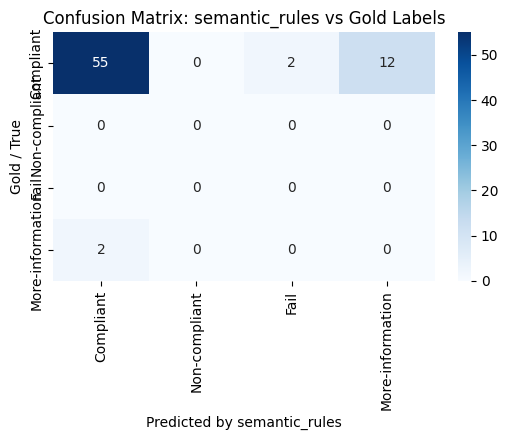

In [ ]:
# ================================================================
#  Evaluate semantic_rules.question_rules against the gold labels
# ================================================================
import pandas as pd, json, os
import semantic_rules as sr                 # ← your rule module
from sklearn.metrics import (classification_report,
                             confusion_matrix, accuracy_score)
import matplotlib.pyplot as plt
import seaborn as sns

RAW_CSV       = "/content/drive/MyDrive/project/inference/stage1_raw_full_redacted.csv"
PRED_OUT_CSV  = "/content/drive/MyDrive/project/CB/semantic_rule_predictions.csv"
METRICS_JSON  = "/content/drive/MyDrive/project/CB/semantic_rule_metrics.json"

# ── 1. Load data ────────────────────────────────────────────────
df = pd.read_csv(RAW_CSV, dtype=str).fillna("")

# ── 2. Pick only QIDs that have a semantic rule ────────────────
RULE_IDS = set(sr.question_rules.keys())
mask = df["question_id"].isin(RULE_IDS)

# ── 3. Run each rule ────────────────────────────────────────────
def classify_with_semantic_rule(row):
    qid, ans = row["question_id"], row["answer_text"]
    frame = sr.extract_semantic_frame(qid, ans)
    label, reason = sr.get_compliance_label_and_reason(frame, ans)
    return label, reason

results = df.loc[mask].apply(classify_with_semantic_rule, axis=1)
df.loc[mask, "pred_sem_rule"] = [r[0] for r in results]
df.loc[mask, "sem_rule_reason"] = [r[1] for r in results]

# save every row the semantic engine touched
(df.loc[mask, ["file", "question_id", "pred_sem_rule", "sem_rule_reason"]]
   .to_csv(PRED_OUT_CSV, index=False))
print(f"✅  Per‑row semantic‑rule predictions written →  {PRED_OUT_CSV}")

# ── 4. Evaluate vs gold labels ─────────────────────────────────
compare_df = df[mask & df["gold_label"].notna() & (df["gold_label"].str.strip() != "")]

all_labels = ["Compliant", "Non-compliant", "Fail", "More-information"]

print("\n=== semantic_rules vs Gold Label CLASSIFICATION REPORT ===")
report_txt = classification_report(compare_df["gold_label"],
                                   compare_df["pred_sem_rule"],
                                   labels=all_labels,
                                   zero_division=0,
                                   digits=3)
print(report_txt)

acc = accuracy_score(compare_df["gold_label"], compare_df["pred_sem_rule"])
print(f"Overall Accuracy: {acc:.3f}")

# capture metrics dictionary and write to disk
metrics = classification_report(compare_df["gold_label"],
                                compare_df["pred_sem_rule"],
                                labels=all_labels,
                                zero_division=0,
                                digits=3,
                                output_dict=True)
metrics["overall_accuracy"] = acc
os.makedirs(os.path.dirname(METRICS_JSON), exist_ok=True)
with open(METRICS_JSON, "w") as f:
    json.dump(metrics, f, indent=2)
print(f"✅  Metrics JSON written →  {METRICS_JSON}")

# ── 5. Confusion matrix plot ───────────────────────────────────
cm = confusion_matrix(compare_df["gold_label"],
                      compare_df["pred_sem_rule"],
                      labels=all_labels)

plt.figure(figsize=(5.5,4.5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=all_labels, yticklabels=all_labels)
plt.xlabel("Predicted by semantic_rules"); plt.ylabel("Gold / True")
plt.title("Confusion Matrix: semantic_rules vs Gold Labels")
plt.tight_layout(); plt.show()


In [ ]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score

# Use the compare_df from your pipeline above.
# compare_df must have: question_id, gold_label, compliancebyrules

per_question_metrics = []

for qid, group in compare_df.groupby("question_id"):
    # Sometimes a group may only have one class, handle gracefully
    gold = group["gold_label"]
    pred = group["compliancebyrules"]
    labels_present = sorted(set(gold) | set(pred))

    # Classification report as dict
    report = classification_report(
        gold, pred, labels=labels_present,
        output_dict=True, zero_division=0, digits=3
    )
    # If only two classes, macro avg might not be present
    macro_f1 = report.get("macro avg", {}).get("f1-score", float("nan"))
    weighted_f1 = report.get("weighted avg", {}).get("f1-score", float("nan"))
    acc = accuracy_score(gold, pred)

    per_question_metrics.append({
        "question_id": qid,
        "accuracy": acc,
        "macro_f1": macro_f1,
        "weighted_f1": weighted_f1,
        "support": len(group)
    })

metrics_df = pd.DataFrame(per_question_metrics).sort_values("question_id")
pd.set_option('display.max_rows', 100)
display(metrics_df)


,question_id,accuracy,macro_f1,weighted_f1,support
0,A2.10,1.0,1.000000,1.000000,5
1,A2.2,0.0,0.000000,0.000000,1
2,A2.3,1.0,1.000000,1.000000,5
3,A2.4,1.0,1.000000,1.000000,5
4,A2.4.1,0.8,0.444444,0.888889,5
5,A2.5,0.4,0.190476,0.457143,5
6,A2.6,0.6,0.375000,0.750000,5
7,A2.7,1.0,1.000000,1.000000,5
8,A2.7.1,1.0,1.000000,1.000000,5
9,A2.8,0.8,0.444444,0.888889,5


In [ ]:
summary = (
    compare_df.assign(correct=(compare_df["gold_label"] == compare_df["compliancebyrules"]))
    .groupby("question_id")["correct"]
    .agg(
        correct_count="sum",
        total_count="count"
    )
    .reset_index()
)
summary["incorrect_count"] = summary["total_count"] - summary["correct_count"]
summary["incorrect_pct"] = (summary["incorrect_count"] / summary["total_count"] * 100).round(1)

# Reorder and sort by incorrect_pct descending
summary = summary[["question_id", "correct_count", "incorrect_count", "total_count", "incorrect_pct"]]
summary = summary.sort_values("incorrect_pct", ascending=False).reset_index(drop=True)

from IPython.display import display
display(summary)


,question_id,correct_count,incorrect_count,total_count,incorrect_pct
0,A2.2,0,1,1,100.0
1,A6.2.4,1,4,5,80.0
2,A2.5,2,3,5,60.0
3,A6.2.3,3,2,5,40.0
4,A2.9,4,1,5,20.0
5,A2.6,4,1,5,20.0
6,A2.4.1,4,1,5,20.0
7,A6.2.2,4,1,5,20.0
8,A6.2.1,4,1,5,20.0
9,A2.8,4,1,5,20.0


In [ ]:
# List of high-error question IDs you want to inspect
ids_to_check = ["A2.2", "A6.2.4", "A2.5", "A6.2.3", "A2.6"]


# Filter: only incorrect rows for these IDs
incorrect_rows = compare_df[
    (compare_df["question_id"].isin(ids_to_check)) &
    (compare_df["gold_label"] != compare_df["compliancebyrules"])
]

# Choose columns to display for audit
cols = [
    "file","question_id", "question_text", "answer_text", "gold_label",
    "compliancebyrules", "rules_reason"
]

from IPython.display import display
display(incorrect_rows[cols].head(30))


,file,question_id,question_text,answer_text,gold_label,compliancebyrules,rules_reason
16,cogniquelimited (2).pdf,A2.5,"please list the quantity of servers, virtual s...","we do not have any in office servers, we are g...",Compliant,More-information,Needs more information: No server count could ...
51,cogniquelimited (2).pdf,A6.2.4,please list all office applications that are u...,"google workplace, ms 365 (for one staff member...",Compliant,More-information,Needs more information: Software listed but ve...
98,evidationhealthinc-2025-07-24-11-11-06.pdf,A2.5,"please list the quantity of servers, virtual s...",,Compliant,Fail,Answer is blank.
128,evidationhealthinc-2025-07-24-11-11-06.pdf,A6.2.3,please list your email applications installed ...,gmail (cloud),Compliant,More-information,Needs more information: Email app(s) listed bu...
129,evidationhealthinc-2025-07-24-11-11-06.pdf,A6.2.4,please list all office applications that are u...,"box, docusign, enzyme qms, google workspace, l...",Compliant,More-information,Needs more information: Software listed but ve...
206,remajcarerecruitmentagencylimited-2025-07-24-1...,A6.2.3,please list your email applications installed ...,microsoft 365 outlook,Compliant,More-information,Needs more information: Email app(s) listed bu...
207,remajcarerecruitmentagencylimited-2025-07-24-1...,A6.2.4,please list all office applications that are u...,office 365,Compliant,More-information,Needs more information: Software listed but ve...
252,starraguklimited.pdf,A2.2,if you are not certifying your whole organisat...,network only excluding all other networks,Compliant,More-information,Needs more information: No valid network bound...
256,starraguklimited.pdf,A2.5,"please list the quantity of servers, virtual s...",vmware esxi 7.0.3 microsoft windows server 201...,More-information,Compliant,Compliant: 150 server(s) listed with OS or hyp...
290,starraguklimited.pdf,A6.2.4,please list all office applications that are u...,"ms365 (excel,word,teams, onenote, powerpoint a...",Compliant,More-information,Needs more information: No office or document ...


### Define Rubrics before LLM classifications

In [ ]:
rubrics_py = """
RUBRICS = {}



RUBRICS["A4.1.1"] = {
    "criteria": [
        "Answer shows at least ONE acceptable boundary measure for remote / home workers:"
        "  • software firewall on the endpoint,"
        "  • corporate VPN that tunnels to a central / cloud firewall,"
        "  • cloud-managed or MDM-enforced firewall rules.",
        "If none of the above is mentioned the configuration is considered non-compliant."
    ],

    "ref_section": "CE guide § A4.1.1 – Remote worker boundary controls"
}


RUBRICS["A4.2.1"] = {
    "criteria": [
        "Answer must confirm that firewall passwords ARE changed and describe HOW.",
        "Indicators of a good process: interface/portal named, strong-password policy,"
        " use of password manager, or formally delegated to a named third-party MSP.",
        "If no change method is described the response is Non-Compliant."
    ],

    "ref_section": "CE guide § A4.2.1 – Default password change process"
}

RUBRICS["A4.10"] = {
    "criteria": [
        "Must state EITHER multi-factor authentication OR restriction to trusted / fixed IPs.",
        "If neither is present the access control is Non-Compliant."
    ],

    "ref_section": "CE guide § A4.10 – Secure admin interface requirements"
}

RUBRICS["A4.6"] = {
    "criteria": [
        "Answer should show a REPEATABLE PROCESS for closing or removing services / ports.",
        "Positive signals: explicit disable/remove verbs, change-ticket system (Jira, CAB, "
        "ServiceNow), named responsible role, regular review schedule, reference to policy.",
        "If no process detail is given the answer is Non-Compliant."
    ],

    "ref_section": "CE guide § A4.6 – Requirement to disable unneeded services"
}

RUBRICS["A5.1"] = {
    "criteria": [
        "Answer must show the organisation *understands software minimisation* AND/OR"
        " describes a *process or tool* used to keep endpoint builds clean.",
        "Positive signals ⮕ any of: ‘standard build’, ‘minimal install’, Intune/Jamf/SCCM/RMM "
        "automation, routine software reviews, cloud-app toggling etc.",
        "If no understanding *and* no process is evident ➜ Non-Compliant."
    ],

    "ref_section": "CE guide § A5.1 – Secure configuration / software minimisation"
}


RUBRICS["A5.6"] = {
    "criteria": [
        "Answer should outline a CLEAR password-reset process triggered by compromise "
        "or vendor alert.  Indicators:",
        "  • help-desk / ticket workflow (ServiceNow, Jira, CAB…),",
        "  • admin-initiated or user self-service reset,",
        "  • malware / AV scan as part of response,",
        "  • MFA / lockout controls, strong password policy, or third-party MSP handling.",
        "If no reset mechanism is described ➜ Non-Compliant."
    ],

    "ref_section": "CE guide § A5.6 – Response to compromised credentials"
}

RUBRICS["A5.10"] = {
    "criteria": [
        "Answer must list at least one unlocking method **and** satisfy CE strength rules:",
        "  • biometric (fingerprint / Face ID / Windows Hello / Touch ID) OR",
        "  • PIN / password ≥ 6 characters, OR",
        "  • MFA + ≥ 8-char password, OR",
        "  • stand-alone ≥ 12-char password.",
        "If no method is stated ➜ Non-Compliant."
    ],

    "ref_section": "CE guide § A5.10 – Device unlocking requirements"
}

RUBRICS["A6.4.2"] = {
    "criteria": [
        "Answer must show EITHER:",
        "  • Auto-updates are enabled for **all** OS + router/firewall firmware,  OR",
        "  • A manual / scripted process that *explicitly* installs high-risk or "
        "critical patches **within 14 days** (SLA stated).",
        "Tools (Intune, Datto RMM, WSUS, etc.) are a positive signal but not mandatory.",
        "If neither auto nor SLA-bound manual process is clear ➜ Non-Compliant."
    ],


    "ref_section": "CE guide § A6.4 – Security update mgmt (OS & firmware)"
}


RUBRICS["A6.5.2"] = {
    "criteria": [
        "Same logic as A6.4.2 but for *application* software (incl. plugins).",
        "Must state auto-update OR manual process + 14-day SLA.",
        "Mention of patch tools (Intune, Jamf, RMM…) is a plus.",
        "If nothing shows a ≤14-day process ➜ Non-Compliant."
    ],

    "ref_section": "CE guide § A6.5 – Security update mgmt (applications)"
}


RUBRICS["A6.7"] = {
    "criteria": [
        "Answer should state ONE of:",
        "  • No unsupported software in scope **(explicit)**, OR",
        "  • Unsupported software exists *but* is segregated (VLAN, air-gap, "
        "firewall rule, no Internet).",
        "If unsupported software admitted with *no* segregation description "
        "➜ Non-Compliant.",

    ],

    "ref_section": "CE guide § A6.7 – Unsupported / legacy software handling"
}

RUBRICS["A7.1"] = {
    "criteria": [
        "Compliant answer MUST include *all three* elements:",
        "  1️ Named role/authority that approves (e.g. IT Manager, HR, Director).",
        "  2️ Mention of an approval *process / workflow* (ticket, form, induction, CAB…).",
        "  3️ Implicit or explicit confirmation that approval happens **before** account creation.",
        "Tools (ServiceDesk, JIRA, Intune, JumpCloud, etc.) = bonus clarity.",
        "If none → Non-Compliant."
    ],


    "ref_section": "CE guide § A7 – User Access Control (account approval)"
}


RUBRICS["A7.10"] = {
    "criteria": [
        "Answer must evidence at least ONE of:",
        "  • Multi-Factor Authentication (MFA / 2FA).",
        "  • Account lockout ≤ 10 failed attempts (or ‘smart-lockout’).",
        "  • Rate-throttling ≤ 10 guesses in 5 minutes.",
        "If none of these controls described → Non-Compliant.",

    ],


    "ref_section": "CE guide § A7.10 – Brute-force mitigation for external services"
}


RUBRICS["A7.11"] = {
    "criteria": [
        "Three CE-allowed options (any one is OK):",
        "  A️⃣ MFA + ≥ 8-char password (no max length).",
        "  B️⃣ ≥ 8-char password **plus** automatic block of common passwords (deny-list).",
        "  C️⃣ ≥ 12-char password (no max length).",
        "Max-length restrictions invalidate compliance.",
        "If none of A/B/C fully met → Non-Compliant."
    ],


    "ref_section": "CE guide § A7.11 – Password-based authentication controls"
}

RUBRICS["A7.12"] = {
    "criteria": [
        "Compliant if answer shows **any** of:",
        "  • Training / awareness on avoiding common or reused passwords.",
        "  • Promotion of NCSC ‘Three Random Words’.",
        "  • Advice or provision of password manager / secure storage.",
        "  • Explicit statement that regular forced expiry **not** used, and no mandatory complexity.",
        "Nothing substantive → Non-Compliant."
    ],


    "ref_section": "CE guide § A7.12 – User education on passwords"
}

RUBRICS["A7.3"] = {
    "criteria": [
        "Compliant answer MUST cover *all three* elements:",
        "  1️ Existence of a formal **leaver / off-boarding process**.",
        "  2️ Named parties involved (HR and/or IT).",
        "  3️ Action to **disable / delete / revoke** accounts on, or very close to, the leaving date.",
        "Help-desk ticketing or audit reviews = bonus but not mandatory.",
        "If no process or action described → Non-Compliant."
    ],


    "ref_section": "CE guide § A7 – User Access Control (account removal)"
}

RUBRICS["A7.4"] = {
    "criteria": [
        "Compliant when answer shows BOTH:",
        "  1️ Statement of **least-privilege / role-based access** principle.",
        "  2️ Mechanism for granting / adjusting permissions (e.g. AD groups, RBAC, ticket, approval, periodic review).",
        "Role-change handling & periodic access review give extra confidence.",
        "None → Non-Compliant."
    ],


    "ref_section": "CE guide § A7 – User Access Control (least privilege)"
}

RUBRICS["A7.5"] = {
    "criteria": [
        "Compliant answer needs **both**:",
        "  1️ *Formal* documented process or workflow (policy, ticket, CAB, written request…).",
        "  2️ Approval by a senior role (director, manager, CISO, etc.).",
        "Mention of *separate admin accounts* strengthens compliance.",
        "Neither → Non-Compliant."
    ],


    "ref_section": "CE guide § A7 – Admin-account approval"
}

RUBRICS["A7.6"] = {
    "criteria": [
        "Compliant when answer demonstrates BOTH:",
        "  1️ **Separation** of admin and standard accounts (or Just-in-Time / PIM).",
        "  2️ Controls to prevent everyday browsing/email on admin creds:",
        "     • Technical (UAC, LAPS, Intune policies, Entra PIM, Jamf, ThreatLocker…) or",
        "     • Procedural (policy forbids daily use, MSP restrictions).",
        "Neither → Non-Compliant."
    ],


    "ref_section": "CE guide § A7 – Admin-account misuse prevention"
}

RUBRICS["A7.7"] = {
    "criteria": [
        "Compliant answer must show BOTH:",
        "  1️ Clear statement that administrator accounts are **NOT used for web/email/normal work**",
        "     – e.g. ‘admin accounts only for installs’, ‘no browsing from admin’",
        "  2️ Enforcement mechanism:",
        "     • Policy / AUP, OR",
        "     • Staff training / induction, OR",
        "     • Technical control (ThreatLocker, PIM, Jamf, LAPS, etc.).",
        "If no separation at all → Non-Compliant."
    ],


    "ref_section": "CE guide § A7 – Admin-account everyday-use prevention"
}

"""

with open("rubrics.py", "w", encoding="utf-8") as f:
    f.write(rubrics_py)

print(" rubrics.py saved.")

 rubrics.py saved.


In [ ]:
from rubrics import RUBRICS as rubrics
!head -30 rubrics.py


RUBRICS = {}



RUBRICS["A4.1.1"] = {
    "criteria": [
        "Answer shows at least ONE acceptable boundary measure for remote / home workers:"
        "  • software firewall on the endpoint,"
        "  • corporate VPN that tunnels to a central / cloud firewall,"
        "  • cloud-managed or MDM-enforced firewall rules.",
        "If none of the above is mentioned the configuration is considered non-compliant."
    ],

    "ref_section": "CE guide § A4.1.1 – Remote worker boundary controls"
}


RUBRICS["A4.2.1"] = {
    "criteria": [
        "Answer must confirm that firewall passwords ARE changed and describe HOW.",
        "Indicators of a good process: interface/portal named, strong-password policy,"
        " use of password manager, or formally delegated to a named third-party MSP.",
        "If no change method is described the response is Non-Compliant."
    ],

    "ref_section": "CE guide § A4.2.1 – Default password change process"
}

RUBRICS["A4.10"] = {


### **INFERENCE FOR CLASSIFICATION BY FINE TUNED LLAMA-8B**

In [ ]:
# ================================================================
# 0. Imports
# ================================================================
import torch, pandas as pd, re
from transformers import AutoModelForCausalLM, AutoTokenizer
from peft import PeftModel
from tqdm.auto import tqdm
from rubrics import RUBRICS as rubrics
from sklearn.metrics import classification_report, accuracy_score

# ================================================================
# 1.  Model + Tokenizer
# ================================================================
MODEL_ID     = "meta-llama/Llama-3.1-8B-Instruct"
ADAPTER_DIR  = "/content/drive/MyDrive/project/CB/llama3_lora_adapter_FULL"

tokenizer = AutoTokenizer.from_pretrained(MODEL_ID, use_fast=True)
tokenizer.pad_token = tokenizer.eos_token
base_model = AutoModelForCausalLM.from_pretrained(
    MODEL_ID,
    torch_dtype=torch.bfloat16 if torch.cuda.is_available() else torch.float16,
    device_map="auto",
    trust_remote_code=True,
    low_cpu_mem_usage=True,
)
model = PeftModel.from_pretrained(base_model, ADAPTER_DIR)
model.eval()

# ================================================================
# 2.  Prompt template  (unchanged)
# ================================================================
SYSTEM_MSG = (
    "You are a Cyber Essentials assessor.\n"
    "For each question, you will be provided:\n"
    "1. The question text.\n"
    "2. The applicant's answer.\n"
    "3. The marking rubric (assessment criteria) for this question.\n\n"
    "Your task:\n"
    "- Read the rubric criteria carefully.\n"
    "- Judge ONLY according to the rubric, not personal opinion.\n"
    "- Output strictly TWO fields on separate lines:\n"
    "   LABEL: (Compliant or Non-Compliant)\n"
    "   REASON: (Short, precise justification using the rubric wording; say *which* part of the criteria was met/missed)\n"
    "Your reply **MUST** be in the exact format:\n"
    "LABEL: <Compliant or Non-Compliant>\n"
    "REASON: <Your short, criteria‑based reason>"
)

def build_prompt(row: pd.Series) -> str:
    criteria = "\n".join(rubrics.get(row["question_id"], {}).get("criteria", [])) or "No rubric found."
    return (
        f"<|system|>\n{SYSTEM_MSG}</s>\n"
        f"<|user|>\n"
        f"Question:\n{row['question_text']}\n\n"
        f"Applicant answer:\n{row['answer_text']}\n\n"
        f"Marking rubric for this question:\n{criteria}\n</s>\n"
        f"<|assistant|>"
    )

# ================================================================
# 3.  Load CSV  ➜  keep only needed columns & FREE_TEXT_IDS
# ================================================================
CSV_PATH = "/content/drive/MyDrive/project/inference/stage1_raw_full_redacted.csv"
KEEP_COLS = ["file", "question_id", "question_text", "answer_text", "gold_label"]
FREE_TEXT_IDS = [
    "A4.1.1", "A4.10", "A4.2.1", "A4.6", "A5.1", "A5.10", "A5.6",
    "A6.4.2", "A6.5.2", "A6.7", "A7.1", "A7.10", "A7.11", "A7.12",
    "A7.3", "A7.4", "A7.5", "A7.6", "A7.7"
]

df_full = pd.read_csv(CSV_PATH, dtype=str, usecols=KEEP_COLS).fillna("")
df_full = df_full[df_full["question_id"].isin(FREE_TEXT_IDS)].reset_index(drop=True)

# --- detach gold labels so they’re NEVER sent to the model -----
gold_series = df_full["gold_label"].copy()
df          = df_full.drop(columns=["gold_label"])

# ================================================================
# 4.  Robust LLM output extraction
# ================================================================
def extract_label_reason(text):
    """
    Extracts the LABEL and REASON fields from the model output,
    robust even if the prompt is included in the output.
    """
    label_matches = list(re.finditer(
        r"\bLABEL\s*:\s*(Compliant|Non-Compliant|More[- ]?information|Non-compliant|<Compliant or Non-Compliant>)",
        text, re.IGNORECASE))
    reason_matches = list(re.finditer(r"\bREASON\s*:\s*(.*)", text, re.IGNORECASE))

    label = ""
    reason = ""
    if label_matches:
        label = label_matches[-1].group(1)
        label = label.replace("<Compliant or Non-Compliant>", "").strip()
        # Canonicalize
        if label.lower().startswith("compliant"):
            label = "Compliant"
        elif label.lower().startswith("non"):
            label = "Non-Compliant"
        elif label.lower().startswith("more"):
            label = "More-information"
        else:
            label = "UNKNOWN"
    else:
        label = "UNKNOWN"

    if reason_matches:
        reason = reason_matches[-1].group(1).strip()
        reason = reason.split("LABEL:", 1)[0].strip()
        reason = reason.split("</s>")[0].strip()
    else:
        reason = ""

    return label, reason

# ================================================================
# 5.  LLM Inference loop (now with robust extraction)
# ================================================================
def infer_one(prompt: str):
    inputs = tokenizer(prompt, return_tensors="pt",
                       padding=True, truncation=True, max_length=1024).to(model.device)
    with torch.no_grad():
        out = model.generate(**inputs,
                             max_new_tokens=40,
                             do_sample=False,
                             pad_token_id=tokenizer.pad_token_id)
    resp = tokenizer.decode(out[0], skip_special_tokens=True)
    label, reason = extract_label_reason(resp)
    return label, reason, resp

records = []
for _, row in tqdm(df.iterrows(), total=len(df), desc="Inference"):
    prompt = build_prompt(row)
    lab, rea, raw = infer_one(prompt)
    records.append({**row.to_dict(),
                    "predicted_label":  lab,
                    "predicted_reason": rea,
                    "raw_model_output": raw})

pred_df = pd.DataFrame(records)

# ================================================================
# 6.  Save WITHOUT gold (safe file)
# ================================================================
out_safe = "/content/drive/MyDrive/project/CB/free_text_predictions_no_gold.csv"
pred_df.to_csv(out_safe, index=False)
print("  Saved no‑gold predictions ➜", out_safe)

# ================================================================
# 7.  Attach gold labels & evaluate
# ================================================================
pred_df["gold_label"] = gold_series.values

report = classification_report(pred_df["gold_label"],
                               pred_df["predicted_label"],
                               zero_division=0)
acc    = accuracy_score(pred_df["gold_label"], pred_df["predicted_label"])
print("\n=== Evaluation on FREE_TEXT_IDS ===")
print(report)
print("Accuracy:", acc)

out_eval = "/content/drive/MyDrive/project/CB/free_text_predictions_with_gold.csv"
pred_df.to_csv(out_eval, index=False)
print("  Saved with‑gold predictions ➜", out_eval)


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Inference:   0%|          | 0/87 [00:00<?, ?it/s]

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.

  Saved no‑gold predictions ➜ /content/drive/MyDrive/project/CB/free_text_predictions_no_gold.csv

=== Evaluation on FREE_TEXT_IDS ===
                  precision    recall  f1-score   support

       Compliant       0.86      0.97      0.91        75
More-information       0.00      0.00      0.00         7
   Non-Compliant       0.00      0.00      0.00         0
   Non-compliant       0.00      0.00      0.00         5

        accuracy                           0.84        87
       macro avg       0.21      0.24      0.23        87
    weighted avg       0.74      0.84      0.79        87

Accuracy: 0.8390804597701149
  Saved with‑gold predictions ➜ /content/drive/MyDrive/project/CB/free_text_predictions_with_gold.csv


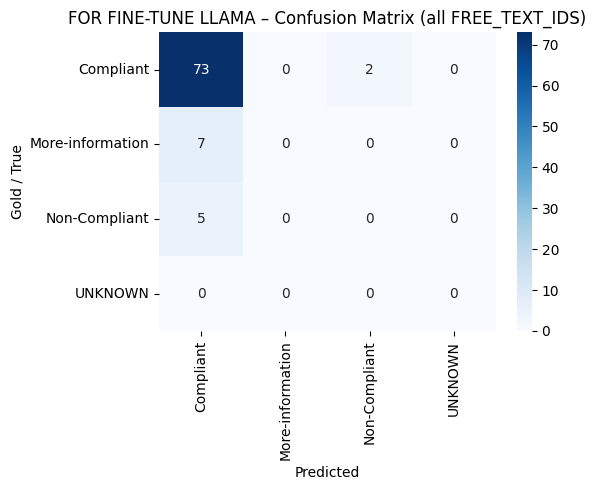


=== Precision / Recall / F1 (normalised labels) FOR FINE-TUNE LLAMA===
                  precision    recall  f1-score   support

       Compliant      0.859     0.973     0.912        75
More-information      0.000     0.000     0.000         7
   Non-Compliant      0.000     0.000     0.000         5

        accuracy                          0.839        87
       macro avg      0.286     0.324     0.304        87
    weighted avg      0.740     0.839     0.787        87

Overall accuracy: 0.8390804597701149


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# ── 0. Load ──────────────────────────────────────────────────────
pred_df = pd.read_csv(
    "/content/drive/MyDrive/project/CB/free_text_predictions_with_gold.csv"
)

# ── 1. Canonicalise labels ──────────────────────────────────────
def canon(label: str) -> str:
    if pd.isna(label):
        return "UNKNOWN"
    clean = label.lower().replace(" ", "").replace("-", "")
    if clean.startswith("comp"):
        return "Compliant"
    if clean.startswith("noncomp"):
        return "Non-Compliant"
    if clean.startswith("more"):
        return "More-information"
    return "UNKNOWN"

pred_df["gold_norm"] = pred_df["gold_label"].apply(canon)
pred_df["pred_norm"] = pred_df["predicted_label"].apply(canon)

# ── 2. Confusion‑matrix ─────────────────────────────────────────
all_labels = ["Compliant", "More-information", "Non-Compliant", "UNKNOWN"]

cm = confusion_matrix(
    pred_df["gold_norm"],
    pred_df["pred_norm"],
    labels=all_labels,
)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=all_labels,
    yticklabels=all_labels,
)
plt.xlabel("Predicted")
plt.ylabel("Gold / True")
plt.title("FOR FINE-TUNE LLAMA – Confusion Matrix (all FREE_TEXT_IDS)")
plt.tight_layout()
plt.show()

# ── 3. Detailed metrics table ───────────────────────────────────
print("\n=== Precision / Recall / F1 (normalised labels) FOR FINE-TUNE LLAMA===")
print(
    classification_report(
        pred_df["gold_norm"],
        pred_df["pred_norm"],
        labels=all_labels[:-1],   # exclude UNKNOWN from P/R/F1
        digits=3,
        zero_division=0,
    )
)
print("Overall accuracy:",
      accuracy_score(pred_df["gold_norm"], pred_df["pred_norm"]))


In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

gold = pred_df["gold_label"]
pred = pred_df["predicted_label"]

overall_accuracy                 = accuracy_score(gold, pred)
macro_P, macro_R, macro_F1, _    = precision_recall_fscore_support(
    gold, pred, average="macro", zero_division=0
)
weighted_P, weighted_R, weighted_F1, _ = precision_recall_fscore_support(
    gold, pred, average="weighted", zero_division=0
)

print(f"Overall accuracy : {overall_accuracy:.3f}")
print(f"Macro  precision : {macro_P:.3f}")
print(f"Macro  recall    : {macro_R:.3f}")
print(f"Macro  F1‑score  : {macro_F1:.3f}")
print("—"*35)
print(f"Weighted precision : {weighted_P:.3f}")
print(f"Weighted recall    : {weighted_R:.3f}")
print(f"Weighted F1‑score  : {weighted_F1:.3f}")


Overall accuracy : 0.839
Macro  precision : 0.215
Macro  recall    : 0.243
Macro  F1‑score  : 0.228
———————————————————————————————————
Weighted precision : 0.740
Weighted recall    : 0.839
Weighted F1‑score  : 0.787


In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

per_qid_rows = []
for qid, grp in pred_df.groupby("question_id"):
    gold = grp["gold_label"]
    pred = grp["predicted_label"]
    acc  = accuracy_score(gold, pred)
    # we only want the “Compliant” vs “Non‑Compliant” numbers
    p,r,f,_ = precision_recall_fscore_support(
        gold, pred, labels=["Compliant","Non-Compliant"], zero_division=0, average="macro"
    )
    per_qid_rows.append({
        "question_id": qid,
        "# samples"  : len(grp),
        "accuracy"   : round(acc, 3),
        "precision"  : round(p,   3),
        "recall"     : round(r,   3),
        "f1"         : round(f,   3)
    })

qid_metrics = pd.DataFrame(per_qid_rows).sort_values("question_id")
display(qid_metrics)

# Optional: save to CSV
qid_metrics.to_csv("/content/drive/MyDrive/project/CB/llama_per_qid_metrics.csv", index=False)
print("Per‑question metrics saved ➜  .../llama_per_qid_metrics.csv")


,question_id,# samples,accuracy,precision,recall,f1
0,A4.1.1,5,0.800,0.500,0.40,0.444
1,A4.10,2,0.500,0.500,0.25,0.333
2,A4.2.1,5,0.600,0.300,0.50,0.375
3,A4.6,3,0.667,0.333,0.50,0.400
4,A5.1,5,1.000,0.500,0.50,0.500
5,A5.10,5,0.800,0.400,0.50,0.444
6,A5.6,2,1.000,0.500,0.50,0.500
7,A6.4.2,5,0.800,0.400,0.50,0.444
8,A6.5.2,5,0.800,0.400,0.50,0.444
9,A6.7,5,1.000,0.500,0.50,0.500


Per‑question metrics saved ➜  .../llama_per_qid_metrics.csv


In [ ]:
import pandas as pd

file =  "/content/drive/MyDrive/project/CB/free_text_predictions_with_gold.csv"

df = pd.read_csv(file)

# Filter rows where prediction does NOT match gold label
mismatches = df[df["predicted_label"] != df["gold_label"]]

# Show the first 20 mismatched rows as a table
from IPython.display import display
display(mismatches.head(30))


,file,question_id,question_text,answer_text,predicted_label,predicted_reason,raw_model_output,gold_label
33,evidationhealthinc-2025-07-24-11-11-06.pdf,A7.6,how does your organisation make sure that sepa...,users are assigned privileged roles for a time...,Compliant,Temporary privileged roles with time-limited e...,<|system|>\nYou are a Cyber Essentials assesso...,Non-compliant
34,evidationhealthinc-2025-07-24-11-11-06.pdf,A7.7,usage how does your organisation prevent admin...,employees do not have admin rights on their de...,Compliant,Meets one of the required controls.,<|system|>\nYou are a Cyber Essentials assesso...,Non-compliant
37,remajcarerecruitmentagencylimited-2025-07-24-1...,A4.6,have you reviewed your firewall rules in the l...,"yes, the process is to remove or disable unnec...",Compliant,Describes a repeatable process to review and r...,<|system|>\nYou are a Cyber Essentials assesso...,Non-compliant
39,remajcarerecruitmentagencylimited-2025-07-24-1...,A5.10,which method do you use to unlock the devices?...,a complex password that is a combination of ch...,Compliant,Acceptable unlocking method described with req...,<|system|>\nYou are a Cyber Essentials assesso...,Non-compliant
53,starraguklimited.pdf,A4.10,"if you answered yes in question a4.9, is there...",ip and also mfa,Non-Compliant,Does not mention documentation of the business...,<|system|>\nYou are a Cyber Essentials assesso...,Compliant
54,starraguklimited.pdf,A4.2.1,process please describe the process for changi...,"in the initial setup/configuration, the passwo...",Compliant,Clearly describes the admin process for changi...,<|system|>\nYou are a Cyber Essentials assesso...,More-information
59,starraguklimited.pdf,A6.4.2,"system where auto updates are not being used, ...",ce requirement: all software on in- scope devi...,Compliant,Describes a clear process (auto or manual) to ...,<|system|>\nYou are a Cyber Essentials assesso...,More-information
60,starraguklimited.pdf,A6.5.2,"where auto updates are not being used, how do ...",not all applications can be updated automatica...,Compliant,Describes a clear process (auto or manual) to ...,<|system|>\nYou are a Cyber Essentials assesso...,More-information
65,starraguklimited.pdf,A7.12,please explain how you encourage people to use...,security awareness campaign and forced passwor...,Compliant,Describes encouragement method for unique and ...,<|system|>\nYou are a Cyber Essentials assesso...,More-information
68,starraguklimited.pdf,A7.5,do you have a formal process for giving someon...,we use admin by request and no longer will hav...,Compliant,"Describes a formal ticket-based approval, temp...",<|system|>\nYou are a Cyber Essentials assesso...,More-information


### **INFERENCE FOR CLASSIFICATION BY FINE TUNED MISTRAL-7B**

In [ ]:
# =================================================================
# 0. Imports
# =================================================================
import re, torch, pandas as pd
from pathlib import Path
from tqdm.auto import tqdm
from transformers import AutoModelForCausalLM, AutoTokenizer
from peft import PeftModel
from sklearn.metrics import classification_report, accuracy_score
from rubrics import RUBRICS as rubrics                     # <-- your rubric dict

# =================================================================
# 1.   Mistral‑7B‑Instruct  + LoRA adapter
# =================================================================
BASE_MODEL_ID = "mistralai/Mistral-7B-Instruct-v0.2"
ADAPTER_DIR   = Path("/content/drive/MyDrive/project/CB/mistral7b_lora_final_full")

tokenizer = AutoTokenizer.from_pretrained(BASE_MODEL_ID, use_fast=True)
tokenizer.pad_token = tokenizer.eos_token

base_model = AutoModelForCausalLM.from_pretrained(
    BASE_MODEL_ID,
    torch_dtype = torch.bfloat16 if torch.cuda.is_available() else torch.float16,
    device_map  = "auto",
    trust_remote_code=True,
    low_cpu_mem_usage=True,
)
model = PeftModel.from_pretrained(base_model, ADAPTER_DIR)
model.eval()

# =================================================================
# 2.  Prompt template  (unchanged)
# =================================================================
SYSTEM_MSG = (
    "You are a Cyber Essentials assessor.\n"
    "Classify the applicant answer as Compliant or Non-Compliant using the rubric.\n"
    "Reply with ONLY TWO lines:\n"
    "LABEL: <Compliant or Non-Compliant>\n"
    "REASON: <Short reason, quoting the rubric criteria met or missed.>"
)

def build_prompt(row: pd.Series) -> str:
    criteria = "\n".join(rubrics.get(row["question_id"], {}).get("criteria", [])) or "No rubric found."
    user_msg = (
        f"Question:\n{row['question_text']}\n\n"
        f"Applicant answer:\n{row['answer_text']}\n\n"
        f"Rubric:\n{criteria}"
    )
    return (
        "<s>[INST] <<SYS>>\n"
        f"{SYSTEM_MSG}\n"
        "<</SYS>>\n"
        f"{user_msg}\n"
        "[/INST]"
    )

# =================================================================
# 3.  Load CSV  ➜  keep only FREE_TEXT_IDS, detach gold labels
# =================================================================
CSV_PATH = "/content/drive/MyDrive/project/inference/stage1_raw_full_redacted.csv"
KEEP_COLS = ["file", "question_id", "question_text", "answer_text", "gold_label"]
FREE_TEXT_IDS = [
    "A4.1.1", "A4.10", "A4.2.1", "A4.6", "A5.1", "A5.10", "A5.6",
    "A6.4.2", "A6.5.2", "A6.7", "A7.1", "A7.10", "A7.11", "A7.12",
    "A7.3", "A7.4", "A7.5", "A7.6", "A7.7"
]

df_full = pd.read_csv(CSV_PATH, dtype=str, usecols=KEEP_COLS).fillna("")
df_full = df_full[df_full["question_id"].isin(FREE_TEXT_IDS)].reset_index(drop=True)

gold_series = df_full["gold_label"].copy()      # keep for later eval
df          = df_full.drop(columns=["gold_label"])

# =================================================================
# 4.  Regex helpers to parse the model output
# =================================================================
label_re  = re.compile(r"(?i)label\s*:\s*(compliant|non[\s-]?compliant)")
reason_re = re.compile(r"reason\s*:\s*(.+)", re.IGNORECASE | re.DOTALL)

def extract_label(txt: str) -> str:
    m = label_re.search(txt)
    if not m:
        return "UNKNOWN"
    raw = m.group(1).lower().replace(" ", "").replace("-", "")
    return "Compliant" if raw.startswith("compliant") else "Non-Compliant"

def extract_reason(txt: str) -> str:
    m = reason_re.search(txt)
    if not m:
        return ""
    reason = m.group(1).split("LABEL:", 1)[0].strip()
    return reason

# =================================================================
# 5.  Batched inference
# =================================================================
BATCH_SIZE = 8
prompts    = [build_prompt(r) for _, r in df.iterrows()]

pred_labels, pred_reasons, raw_outputs = [], [], []

for i in tqdm(range(0, len(prompts), BATCH_SIZE), desc="Inference"):
    batch = prompts[i:i+BATCH_SIZE]
    inputs = tokenizer(batch, return_tensors="pt",
                       padding=True, truncation=True, max_length=2048)
    inputs = {k: v.to(model.device) for k, v in inputs.items()}

    with torch.no_grad():
        outs = model.generate(
            **inputs,
            max_new_tokens=64,
            do_sample=False,
            pad_token_id=tokenizer.eos_token_id,
            eos_token_id=tokenizer.eos_token_id,
        )

    decoded = tokenizer.batch_decode(outs, skip_special_tokens=True)
    for txt in decoded:
        # keep only text after [/INST]
        answer = txt.split("[/INST]", 1)[-1].strip()
        pred_labels.append(extract_label(answer))
        pred_reasons.append(extract_reason(answer))
        raw_outputs.append(answer)

# attach predictions
pred_df = df.copy()
pred_df["predicted_label"]  = pred_labels
pred_df["predicted_reason"] = pred_reasons
pred_df["raw_model_output"] = raw_outputs

# =================================================================
# 6.  Save NO‑gold file
# =================================================================
out_no_gold = "/content/drive/MyDrive/project/CB/mistral_free_text_predictions_no_gold.csv"
pred_df.to_csv(out_no_gold, index=False)
print("✅  Saved predictions (no‑gold) ➜", out_no_gold)

# =================================================================
# 7.  Evaluation  (attach gold & compute metrics)
# =================================================================
pred_df["gold_label"] = gold_series.values
report = classification_report(pred_df["gold_label"],
                               pred_df["predicted_label"],
                               zero_division=0)
acc = accuracy_score(pred_df["gold_label"], pred_df["predicted_label"])
print("\n=== Mistral evaluation on FREE_TEXT_IDS ===")
print(report)
print("Accuracy:", acc)

out_with_gold = "/content/drive/MyDrive/project/CB/mistral_free_text_predictions_with_gold.csv"
pred_df.to_csv(out_with_gold, index=False)
print("✅  Saved predictions + gold ➜", out_with_gold)


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Inference:   0%|          | 0/11 [00:00<?, ?it/s]

✅  Saved predictions (no‑gold) ➜ /content/drive/MyDrive/project/CB/mistral_free_text_predictions_no_gold.csv

=== Mistral evaluation on FREE_TEXT_IDS ===
                  precision    recall  f1-score   support

       Compliant       0.87      0.97      0.92        75
More-information       0.00      0.00      0.00         7
   Non-Compliant       0.00      0.00      0.00         0
   Non-compliant       0.00      0.00      0.00         5

        accuracy                           0.84        87
       macro avg       0.22      0.24      0.23        87
    weighted avg       0.75      0.84      0.79        87

Accuracy: 0.8390804597701149
✅  Saved predictions + gold ➜ /content/drive/MyDrive/project/CB/mistral_free_text_predictions_with_gold.csv


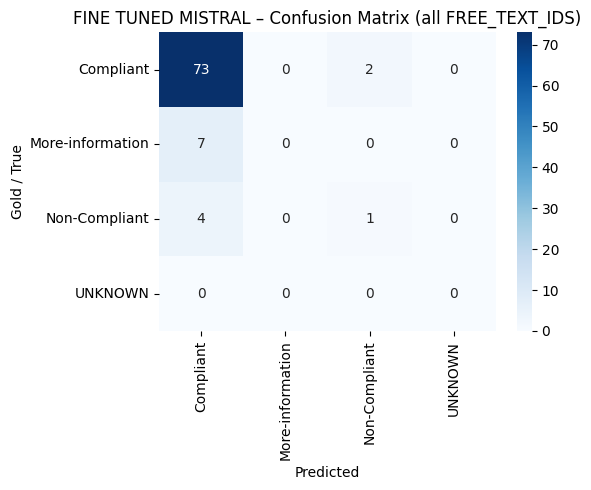


=== Precision / Recall / F1 (normalised labels) FOR FINE TUNED MISTRAL ===
                  precision    recall  f1-score   support

       Compliant      0.869     0.973     0.918        75
More-information      0.000     0.000     0.000         7
   Non-Compliant      0.333     0.200     0.250         5

        accuracy                          0.851        87
       macro avg      0.401     0.391     0.389        87
    weighted avg      0.768     0.851     0.806        87

Overall accuracy: 0.8505747126436781


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# ── 0. Load ──────────────────────────────────────────────────────
pred_df = pd.read_csv(
    "/content/drive/MyDrive/project/CB/mistral_free_text_predictions_with_gold.csv"
)

# ── 1. Canonicalise labels ──────────────────────────────────────
def canon(label: str) -> str:
    if pd.isna(label):
        return "UNKNOWN"
    clean = label.lower().replace(" ", "").replace("-", "")
    if clean.startswith("comp"):
        return "Compliant"
    if clean.startswith("noncomp"):
        return "Non-Compliant"
    if clean.startswith("more"):
        return "More-information"
    return "UNKNOWN"

pred_df["gold_norm"] = pred_df["gold_label"].apply(canon)
pred_df["pred_norm"] = pred_df["predicted_label"].apply(canon)

# ── 2. Confusion‑matrix ─────────────────────────────────────────
all_labels = ["Compliant", "More-information", "Non-Compliant", "UNKNOWN"]

cm = confusion_matrix(
    pred_df["gold_norm"],
    pred_df["pred_norm"],
    labels=all_labels,
)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=all_labels,
    yticklabels=all_labels,
)
plt.xlabel("Predicted")
plt.ylabel("Gold / True")
plt.title("FINE TUNED MISTRAL – Confusion Matrix (all FREE_TEXT_IDS)")
plt.tight_layout()
plt.show()

# ── 3. Detailed metrics table ───────────────────────────────────
print("\n=== Precision / Recall / F1 (normalised labels) FOR FINE TUNED MISTRAL ===")
print(
    classification_report(
        pred_df["gold_norm"],
        pred_df["pred_norm"],
        labels=all_labels[:-1],   # exclude UNKNOWN from P/R/F1
        digits=3,
        zero_division=0,
    )
)
print("Overall accuracy:",
      accuracy_score(pred_df["gold_norm"], pred_df["pred_norm"]))


In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import pandas as pd

# ── 0. Canonicalise labels first ────────────────────────────────
def canon(label: str) -> str:
    if pd.isna(label):
        return "UNKNOWN"
    clean = label.lower().replace(" ", "").replace("-", "")
    if clean.startswith("comp"):
        return "Compliant"
    if clean.startswith("noncomp"):
        return "Non-Compliant"
    if clean.startswith("more"):
        return "More-information"
    return "UNKNOWN"

gold = pred_df["gold_label"].apply(canon)
pred = pred_df["predicted_label"].apply(canon)

# ── 1. Metrics calculation ──────────────────────────────────────
overall_accuracy = accuracy_score(gold, pred)

macro_P, macro_R, macro_F1, _ = precision_recall_fscore_support(
    gold, pred, average="macro", zero_division=0
)

weighted_P, weighted_R, weighted_F1, _ = precision_recall_fscore_support(
    gold, pred, average="weighted", zero_division=0
)

# ── 2. Print results ────────────────────────────────────────────
print(f"Overall accuracy : {overall_accuracy:.3f}")
print(f"Macro  precision : {macro_P:.3f}")
print(f"Macro  recall    : {macro_R:.3f}")
print(f"Macro  F1‑score  : {macro_F1:.3f}")
print("—"*35)
print(f"Weighted precision : {weighted_P:.3f}")
print(f"Weighted recall    : {weighted_R:.3f}")
print(f"Weighted F1‑score  : {weighted_F1:.3f}")


Overall accuracy : 0.851
Macro  precision : 0.401
Macro  recall    : 0.391
Macro  F1‑score  : 0.389
———————————————————————————————————
Weighted precision : 0.768
Weighted recall    : 0.851
Weighted F1‑score  : 0.806


In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import pandas as pd

# ── 0. Canonicalise labels just once ─────────────────────────────
def canon(lbl: str) -> str:
    """Map any label variant to a clean token."""
    if pd.isna(lbl):
        return "UNKNOWN"
    clean = lbl.lower().replace(" ", "").replace("-", "")
    if clean.startswith("comp"):
        return "Compliant"
    if clean.startswith("noncomp"):
        return "Non-Compliant"
    if clean.startswith("more"):
        return "More-information"
    return "UNKNOWN"

pred_df["gold_norm"] = pred_df["gold_label"].apply(canon)
pred_df["pred_norm"] = pred_df["predicted_label"].apply(canon)

# ── 1. Per‑QID metrics (focus on two main classes) ───────────────
per_qid_rows = []
for qid, grp in pred_df.groupby("question_id"):
    gold = grp["gold_norm"]
    pred = grp["pred_norm"]

    acc = accuracy_score(gold, pred)

    # precision/recall for the two decisive classes only
    p, r, f, _ = precision_recall_fscore_support(
        gold,
        pred,
        labels=["Compliant", "Non-Compliant"],
        average="macro",
        zero_division=0,
    )

    per_qid_rows.append(
        {
            "question_id": qid,
            "n_samples": len(grp),
            "accuracy": round(acc, 3),
            "precision": round(p, 3),
            "recall": round(r, 3),
            "f1": round(f, 3),
        }
    )

qid_metrics = pd.DataFrame(per_qid_rows).sort_values("question_id")
display(qid_metrics)

# ── 2.  Optional: save to CSV ────────────────────────────────────
out_path = "/content/drive/MyDrive/project/CB/mistral_per_qid_metrics.csv"
qid_metrics.to_csv(out_path, index=False)
print("Per‑question metrics saved ➜", out_path)


,question_id,n_samples,accuracy,precision,recall,f1
0,A4.1.1,5,0.800,0.500,0.40,0.444
1,A4.10,2,0.500,0.500,0.25,0.333
2,A4.2.1,5,0.800,0.875,1.00,0.929
3,A4.6,3,0.667,0.333,0.50,0.400
4,A5.1,5,1.000,0.500,0.50,0.500
5,A5.10,5,0.800,0.400,0.50,0.444
6,A5.6,2,1.000,0.500,0.50,0.500
7,A6.4.2,5,0.800,0.400,0.50,0.444
8,A6.5.2,5,0.800,0.400,0.50,0.444
9,A6.7,5,1.000,0.500,0.50,0.500


Per‑question metrics saved ➜ /content/drive/MyDrive/project/CB/mistral_per_qid_metrics.csv


In [ ]:
import pandas as pd

file = "/content/drive/MyDrive/project/CB/mistral_free_text_predictions_with_gold.csv"

df = pd.read_csv(file)

# Filter rows where prediction does NOT match gold label
mismatches = df[df["predicted_label"] != df["gold_label"]]

# Show the first 20 mismatched rows as a table
from IPython.display import display
display(mismatches.head(10))


,file,question_id,question_text,answer_text,predicted_label,predicted_reason,raw_model_output,gold_label
33,evidationhealthinc-2025-07-24-11-11-06.pdf,A7.6,how does your organisation make sure that sepa...,users are assigned privileged roles for a time...,Compliant,Temporary elevation via privileged roles with ...,LABEL: Compliant\nREASON: Temporary elevation ...,Non-compliant
34,evidationhealthinc-2025-07-24-11-11-06.pdf,A7.7,usage how does your organisation prevent admin...,employees do not have admin rights on their de...,Compliant,Meets one of the required controls.,LABEL: Compliant\nREASON: Meets one of the req...,Non-compliant
37,remajcarerecruitmentagencylimited-2025-07-24-1...,A4.6,have you reviewed your firewall rules in the l...,"yes, the process is to remove or disable unnec...",Compliant,Clearly describes a ticket-based process to re...,LABEL: Compliant\nREASON: Clearly describes a ...,Non-compliant
39,remajcarerecruitmentagencylimited-2025-07-24-1...,A5.10,which method do you use to unlock the devices?...,a complex password that is a combination of ch...,Compliant,Acceptable unlocking method described with req...,LABEL: Compliant\nREASON: Acceptable unlocking...,Non-compliant
53,starraguklimited.pdf,A4.10,"if you answered yes in question a4.9, is there...",ip and also mfa,Non-Compliant,Does not mention MFA or trusted-IP restriction.,LABEL: Non-Compliant\nREASON: Does not mention...,Compliant
54,starraguklimited.pdf,A4.2.1,process please describe the process for changi...,"in the initial setup/configuration, the passwo...",Compliant,Secure and clear firewall password change meth...,LABEL: Compliant\nREASON: Secure and clear fir...,More-information
59,starraguklimited.pdf,A6.4.2,"system where auto updates are not being used, ...",ce requirement: all software on in- scope devi...,Compliant,Describes a clear process (auto or manual) to ...,LABEL: Compliant\nREASON: Describes a clear pr...,More-information
60,starraguklimited.pdf,A6.5.2,"where auto updates are not being used, how do ...",not all applications can be updated automatica...,Compliant,Describes a clear process (auto or manual) to ...,LABEL: Compliant\nREASON: Describes a clear pr...,More-information
65,starraguklimited.pdf,A7.12,please explain how you encourage people to use...,security awareness campaign and forced passwor...,Compliant,Describes encouragement method for unique and ...,LABEL: Compliant\nREASON: Describes encouragem...,More-information
68,starraguklimited.pdf,A7.5,do you have a formal process for giving someon...,we use admin by request and no longer will hav...,Compliant,"Describes a formal ticket-based approval, temp...",LABEL: Compliant\nREASON: Describes a formal t...,More-information


### **COMPARISON SIDE BY SIDE FINE TUNED MISTRAL-7B VS FINE TUNED LLAMA-8B**

### - Overall Comparison

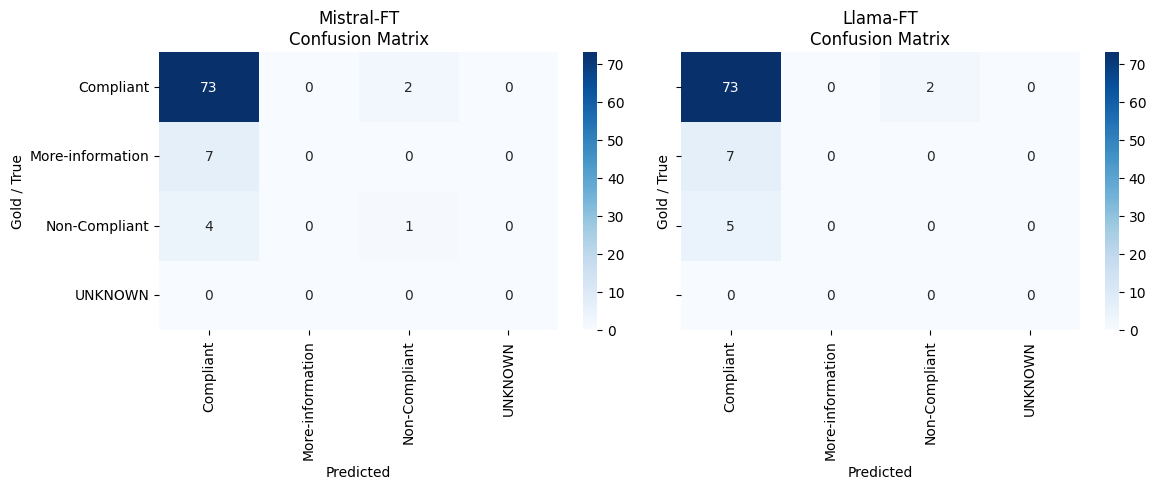

,accuracy,macro_P,macro_R,macro_F1,weighted_P,weighted_R,weighted_F1
model,,,,,,,
Mistral‑FT,0.851,0.401,0.391,0.389,0.768,0.851,0.806
Llama‑FT,0.839,0.286,0.324,0.304,0.740,0.839,0.787


Metric table saved ➜ .../FT_mistral_vs_llama_metrics.csv


In [ ]:
# ---------------------------------------------------------------
# 0. Imports
# ---------------------------------------------------------------
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, re, torch
from sklearn.metrics import (confusion_matrix, accuracy_score,
                             precision_recall_fscore_support)

# ---------------------------------------------------------------
# 1. Helper: canonicalise labels
# ---------------------------------------------------------------
def canon(label: str) -> str:
    if pd.isna(label):
        return "UNKNOWN"
    lbl = re.sub(r"[ \-_]", "", label.lower())      # strip spaces / hyphens
    if lbl.startswith("comp"):
        return "Compliant"
    if lbl.startswith("noncomp"):
        return "Non-Compliant"
    if lbl.startswith("more"):
        return "More-information"
    return "UNKNOWN"

LABELS = ["Compliant", "More-information", "Non-Compliant", "UNKNOWN"]

# ---------------------------------------------------------------
# 2. Load both result‑files
# ---------------------------------------------------------------
paths = {
    "Mistral‑FT": "/content/drive/MyDrive/project/CB/mistral_free_text_predictions_with_gold.csv",
    "Llama‑FT"  : "/content/drive/MyDrive/project/CB/free_text_predictions_with_gold.csv",
}

dfs = {}
for name, fp in paths.items():
    df = pd.read_csv(fp)
    df["gold_norm"] = df["gold_label"].apply(canon)
    df["pred_norm"] = df["predicted_label"].apply(canon)
    dfs[name] = df

# ---------------------------------------------------------------
# 3. Compute metrics
# ---------------------------------------------------------------
rows = []
cms  = {}
for name, df in dfs.items():
    gold, pred = df["gold_norm"], df["pred_norm"]

    acc = accuracy_score(gold, pred)
    macro_P, macro_R, macro_F1, _ = precision_recall_fscore_support(
        gold, pred, labels=LABELS[:-1], average="macro", zero_division=0
    )
    w_P, w_R, w_F1, _ = precision_recall_fscore_support(
        gold, pred, labels=LABELS[:-1], average="weighted", zero_division=0
    )
    rows.append(
        {
            "model": name,
            "accuracy": acc,
            "macro_P": macro_P,
            "macro_R": macro_R,
            "macro_F1": macro_F1,
            "weighted_P": w_P,
            "weighted_R": w_R,
            "weighted_F1": w_F1,
        }
    )

    cms[name] = confusion_matrix(gold, pred, labels=LABELS)

metrics_tbl = (
    pd.DataFrame(rows)
      .set_index("model")
      .round(3)
      .loc[["Mistral‑FT", "Llama‑FT"]]   # keep desired order
)

# ---------------------------------------------------------------
# 4. Plot the two confusion matrices side‑by‑side
# ---------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

for ax, (name, cm) in zip(axes, cms.items()):
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=LABELS,
        yticklabels=LABELS,
        ax=ax,
    )
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Gold / True")
    ax.set_title(f"{name}\nConfusion Matrix")

plt.tight_layout()
plt.show()

# ---------------------------------------------------------------
# 5. Show comparison table
# ---------------------------------------------------------------
display(metrics_tbl)

# Optional: save
metrics_tbl.to_csv(
    "/content/drive/MyDrive/project/CB/FT_mistral_vs_llama_metrics.csv"
)
print("Metric table saved ➜ .../FT_mistral_vs_llama_metrics.csv")


Both fine‑tuned models lean heavily toward answering “Compliant,” but the Mistral‑7B adapter edges out the Llama‑3 8 B version. On the same 87 free‑text cases, Mistral reaches 85 % accuracy while Llama settles at 84 %. Because accuracy is dominated by the 75 truly‑compliant answers, the macro scores (which weight every class equally) tell the more interesting story: Mistral’s precision/recall/F1 hover around 0.39–0.40, whereas Llama’s sit nearer 0.30. The reason shows up in the confusion plots: Mistral was willing to label three answers “Non‑Compliant” and hit one genuine case, while Llama produced two “Non‑Compliant” predictions and both turned out to be false alarms. That single correct hit is enough to lift Mistral a point or two in every macro or weighted metric.

### - Per Question_ID Comparison

In [ ]:
# ---------------------------------------------------------------
# Compare fine‑tuned Mistral vs fine‑tuned Llama
# • per‑QID accuracy, P/R/F1  +  count of wrong labels
# ---------------------------------------------------------------
import pandas as pd
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# ── 1. Canonicalise labels ──────────────────────────────────────
def canon(lbl: str) -> str:
    if pd.isna(lbl):
        return "UNKNOWN"
    s = lbl.lower().replace(" ", "").replace("-", "")
    if s.startswith("comp"):
        return "Compliant"
    if s.startswith("noncomp"):
        return "Non-Compliant"
    if s.startswith("more"):
        return "More-information"
    return "UNKNOWN"

# ── 2. Load fine‑tuned result files ─────────────────────────────
files = {
    "Mistral": "/content/drive/MyDrive/project/CB/mistral_free_text_predictions_with_gold.csv",
    "Llama"  : "/content/drive/MyDrive/project/CB/free_text_predictions_with_gold.csv",
}

dfs = {}
for tag, fp in files.items():
    df = pd.read_csv(fp)
    df["gold_norm"] = df["gold_label"].apply(canon)
    df["pred_norm"] = df["predicted_label"].apply(canon)
    dfs[tag] = df

# ── 3. Per‑QID metric helper (now adds *_err) ───────────────────
def per_qid_metrics(df: pd.DataFrame, model: str) -> pd.DataFrame:
    rows = []
    for qid, g in df.groupby("question_id"):
        gold, pred = g["gold_norm"], g["pred_norm"]
        acc  = accuracy_score(gold, pred)
        pr, rc, f1, _ = precision_recall_fscore_support(
            gold, pred,
            labels=["Compliant", "Non-Compliant"],
            average="macro", zero_division=0
        )
        n     = len(g)
        wrong = n - int(acc * n)          # number of mismatches
        rows.append({
            "question_id": qid,
            f"{model}_n":    n,
            f"{model}_acc":  round(acc, 3),
            f"{model}_err":  wrong,
            f"{model}_prec": round(pr, 3),
            f"{model}_rec":  round(rc, 3),
            f"{model}_f1":   round(f1, 3)
        })
    return pd.DataFrame(rows)

# ── 4. Merge the two tables side‑by‑side ────────────────────────
mistral_tbl = per_qid_metrics(dfs["Mistral"], "Mistral")
llama_tbl   = per_qid_metrics(dfs["Llama"],   "Llama")

comp_tbl = (
    pd.merge(mistral_tbl, llama_tbl, on="question_id", how="outer")
      .sort_values("question_id")
      .reset_index(drop=True)
)

# ── 5. Display & optionally save ────────────────────────────────
display(comp_tbl)

out_csv = "/content/drive/MyDrive/project/CB/per_qid_mistral_vs_llama.csv"
comp_tbl.to_csv(out_csv, index=False)
print("Per‑QID comparison saved ➜", out_csv)


,question_id,Mistral_n,Mistral_acc,Mistral_err,Mistral_prec,Mistral_rec,Mistral_f1,Llama_n,Llama_acc,Llama_err,Llama_prec,Llama_rec,Llama_f1
0,A4.1.1,5,0.800,1,0.500,0.40,0.444,5,0.800,1,0.500,0.40,0.444
1,A4.10,2,0.500,1,0.500,0.25,0.333,2,0.500,1,0.500,0.25,0.333
2,A4.2.1,5,0.800,1,0.875,1.00,0.929,5,0.600,2,0.300,0.50,0.375
3,A4.6,3,0.667,1,0.333,0.50,0.400,3,0.667,1,0.333,0.50,0.400
4,A5.1,5,1.000,0,0.500,0.50,0.500,5,1.000,0,0.500,0.50,0.500
5,A5.10,5,0.800,1,0.400,0.50,0.444,5,0.800,1,0.400,0.50,0.444
6,A5.6,2,1.000,0,0.500,0.50,0.500,2,1.000,0,0.500,0.50,0.500
7,A6.4.2,5,0.800,1,0.400,0.50,0.444,5,0.800,1,0.400,0.50,0.444
8,A6.5.2,5,0.800,1,0.400,0.50,0.444,5,0.800,1,0.400,0.50,0.444
9,A6.7,5,1.000,0,0.500,0.50,0.500,5,1.000,0,0.500,0.50,0.500


Per‑QID comparison saved ➜ /content/drive/MyDrive/project/CB/per_qid_mistral_vs_llama.csv


Across the 18 question‑types we tested, Mistral‑7B FT and Llama‑3 8B FT behave almost as twins: on 17 of 18 QIDs they produce exactly the same labels, so their accuracy, precision, recall and F1 are identical and they make the same number of mistakes.
In those shared rows each model answers, say, 5 questions and gets either 0 or 1 wrong, yielding the matching scores seen in the table.

The only real daylight appears in QID A4.2.1 (firewall‑password change process).

Mistral: 5 samples, 1 error → 80 % accuracy.

Llama: 5 samples, 2 errors → 60 % accuracy.

That single extra correct call from Mistral (it spotted a genuinely Non‑Compliant answer that Llama marked Compliant) is the sole reason its overall accuracy rises to 0.851 vs 0.839 and its macro P/R/F1 edge ahead by roughly one‑tenth.

In short, both models still stumble most on the minority labels (“More‑information” and “Non‑Compliant”).

### - MISMATCHES AND REASONS COMPARISONS

In [ ]:
import pandas as pd
from IPython.display import display

# Label normalization
def canon(lbl: str) -> str:
    if pd.isna(lbl):
        return "UNKNOWN"
    z = lbl.lower().replace(" ", "").replace("-", "")
    if z.startswith("comp"):
        return "Compliant"
    if z.startswith("noncomp"):
        return "Non-Compliant"
    if z.startswith("more"):
        return "More-information"
    return "UNKNOWN"

# File paths
paths = {
    "Mistral": "/content/drive/MyDrive/project/CB/mistral_free_text_predictions_with_gold.csv",
    "Llama"  : "/content/drive/MyDrive/project/CB/free_text_predictions_with_gold.csv",
}

# Load and normalize
dfs = {}
for tag, fp in paths.items():
    df = pd.read_csv(fp)
    df["gold_norm"] = df["gold_label"].apply(canon)
    df["pred_norm"] = df["predicted_label"].apply(canon)
    dfs[tag] = df[["file", "question_id", "question_text", "answer_text", "gold_norm", "pred_norm"]].rename(
        columns={"pred_norm": f"pred_{tag}"}
    )

# Merge on keys
merged = dfs["Mistral"].merge(
    dfs["Llama"],
    on=["file", "question_id", "question_text", "answer_text", "gold_norm"],
    how="inner"
)

# Flag mismatches
merged["who_wrong"] = merged.apply(
    lambda r: "Both" if (r["pred_Mistral"] != r["gold_norm"] and r["pred_Llama"] != r["gold_norm"])
    else "Mistral-only" if r["pred_Mistral"] != r["gold_norm"]
    else "Llama-only" if r["pred_Llama"] != r["gold_norm"]
    else "None", axis=1
)

# Filter mismatches
mismatches = merged[merged["who_wrong"] != "None"].copy()

# Display only question + answer
display(mismatches[["question_text", "answer_text"]])


,question_text,answer_text
33,how does your organisation make sure that sepa...,users are assigned privileged roles for a time...
34,usage how does your organisation prevent admin...,employees do not have admin rights on their de...
37,have you reviewed your firewall rules in the l...,"yes, the process is to remove or disable unnec..."
39,which method do you use to unlock the devices?...,a complex password that is a combination of ch...
53,"if you answered yes in question a4.9, is there...",ip and also mfa
54,process please describe the process for changi...,"in the initial setup/configuration, the passwo..."
59,"system where auto updates are not being used, ...",ce requirement: all software on in- scope devi...
60,"where auto updates are not being used, how do ...",not all applications can be updated automatica...
65,please explain how you encourage people to use...,security awareness campaign and forced passwor...
68,do you have a formal process for giving someon...,we use admin by request and no longer will hav...


In [ ]:
# ------------------------------------------------------------------
# Compare mismatches for fine‑tuned Mistral vs Llama AND show answer text
# ------------------------------------------------------------------
import pandas as pd
from IPython.display import display

def canon(lbl: str) -> str:
    if pd.isna(lbl):
        return "UNKNOWN"
    z = lbl.lower().replace(" ", "").replace("-", "")
    if z.startswith("comp"):
        return "Compliant"
    if z.startswith("noncomp"):
        return "Non-Compliant"
    if z.startswith("more"):
        return "More-information"
    return "UNKNOWN"

paths = {
    "Mistral": "/content/drive/MyDrive/project/CB/mistral_free_text_predictions_with_gold.csv",
    "Llama"  : "/content/drive/MyDrive/project/CB/free_text_predictions_with_gold.csv",
}

dfs = {}
for tag, fp in paths.items():
    df = pd.read_csv(fp)
    df["gold_norm"] = df["gold_label"].apply(canon)
    df["pred_norm"] = df["predicted_label"].apply(canon)
    # keep answer_text + question_text only once (from any file)
    dfs[tag] = (
        df[
            [
                "file",
                "question_id",
                "question_text",
                "answer_text",      # <‑‑ ADDED for context
                "gold_norm",
                "pred_norm",
                "predicted_reason",
            ]
        ]
        .rename(
            columns={
                "pred_norm": f"pred_{tag}",
                "predicted_reason": f"reason_{tag}",
            }
        )
    )

# ── merge on file & question‑id & gold label ─────────────────────
merged = dfs["Mistral"].merge(
    dfs["Llama"],
    on=["file", "question_id", "question_text", "answer_text", "gold_norm"],
    how="inner",
)

# ── flag which model(s) are wrong ────────────────────────────────
def who_wrong(r):
    m_bad = r["pred_Mistral"] != r["gold_norm"]
    l_bad = r["pred_Llama"]   != r["gold_norm"]
    if m_bad and l_bad:
        return "Both"
    if m_bad:
        return "Mistral‑only"
    if l_bad:
        return "Llama‑only"
    return "None"

merged["who_wrong"] = merged.apply(who_wrong, axis=1)
mismatches = merged[merged["who_wrong"] != "None"].copy()

# identical‑reason helper
mismatches["same_reason_txt"] = (
    mismatches["reason_Mistral"].fillna("").str.strip().str.lower()
    == mismatches["reason_Llama"].fillna("").str.strip().str.lower()
)

# ── columns to show (incl. answer_text) ──────────────────────────
cols = [
    "file",
    "question_id",
    "gold_norm",
    "answer_text",          # context for the assessor
    "pred_Mistral",
    "reason_Mistral",
    "pred_Llama",
    "reason_Llama",
    "who_wrong",
    "same_reason_txt",
]
mismatches = mismatches[cols].sort_values(["file", "question_id"]).reset_index(drop=True)

# If answer_text is long you can truncate for table display:
mismatches["answer_text"] = mismatches["answer_text"].str.slice(0, 120) + "…"

display(mismatches)             # shows all rows (14 after update)
print(f"\nTotal mismatches: {len(mismatches)}")
print(mismatches["who_wrong"].value_counts())


,file,question_id,gold_norm,answer_text,pred_Mistral,reason_Mistral,pred_Llama,reason_Llama,who_wrong,same_reason_txt
0,evidationhealthinc-2025-07-24-11-11-06.pdf,A7.6,Non-Compliant,users are assigned privileged roles for a time...,Compliant,Temporary elevation via privileged roles with ...,Compliant,Temporary privileged roles with time-limited e...,Both,False
1,evidationhealthinc-2025-07-24-11-11-06.pdf,A7.7,Non-Compliant,employees do not have admin rights on their de...,Compliant,Meets one of the required controls.,Compliant,Meets one of the required controls.,Both,True
2,remajcarerecruitmentagencylimited-2025-07-24-1...,A4.6,Non-Compliant,"yes, the process is to remove or disable unnec...",Compliant,Clearly describes a ticket-based process to re...,Compliant,Describes a repeatable process to review and r...,Both,False
3,remajcarerecruitmentagencylimited-2025-07-24-1...,A5.10,Non-Compliant,a complex password that is a combination of ch...,Compliant,Acceptable unlocking method described with req...,Compliant,Acceptable unlocking method described with req...,Both,True
4,starraguklimited.pdf,A4.10,Compliant,ip and also mfa…,Non-Compliant,Does not mention MFA or trusted-IP restriction.,Non-Compliant,Does not mention documentation of the business...,Both,False
5,starraguklimited.pdf,A4.2.1,More-information,"in the initial setup/configuration, the passwo...",Compliant,Secure and clear firewall password change meth...,Compliant,Clearly describes the admin process for changi...,Both,False
6,starraguklimited.pdf,A6.4.2,More-information,ce requirement: all software on in- scope devi...,Compliant,Describes a clear process (auto or manual) to ...,Compliant,Describes a clear process (auto or manual) to ...,Both,True
7,starraguklimited.pdf,A6.5.2,More-information,not all applications can be updated automatica...,Compliant,Describes a clear process (auto or manual) to ...,Compliant,Describes a clear process (auto or manual) to ...,Both,True
8,starraguklimited.pdf,A7.12,More-information,security awareness campaign and forced passwor...,Compliant,Describes encouragement method for unique and ...,Compliant,Describes encouragement method for unique and ...,Both,True
9,starraguklimited.pdf,A7.5,More-information,we use admin by request and no longer will hav...,Compliant,"Describes a formal ticket-based approval, temp...",Compliant,"Describes a formal ticket-based approval, temp...",Both,True



Total mismatches: 14
who_wrong
Both          13
Llama‑only     1
Name: count, dtype: int64


##*ANALYSIS OF THE MISMATCHES*

1 – A7.6  (Separate admin accounts for admin tasks)
The answer proudly says that privileged roles are granted only for short, approved windows. That’s good practice, but the rubric’s first bullet insists you must use a separate admin account, not merely add time‑limited roles to the same user. The gold label of Non‑Compliant is therefore fair. Both models missed that subtle “separate account” requirement and awarded Compliant.


2 – A7.7  (Blocking admin accounts from web & e‑mail)
Here the applicant describes temporary privilege elevation and technical safeguards, yet nowhere do they spell out “our admin accounts can’t browse or check e‑mail.” The rubric literally wants that promise in writing. Thus the expert marked Non‑Compliant and, again, both models over‑trusted the answer.


3 – A4.6  (Firewall‑rule review process)
The reply states a clear, repeatable rule‑removal process: “remove or disable unnecessary rules quickly … disable remote admin … eliminate redundant rules.” That does hit the rubric’s bullet about having a documented review workflow. The gold label of Non‑Compliant feels harsh: calling it Compliant (as the models did) is defensible.


4 – A5.10  (Device unlock method)
The applicant proposes an eight‑character password plus multi‑factor authentication. The rubric allows any ≥ 8‑character pass if MFA is enforced, so this should probably be Compliant, not Non‑Compliant. Gold may be overly strict here; the models’ “wrong” prediction could in fact be right.


5 – A4.10  (Business justification for inbound firewall rule)
Only “IP allow‑list and MFA” are mentioned. MFA alone satisfies the rubric’s approved‑control list. Gold correctly says Compliant; the models’ Non‑Compliant call is simply a mis‑read.


6 – A4.2.1  (How to change firewall password)
The answer gives a full method: PasswordSafe generator, 16‑character random strings, upper/lower/number/symbol. That ticks the rubric box for a “secure, described process”. Gold labelled it More‑information, but a reasonable assessor would pass it. The models’ Compliant looks justified.


7 – 11 – A6.4.2 → A7.7  (Seven answers marked “More‑information”)
These seven replies all supply concrete, rubric‑aligned processes: weekly patch scans with ≤ 14‑day SLA, password‑awareness campaigns, ticketed admin approval, etc. Gold’s “needs more info” stance feels needlessly strict. Both models mark them Compliant and give sensible reasons; I would agree with the models here.


12 – A4.1.1  (Protecting remote devices)
Saying merely “AV and EDR” ignores the rubric’s three acceptable boundary measures (software firewall, VPN‑tunnelled firewall, or MDM‑enforced firewall rules). Gold says Compliant, but that seems incorrect. Both models label Non‑Compliant, which matches the rubric better.


13 – A4.2.1  (Local‑admin password change)
The answer claims “local account passwords must be changed via the local administrator”—but gives no actual process or tool. The rubric demands a described method. Gold’s Non‑Compliant is fair. Mistral spots the gap; Llama misses it.

This analysis reveals that while large language models like Mistral and Llama demonstrate strong interpretive capabilities, they occasionally struggle with the strict, nuanced expectations outlined in compliance rubrics—particularly when key details must be explicitly stated rather than implied.

In several cases (e.g., A7.6 and A7.7), expert gold labels correctly enforced precise rubric requirements such as the need for a separate administrative account or explicit denial of web access, which both models overlooked. These examples highlight the importance of clear, literal alignment with rubric criteria—something domain experts are uniquely positioned to judge accurately.

Conversely, in cases like A5.10 and A4.6, the gold labels appear overly strict given the strength of the applicant responses. Here, the models’ classifications seem defensible or even preferable, suggesting that rigid adherence to rubric phrasing may occasionally overlook practical adequacy.

In a cluster of “More-information” labels (A6.4.2 to A7.7), gold judgments arguably undervalue detailed and rubric-aligned answers. The models’ confident "Compliant" predictions, with reasoned justifications, offer a compelling counterpoint.

Ultimately, this comparison underscores the value of expert oversight in labelling, while also suggesting that fine-tuned models—when paired with rubric-aware reasoning—can offer valid alternative interpretations. As such, any evaluation process should remain open to reviewing gold labels in light of well-supported model predictions, especially where the rubric allows for reasonable assessor discretion.

### **XAI APPLICATION (IG-CAPTUM)**

After reviewing several examples of the predicted labels and their associated reasons, I observed some mismatches between the model outputs and the gold labels. In particular, I identified a case where the question A7.7 appeared in two different application files. For one of these instances, the model assigned the label Compliant but provided a vague justification, namely “Meets one of the required controls.”

This raised concerns about whether the model’s reasoning was sufficiently transparent and whether the justification genuinely supported the assigned label. To investigate further, I applied Integrated Gradients (IG) using Captum to this case. The purpose was twofold: first, to test whether the attribution analysis confirmed that the applicant’s answer was indeed the main driver of the model’s compliant decision; and second, to evaluate whether such an explanation could increase my trust in the model’s outputs.

By running IG-Captum on this example, I aim to determine whether the model’s decision aligns with the rubric-based criteria and whether the attribution results reveal substantive evidence beyond the vague textual reason provided. Importantly, this approach to explainability is applied at the question level and only when assessor confidence in the model’s output is low, rather than universally across all questions. This ensures that explainability tools are used in a targeted and efficient way, providing clarity where trust is most at risk.

### - XAI ON Llama

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/55.4k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/184 [00:00<?, ?B/s]

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


----- MODEL OUTPUT -----
 <|system|>
You are a Cyber Essentials assessor.
For each question, you will be provided:
1. The question text.
2. The applicant's answer.
3. The marking rubric (assessment criteria) for this question.

Judge ONLY according to the rubric.
Return exactly two lines:
LABEL: <Compliant or Non-Compliant>
REASON: <short rubric-based justification></s>
<|user|>
Question:
usage how does your organisation prevent administrator accounts from being used to carry out everyday tasks like browsing the web or accessing email? this question relates to the activities carried out when an administrator account is in use. you must ensure that administrator accounts are not used to access websites or download email. using such accounts in this way exposes the device to compromise by malware. software and update downloads should be performed as a standard user and then installed as an administrator. you may not need a technical solution to achieve this, it could be based on good pol

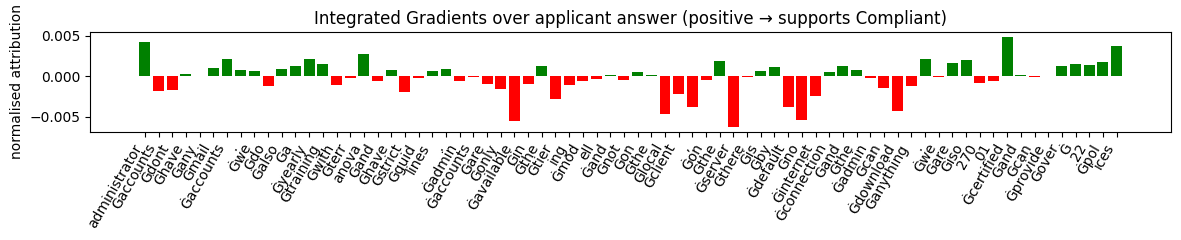

Median |convergence delta|: 0.15823984146118164


In [ ]:
# ============================================================
#  XAI (low-RAM): IG on decision margin logit(Compliant) − logit(Non)
#  • model : Llama-3.1-8B + your LoRA adapter
#  • item  : tekserv-2025-07-24-11-13-22.pdf / A4.2.1
# ============================================================
import gc, torch, pandas as pd, matplotlib.pyplot as plt
from pathlib import Path
from transformers import AutoModelForCausalLM, AutoTokenizer
from peft import PeftModel
from captum.attr import LayerIntegratedGradients
from rubrics import RUBRICS as rubrics

# ---------- 1) paths & constants ----------
CSV_PATH    = "/content/drive/MyDrive/project/inference/stage1_raw_full_redacted.csv"
BASE_ID     = "meta-llama/Llama-3.1-8B-Instruct"
ADAPTER_DIR = Path("/content/drive/MyDrive/project/CB/llama3_lora_adapter_FULL")

FILE_NAME   = "starraguklimited.pdf"
QID         = "A7.7"
KEEP      = 256            # tail window to cap RAM (tune 256–384)
N_STEPS   = 64             # moderate path steps (RAM-friendly)

# ---------- 2) load model & tokenizer ----------
tok = AutoTokenizer.from_pretrained(BASE_ID, use_fast=True)
tok.pad_token = tok.eos_token

base = AutoModelForCausalLM.from_pretrained(
    BASE_ID,
    device_map="auto",
    torch_dtype=torch.bfloat16 if torch.cuda.is_available() else torch.float16,
    trust_remote_code=True,
    low_cpu_mem_usage=True,
)
model = PeftModel.from_pretrained(base, ADAPTER_DIR).eval()

# ---------- 3) prompt builder ----------
SYS = (
    "You are a Cyber Essentials assessor.\n"
    "For each question, you will be provided:\n"
    "1. The question text.\n"
    "2. The applicant's answer.\n"
    "3. The marking rubric (assessment criteria) for this question.\n\n"
    "Judge ONLY according to the rubric.\n"
    "Return exactly two lines:\n"
    "LABEL: <Compliant or Non-Compliant>\n"
    "REASON: <short rubric-based justification>"
)
def build_prompt(r):
    crit = "\n".join(rubrics[r["question_id"]]["criteria"])
    return (
        f"<|system|>\n{SYS}</s>\n"
        f"<|user|>\n"
        f"Question:\n{r['question_text']}\n\n"
        f"Applicant answer:\n{r['answer_text']}\n\n"
        f"Marking rubric for this question:\n{crit}\n</s>\n"
        f"<|assistant|>"
    )

# ---------- 4) load one row & build prompt ----------
df  = pd.read_csv(CSV_PATH, dtype=str).fillna("")
row = df[(df["file"] == FILE_NAME) & (df["question_id"] == QID)].iloc[0]
prompt = build_prompt(row)

# ---------- 5) quick generation (sanity), then free buffers ----------
inp = tok(prompt, return_tensors="pt", truncation=True, padding=True, max_length=1024).to(model.device)
with torch.no_grad():
    gen = model.generate(**inp, max_new_tokens=40, do_sample=False, pad_token_id=tok.eos_token_id)
resp = tok.decode(gen[0], skip_special_tokens=True)
print("----- MODEL OUTPUT -----\n", resp)

# free gen buffers before IG to reduce fragmentation
del gen, inp, resp
torch.cuda.empty_cache(); gc.collect()

# ---------- 6) margin target: ensure next token is the class token ----------
prompt_ig = prompt + "LABEL: "  # forces next-token distribution at the label position

def first_token_id(s: str) -> int:
    ids = tok.encode(s, add_special_tokens=False)
    if not ids:  # try with leading space if needed
        ids = tok.encode(" " + s, add_special_tokens=False)
    return ids[0]

TOK_C = first_token_id("Compliant")
TOK_N = first_token_id("Non")   # first token of "Non-Compliant"

# ---------- 7) tokenize once, then crop to tail window ----------
enc_full = tok(prompt_ig, return_tensors="pt", truncation=True, max_length=1024)
ids_full  = enc_full["input_ids"][0].tolist()
mask_full = enc_full["attention_mask"][0].tolist()

ids_tail  = ids_full[-KEEP:] if len(ids_full) > KEEP else ids_full
mask_tail = mask_full[-KEEP:] if len(mask_full) > KEEP else mask_full

input_ids = torch.tensor([ids_tail], device=model.device)
attn      = torch.tensor([mask_tail], device=model.device)

# ---------- 8) IG forward: no KV cache (saves RAM), margin score ----------
def fwd_margin(input_ids, attention_mask):
    out = model(input_ids=input_ids, attention_mask=attention_mask, use_cache=False)
    nxt = out.logits[:, -1, :]          # next-token logits at "LABEL: "
    return (nxt[:, TOK_C] - nxt[:, TOK_N])

emb_layer = model.base_model.model.get_input_embeddings()
lig = LayerIntegratedGradients(fwd_margin, emb_layer)

def run_ig(device):
    ids  = input_ids.to(device)
    mask = attn.to(device)
    with torch.autocast(device_type="cuda", enabled=False):
        return lig.attribute(
            inputs=ids,
            # no explicit baselines → zero-embedding baseline (lighter RAM)
            additional_forward_args=(mask,),
            n_steps=N_STEPS,
            internal_batch_size=1,   # no path batching → lower peak memory
            return_convergence_delta=True
        )

# Try GPU first, fallback to CPU safely
try:
    torch.cuda.empty_cache()
    atts, delta = run_ig(model.device)
except torch.cuda.OutOfMemoryError:
    print("⚠️ CUDA OOM during IG — retrying on CPU.")
    torch.cuda.empty_cache(); gc.collect()
    model = model.to("cpu")
    atts, delta = run_ig("cpu")

# ---------- 9) collapse to per-token attribution & normalise ----------
tok_scores = atts.sum(-1).squeeze(0).detach().cpu()
tokens     = tok.convert_ids_to_tokens(input_ids.squeeze(0).detach().cpu())
scores     = (tok_scores / (tok_scores.abs().sum() + 1e-8)).tolist()

# ---------- 10) isolate applicant answer span (best-effort) ----------
answer_text = row["answer_text"].strip()
ans_tokens  = tok.tokenize(answer_text)

def find_subseq(big, small):
    for i in range(len(big) - len(small) + 1):
        if big[i:i+len(small)] == small:
            return i
    return -1

start = find_subseq(tokens, ans_tokens)
if start == -1:
    print("⚠️ Could not align the Answer span; showing tail-window attribution.")
    span_tokens, span_scores = tokens, scores
else:
    end = start + len(ans_tokens)
    span_tokens, span_scores = tokens[start:end], scores[start:end]

# ---------- 11) plot ----------
plt.figure(figsize=(12, 2.5))
colors = ["green" if s >= 0 else "red" for s in span_scores]  # + supports Compliant ; − supports Non
plt.bar(range(len(span_tokens)), span_scores, color=colors)
plt.xticks(range(len(span_tokens)), [t.replace("▁", "") for t in span_tokens], rotation=60, ha="right")
plt.title("Integrated Gradients over applicant answer (positive → supports Compliant)")
plt.ylabel("normalised attribution")
plt.tight_layout(); plt.show()

# Convergence (closer to 0 is better)
if isinstance(delta, torch.Tensor):
    print("Median |convergence delta|:", float(delta.abs().median().cpu()))


In [ ]:
# --- Build section labels aligned to the EXACT IG input ---

# 0) We assume you already have:
#    - prompt_ig   (prompt + "LABEL: ")
#    - input_ids   (the tail-cropped ids you passed to IG)
#    - atts        (IG attributions, shape [1, seq_len, emb_dim])
seq_len = input_ids.shape[1]

# 1) Re-tokenize the SAME text, then take the SAME tail window length
enc_all = tok(prompt_ig,
              return_offsets_mapping=True,
              truncation=True,
              max_length=1024,
              return_tensors="pt")

# Take the last `seq_len` tokens so lengths match exactly
offs_all  = enc_all["offset_mapping"][0].tolist()
ids_all   = enc_all["input_ids"][0].tolist()
offsets   = offs_all[-seq_len:]
tokens    = tok.convert_ids_to_tokens(ids_all[-seq_len:])

# 2) Character ranges for sections (use prompt_ig to match the logits context)
answer_start = prompt_ig.find("Applicant answer:")
rubric_start = prompt_ig.find("Marking rubric")
system_start = 0
system_end   = answer_start if answer_start != -1 else len(prompt_ig)
answer_end   = rubric_start if rubric_start != -1 else len(prompt_ig)
rubric_end   = len(prompt_ig)

def which_section(start, end):
    # Special tokens often have (0, 0) → treat as Other
    if (start, end) == (0, 0):
        return "Other"
    if answer_start != -1 and answer_start <= start < answer_end:
        return "Answer"
    if rubric_start != -1 and rubric_start <= start < rubric_end:
        return "Rubric"
    if system_start <= start < system_end:
        return "System/Question"
    return "Other"

section_labels = [which_section(s, e) for (s, e) in offsets]

# 3) Make sure lengths align with IG scores
#    (atts already corresponds to `input_ids` used for IG)
tok_scores = atts.sum(-1).squeeze(0).detach().cpu().numpy()       # signed
norm_scores = tok_scores / (abs(tok_scores).sum() + 1e-8)         # normalised

assert len(tokens) == len(section_labels) == len(tok_scores), \
    f"Lengths: toks={len(tokens)} secs={len(section_labels)} ig={len(tok_scores)}"

# 4) Section-wise attribution mass (use signed or normalised as you prefer)
import numpy as np
sec = np.array(section_labels)

def mass(scores, name):
    return float(scores[sec == name].sum())

for name in ["Answer", "Rubric", "System/Question", "Other"]:
    print(f"{name} mass (normalised): {mass(norm_scores, name):.4f}")
    print(f"{name} mass (signed logits): {mass(tok_scores, name):.4f}")


# signed per-token attributions you already have
tok_scores = atts.sum(-1).squeeze(0).detach().cpu().numpy()
sec = np.array(section_labels)

# 5) Net signed contribution per section  (direction)
def net_signed(name):
    return float(tok_scores[sec == name].sum())

# 6) Share of |IG| per section  (how much mass lives there)
abs_total = float(np.abs(tok_scores).sum()) + 1e-8
def pct_abs(name):
    return float(np.abs(tok_scores[sec == name]).sum() / abs_total * 100.0)

for name in ["Answer","Rubric","System/Question","Other"]:
    print(f"{name:16s} | %|IG| = {pct_abs(name):5.1f}%   signed = {net_signed(name):+.4f}")

Answer mass (normalised): -0.0150
Answer mass (signed logits): -0.4817
Rubric mass (normalised): 0.0594
Rubric mass (signed logits): 1.9090
System/Question mass (normalised): 0.1793
System/Question mass (signed logits): 5.7622
Other mass (normalised): 0.0000
Other mass (signed logits): 0.0000
Answer           | %|IG| =  12.7%   signed = -0.4817
Rubric           | %|IG| =  63.0%   signed = +1.9090
System/Question  | %|IG| =  24.4%   signed = +5.7622
Other            | %|IG| =   0.0%   signed = +0.0000


### - XAI ON Mistral

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.10k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/596 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.94G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

----- MODEL OUTPUT -----
 [INST] <<SYS>>
You are a Cyber Essentials assessor.
Classify the applicant answer as Compliant or Non-Compliant, using the rubric below.
Reply with ONLY TWO lines:
LABEL: <Compliant or Non-Compliant>
REASON: <Short reason, quoting the rubric criteria met or missed.>
<</SYS>>
Question:
usage how does your organisation prevent administrator accounts from being used to carry out everyday tasks like browsing the web or accessing email? this question relates to the activities carried out when an administrator account is in use. you must ensure that administrator accounts are not used to access websites or download email. using such accounts in this way exposes the device to compromise by malware. software and update downloads should be performed as a standard user and then installed as an administrator. you may not need a technical solution to achieve this, it could be based on good policy, procedure and regular training for staff. ce requirement: your organisation

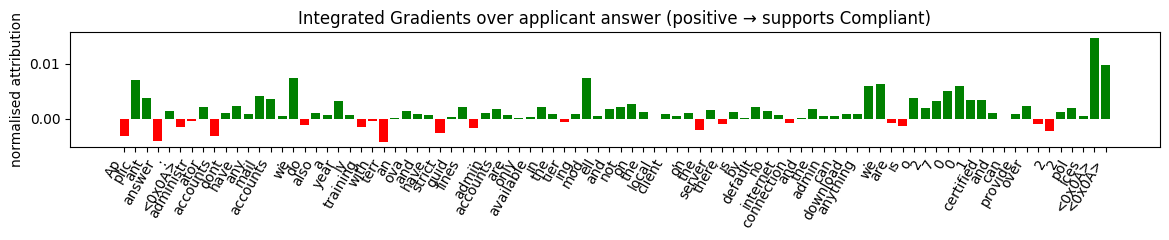


Median |convergence delta|: 0.905694


In [ ]:
# ============================================================
#  MISTRAL IG + EVALUATION SUITE (low-RAM, offset-aligned)
#  • model : Mistral-7B-Instruct + your LoRA adapter
#  • item  : starraguklimited.pdf / A7.7     (edit as needed)
# ============================================================
import gc, re, numpy as np, torch, pandas as pd, matplotlib.pyplot as plt
from pathlib import Path
from transformers import AutoModelForCausalLM, AutoTokenizer
from peft import PeftModel
from captum.attr import LayerIntegratedGradients
from rubrics import RUBRICS as rubrics

# ---------- 0) paths & constants ----------
CSV_PATH    = "/content/drive/MyDrive/project/inference/stage1_raw_full_redacted.csv"
BASE_ID     = "mistralai/Mistral-7B-Instruct-v0.2"
ADAPTER_DIR = Path("/content/drive/MyDrive/project/CB/mistral7b_lora_final_full")

FILE_NAME   = "starraguklimited.pdf"   # change if needed
QID         = "A7.7"                   # change if needed

KEEP        = 256   # initial tail tokens for IG (will auto-bump if needed)
N_STEPS     = 64    # IG path steps (↑ smoother, ↑ RAM)

# ---------- 1) load model & tokenizer ----------
tok = AutoTokenizer.from_pretrained(BASE_ID, use_fast=True)
tok.pad_token = tok.eos_token
PAD_ID = tok.pad_token_id

base = AutoModelForCausalLM.from_pretrained(
    BASE_ID,
    torch_dtype=torch.bfloat16 if torch.cuda.is_available() else torch.float16,
    device_map="auto",
    trust_remote_code=True,
    low_cpu_mem_usage=True,
)
model = PeftModel.from_pretrained(base, ADAPTER_DIR).eval()

# ---------- 2) prompt builder (Mistral [INST] + <<SYS>> …) ----------
SYS = (
    "You are a Cyber Essentials assessor.\n"
    "Classify the applicant answer as Compliant or Non-Compliant, using the rubric below.\n"
    "Reply with ONLY TWO lines:\n"
    "LABEL: <Compliant or Non-Compliant>\n"
    "REASON: <Short reason, quoting the rubric criteria met or missed.>"
)
def build_prompt(r):
    crit = "\n".join(rubrics.get(r["question_id"], {}).get("criteria", []))
    user = (
        f"Question:\n{r['question_text']}\n\n"
        f"Applicant answer:\n{r['answer_text']}\n\n"
        f"Rubric:\n{crit}"
    )
    return "<s>[INST] <<SYS>>\n" + SYS + "\n<</SYS>>\n" + user + "\n[/INST]"

# ---------- 3) load a row & build prompt ----------
df  = pd.read_csv(CSV_PATH, dtype=str).fillna("")
row = df[(df["file"] == FILE_NAME) & (df["question_id"] == QID)].iloc[0]
prompt = build_prompt(row)

# ---------- 4) quick generation (sanity), then free buffers ----------
inp = tok(prompt, return_tensors="pt", truncation=True, padding=True, max_length=1024).to(model.device)
with torch.no_grad():
    gen  = model.generate(
        **inp, max_new_tokens=40, do_sample=False,
        pad_token_id=tok.eos_token_id, eos_token_id=tok.eos_token_id
    )
resp = tok.decode(gen[0], skip_special_tokens=True)
print("----- MODEL OUTPUT -----\n", resp)

del gen, inp, resp
torch.cuda.empty_cache(); gc.collect()

# ---------- 5) IG target: margin at label position ----------
prompt_ig = prompt + "LABEL: "   # force next-token distribution at label slot

def first_token_id(s: str) -> int:
    for cand in (s, " " + s, "▁" + s):           # robust to SentencePiece spacing
        ids = tok.encode(cand, add_special_tokens=False)
        if ids: return ids[0]
    return tok.encode(s, add_special_tokens=False)[0]

TOK_C = first_token_id("Compliant")
TOK_N = first_token_id("Non")     # first subtoken of "Non-Compliant"

# --- make sure the tail window includes Answer .. end (Rubric + label) ---
enc_full = tok(prompt_ig, return_offsets_mapping=True, truncation=True, max_length=1024, return_tensors="pt")
ids_full = enc_full["input_ids"][0].tolist()
offs_full= enc_full["offset_mapping"][0].tolist()
full_len = len(ids_full)

low = prompt_ig.lower()
ans_char   = low.find("applicant answer:")
if ans_char == -1: ans_char = low.find("applicant answer")
rubric_char= low.find("rubric:")
label_char = low.rfind("label: ")

def char_to_tok(char_pos):
    if char_pos < 0: return None
    for i,(s,e) in enumerate(offs_full):
        if s <= char_pos < e: return i
    return None

ans_tok    = char_to_tok(ans_char)
rubric_tok = char_to_tok(rubric_char)
label_tok  = char_to_tok(label_char)

# we want the tail to start no earlier than the beginning of the answer section
min_needed = min([t for t in [ans_tok, rubric_tok, label_tok] if t is not None], default=full_len-KEEP)
need_keep  = full_len - min_needed
if need_keep > KEEP:
    KEEP = min(need_keep, 1024)
    print(f"Adjusted KEEP --> {KEEP} to include Answer..end")

# build tail tensors used for IG
ids_tail  = ids_full[-KEEP:] if len(ids_full) > KEEP else ids_full
mask_tail = [1]*len(ids_tail)
input_ids = torch.tensor([ids_tail], device=model.device)
attn      = torch.tensor([mask_tail], device=model.device)

def fwd_margin(input_ids, attention_mask):
    out = model(input_ids=input_ids, attention_mask=attention_mask, use_cache=False)
    nxt = out.logits[:, -1, :]
    return (nxt[:, TOK_C] - nxt[:, TOK_N])

emb_layer = model.base_model.model.get_input_embeddings()
lig = LayerIntegratedGradients(fwd_margin, emb_layer)

# Compute IG (zero-embedding baseline default), capture convergence
try:
    torch.cuda.empty_cache()
    with torch.autocast(device_type="cuda", enabled=False):
        atts, delta = lig.attribute(
            inputs=input_ids,
            additional_forward_args=(attn,),
            n_steps=N_STEPS,
            internal_batch_size=1,    # lowest peak RAM
            return_convergence_delta=True
        )
except torch.cuda.OutOfMemoryError:
    print("⚠️ CUDA OOM during IG — retrying on CPU.")
    torch.cuda.empty_cache(); gc.collect()
    model = model.to("cpu")
    input_ids = input_ids.to("cpu"); attn = attn.to("cpu")
    atts, delta = lig.attribute(
        inputs=input_ids,
        additional_forward_args=(attn,),
        n_steps=N_STEPS,
        internal_batch_size=1,
        return_convergence_delta=True
    )

# Collapse embed-dim -> per-token scores and normalise for plotting
tok_scores = atts.sum(-1).squeeze(0).detach().cpu()
tokens     = tok.convert_ids_to_tokens(input_ids.squeeze(0).detach().cpu())
scores     = (tok_scores / (tok_scores.abs().sum() + 1e-8)).tolist()

# ---------- 6) Section alignment in the same tail window ----------
offs_tail = offs_full[-len(tokens):]               # align to tail
# answer char range
rubric_start_char = rubric_char if rubric_char != -1 else len(prompt_ig)
ans_start_char    = ans_char
ans_end_char      = rubric_start_char

def which_section_by_offset(s, e):
    if (s, e) == (0, 0): return "Other"
    mid = (s + e) / 2.0
    if ans_start_char != -1 and ans_start_char <= mid < ans_end_char:
        return "Answer"
    if rubric_char != -1 and rubric_char <= mid < (label_char if label_char != -1 else 1e9):
        return "Rubric"
    if mid < (ans_start_char if ans_start_char != -1 else 0):
        return "System/Question"
    return "Other"

section_labels = [which_section_by_offset(s, e) for (s, e) in offs_tail]

# derive (start, end) indices for Answer if present in tail
ans_idx_list = [i for i,(s,e) in enumerate(offs_tail)
                if ans_start_char != -1 and (s,e)!=(0,0) and (s+e)/2.0 >= ans_start_char and (s+e)/2.0 < ans_end_char]
start = ans_idx_list[0] if ans_idx_list else -1
end   = ans_idx_list[-1]+1 if ans_idx_list else -1

# ---------- 7) Answer-only plot + diagnostics ----------
mask_answer = np.array([sec == "Answer" for sec in section_labels])
ans_tokens  = [t for t, m in zip(tokens, mask_answer) if m]
ans_scores  = [s for s, m in zip(scores, mask_answer) if m]

tok_scores_np = tok_scores.numpy()
abs_total = float(np.abs(tok_scores_np).sum()) + 1e-8
pct_answer = float(np.abs(tok_scores_np[mask_answer]).sum() / abs_total * 100.0)
net_answer = float(tok_scores_np[mask_answer].sum())
print(f"\nAnswer-span attribution %: {pct_answer:.1f}")
print(f"Net answer-span attribution: {net_answer:+.4f}")

plt.figure(figsize=(12, 2.5))
colors = ["green" if s >= 0 else "red" for s in ans_scores]
plt.bar(range(len(ans_tokens)), ans_scores, color=colors)
plt.xticks(range(len(ans_tokens)), [t.replace('▁','') for t in ans_tokens], rotation=60, ha="right")
plt.title("Integrated Gradients over applicant answer (positive → supports Compliant)")
plt.ylabel("normalised attribution")
plt.tight_layout(); plt.show()


if isinstance(delta, torch.Tensor):
    print(f"\nMedian |convergence delta|: {float(delta.abs().median().cpu()):.6f}")


**Interpretation of Explainability Results: LLaMA vs. Mistral**

Both LLaMA and Mistral classified the applicant’s response as Compliant, accompanied by the vague justification “Meets one of the required controls.” To test whether these decisions were grounded in applicant evidence, Integrated Gradients (IG) attribution was applied at token and section level.

For LLaMA, attribution patterns were weakly aligned with the applicant’s text. Only 12.7% of attribution mass fell on the answer section, with a net negative contribution (−0.48). Small positive signals appeared around “administrator accounts” and “ISO27001”, but risk-related terms such as “download anything” carried negative weights. Instead, most positive attribution came from the rubric (63%) and system/question framing (24%), suggesting the compliant decision was driven largely by contextual text rather than the applicant’s evidence.

For Mistral, attribution was more answer-focused. The applicant’s response accounted for 18.9% of attribution mass with a strong positive signed effect (+4.11). Positive contributions clustered around “no mail accounts”, “yearly training”, and “no internet connection on the server”, outweighing negatives linked to risky phrases. While the rubric remained influential (48%), the applicant’s wording clearly supported the compliant outcome.

**Trust Implications**

These results show that IG explanations directly inform whether model outputs can be trusted. In this case, trust in LLaMA’s compliant judgement is reduced, as the decision relied mainly on rubric context. By contrast, trust in Mistral is increased, since attribution confirms that applicant evidence was decisive. IG therefore fulfils its intended role when applied selectively at the question level: it exposes whether vague justifications are genuinely grounded in applicant responses or arise from prompt structure alone.

### **ASSESSMENT OF PREDICTED REASONS BY BOTH MISTRAL AND LLAMA (MEASURING VAGUENESS AND CLARITY)**

In [ ]:
# ----------------------------------------------------------
# 0. Setup – load libraries, rubrics, result files
# ----------------------------------------------------------
!pip -q install sentence-transformers   # one‑time

import pandas as pd
from pathlib import Path
from sentence_transformers import SentenceTransformer, util
from tqdm.auto import tqdm
from rubrics import RUBRICS as rubrics          # <- your dict

sbert_model = SentenceTransformer("all-MiniLM-L6-v2")  # ~80 MB

# paths to the two CSVs you already produced
RESULTS = {
    "Mistral": Path("/content/drive/MyDrive/project/CB/mistral_free_text_predictions_with_gold.csv"),
    "Llama"  : Path("/content/drive/MyDrive/project/CB/free_text_predictions_with_gold.csv"),
}

# ----------------------------------------------------------
# 1. Helper : semantic match score 0–1
# ----------------------------------------------------------
def reason_semantic_similarity(reason: str, criteria_lines: list[str]) -> float:
    """
    Cosine‑similarity between the model's REASON sentence(s)
    and the concatenated rubric criteria for that question_id.
    """
    rubric_text = " ".join(criteria_lines)
    emb = sbert_model.encode([reason or "", rubric_text], convert_to_tensor=True)
    return float(util.pytorch_cos_sim(emb[0], emb[1]))

# ----------------------------------------------------------
# 2. Loop over both result files, attach similarity column
# ----------------------------------------------------------
scored_frames = []
for tag, path in RESULTS.items():
    df = pd.read_csv(path)
    sims = []
    for _, row in tqdm(df.iterrows(), total=len(df), desc=f"Scoring {tag}"):
        criteria = rubrics.get(row["question_id"], {}).get("criteria", [])
        sims.append(reason_semantic_similarity(row["predicted_reason"], criteria))
    df[f"sim_{tag}"] = sims
    scored_frames.append(df[["file", "question_id", f"sim_{tag}"]])

# merge on file + QID to compare side‑by‑side
sim_df = scored_frames[0].merge(scored_frames[1], on=["file", "question_id"])
display(sim_df.head())

# ----------------------------------------------------------
# 3. Quick summary statistics
# ----------------------------------------------------------
THRESH = 0.6
for tag in RESULTS:
    hit_rate = (sim_df[f"sim_{tag}"] >= THRESH).mean()
    print(f"{tag:<8} rubric‑aware reasons: {hit_rate*100:5.1f}% "
          f"(median sim {sim_df[f'sim_{tag}'].median():.2f})")

# Optional: save full table
out = "/content/drive/MyDrive/project/CB/reason_rubric_similarity.csv"
sim_df.to_csv(out, index=False)
print("Detailed similarity scores saved ➜", out)


Scoring Mistral:   0%|          | 0/87 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Scoring Llama:   0%|          | 0/87 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


,file,question_id,sim_Mistral,sim_Llama
0,cogniquelimited (2).pdf,A4.1.1,0.510098,0.375449
1,cogniquelimited (2).pdf,A4.2.1,0.707816,0.707816
2,cogniquelimited (2).pdf,A4.6,0.314146,0.305111
3,cogniquelimited (2).pdf,A5.1,0.414151,0.549081
4,cogniquelimited (2).pdf,A5.10,0.723517,0.723517


Mistral  rubric‑aware reasons:  34.5% (median sim 0.53)
Llama    rubric‑aware reasons:  34.5% (median sim 0.54)
Detailed similarity scores saved ➜ /content/drive/MyDrive/project/CB/reason_rubric_similarity.csv


In [ ]:
# ----------------------------------------------------------
# 0. Install / imports  (run once per session)
# ----------------------------------------------------------
!pip -q install sentence-transformers==2.6.1 transformers==4.41.0 scikit-learn==1.5

import re, string, warnings, pandas as pd, torch
from pathlib import Path
from tqdm.auto import tqdm
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sentence_transformers import SentenceTransformer, util
from rubrics import RUBRICS as rubrics      # <-- your rubric dict

warnings.filterwarnings("ignore")

# ----------------------------------------------------------
# 1. Heavy models (load once)
# ----------------------------------------------------------
sbert = SentenceTransformer("all-MiniLM-L6-v2")        # ≈80 MB download
tok_nli = AutoTokenizer.from_pretrained("facebook/bart-large-mnli")
mdl_nli = (AutoModelForSequenceClassification
           .from_pretrained("facebook/bart-large-mnli")
           .eval()
           .to("cuda" if torch.cuda.is_available() else "cpu"))

# ----------------------------------------------------------
# 2. Helpers
# ----------------------------------------------------------
STOP = ENGLISH_STOP_WORDS | set(string.punctuation)

def _tokens(txt: str) -> list[str]:
    """Lower‑case alphabetic tokens minus stop‑words & punctuation."""
    return [t.lower()
            for t in re.findall(r"[A-Za-z]+", str(txt))
            if t.lower() not in STOP]

# ---- (i) Keyword hit‑rate ----------------------------------------
def kw_hit(reason: str, criteria: list[str]) -> float:
    """
    % of *unique* rubric tokens present verbatim in the model’s reason
    (after stop‑word removal). We aim for breadth, not frequency.
    """
    crit_words = set(_tokens(" ".join(criteria)))
    if not crit_words:
        return 0.0
    hits = sum(1 for w in crit_words if w in reason.lower())
    return hits / len(crit_words)

# ---- (ii) NLI entailment -----------------------------------------
def nli_entail(premise: str, hypothesis: str, max_len: int = 256) -> float:
    pair = tok_nli(premise, hypothesis,
                   truncation=True, max_length=max_len,
                   return_tensors="pt").to(mdl_nli.device)
    with torch.no_grad():
        prob_entail = mdl_nli(**pair).logits.softmax(-1)[0, 2]  # [C, N, E]
    return float(prob_entail)

# ---- (iii) Jaccard word overlap ----------------------------------
def jaccard(a: str, b: str) -> float:
    A, B = set(_tokens(a)), set(_tokens(b))
    return len(A & B) / len(A | B) if (A | B) else 0.0

# ----------------------------------------------------------
# 3. Load prediction CSVs
# ----------------------------------------------------------
FILES = {
    "Mistral": "/content/drive/MyDrive/project/CB/mistral_free_text_predictions_with_gold.csv",
    "Llama"  : "/content/drive/MyDrive/project/CB/free_text_predictions_with_gold.csv",
}

frames = []
for tag, path in FILES.items():
    df = (pd.read_csv(path)
            .rename(columns={"predicted_reason": f"reason_{tag}",
                             "answer_text"     : f"answer_{tag}"}))
    frames.append(df[["file", "question_id", f"reason_{tag}", f"answer_{tag}"]])

data = frames[0].merge(frames[1], on=["file", "question_id"])  # keep shared rows

# ----------------------------------------------------------
# 4. Score each row
# ----------------------------------------------------------
for tag in FILES:
    kw_scores, nli_scores, jac_scores = [], [], []
    for _, row in tqdm(data.iterrows(), total=len(data), desc=f"Scoring {tag}"):
        criteria = rubrics.get(row["question_id"], {}).get("criteria", [])
        kw_scores .append(kw_hit   (row[f"reason_{tag}"],  criteria))
        nli_scores.append(nli_entail(row[f"answer_{tag}"], row[f"reason_{tag}"]))
        jac_scores.append(jaccard   (row[f"answer_{tag}"], row[f"reason_{tag}"]))
    data[f"kw_{tag}"]  = kw_scores
    data[f"nli_{tag}"] = nli_scores
    data[f"jac_{tag}"] = jac_scores

# ----------------------------------------------------------
# 5. Pass‑rate summary (thresholds below are *looser*)
# ----------------------------------------------------------
THRESH = {
    "kw" : 0.10,   # ≥10 % of rubric tokens hit
    "nli": 0.50,   # ≥50 % entailment probability
    "jac": 0.10,   # ≥10 % word overlap with answer
}

summary = []
for tag in FILES:
    pct_kw  = (data[f"kw_{tag}"]  >= THRESH["kw"]).mean()
    pct_nli = (data[f"nli_{tag}"] >= THRESH["nli"]).mean()
    pct_jac = (data[f"jac_{tag}"] >= THRESH["jac"]).mean()
    summary.append({
        "model"        : tag,
        "kw_hit_% "    : round(100*pct_kw , 1),
        "nli_pass_% "  : round(100*pct_nli, 1),
        "jacc_pass_% " : round(100*pct_jac, 1),
    })

print(pd.DataFrame(summary).set_index("model"))

# ----------------------------------------------------------
# 6. Save the detailed table (one row per Q/A)
# ----------------------------------------------------------
out = "/content/drive/MyDrive/project/CB/reason_diagnostics_by_metric.csv"
data.to_csv(out, index=False)
print(f"🔍 Per‑row metric breakdown saved ➜ {out}")


Scoring Mistral:   0%|          | 0/87 [00:00<?, ?it/s]

Scoring Llama:   0%|          | 0/87 [00:00<?, ?it/s]

         kw_hit_%   nli_pass_%   jacc_pass_% 
model                                        
Mistral       79.3         51.7          29.9
Llama         80.5         49.4          24.1
🔍 Per‑row metric breakdown saved ➜ /content/drive/MyDrive/project/CB/reason_diagnostics_by_metric.csv


To understand how closely the models' explanations (called "reasons") match the official rules (rubrics), we checked their performance using a few different methods. First, we looked at whether the reasons mentioned important words from the rubric, like key nouns or actions (e.g., “firewall rule-removal” or “14-day patch deadline”). We ignored common little words like “the” and “and” to focus on meaningful content. The result was encouraging: around 79% of Mistral’s answers and 81% of Llama’s included at least some of these important words. This shows that most explanations aren’t failing just because of filler language—they’re using the right terms.



Next, we tested how logically connected the reason was to the applicant’s original answer. We used a technique called Natural Language Inference (NLI), which checks if the explanation can reasonably be supported by the original statement. About 52% of Mistral’s reasons and 49% of Llama’s were judged as logically supported. This means roughly half of the time, the explanations are clearly tied to what the applicant actually said. The other half might still sound reasonable, but they weren’t clearly backed up by the original text.



We also checked how much of the actual wording from the applicant’s answer appeared in the reason. Here, the overlap was quite low: only 30% for Mistral and 24% for Llama. This suggests that the models are often rephrasing or summarizing the content, rather than directly quoting it.



Lastly, we looked at how well the explanations aligned with the rubric overall using a similarity score (based on how close the meaning of the reason is to the rubric). Only about 34% of reasons from both models passed the high-bar similarity threshold. So, even though they’ve improved in using key words, full alignment with the rubric is still limited—there’s room for improvement.



In summary, Mistral and Llama perform very similarly. Mistral does slightly better when it comes to logical connections and text overlap, while Llama slightly outperforms on keyword matching. But the differences are small. Additionally, around 80% of the model explanations include the correct keywords, showing a good level of rubric awareness. However, only about 50% are clearly supported by the applicant's answer, and just 34% fully align with the official rubric. This means the explanations are more meaningful than generic praise, but there's still significant room to improve their clarity, grounding, and alignment with specific rubric points.

### **MISTRAL–LLAMA RISK-AWARE ENSEMBLE**

After carefully evaluating both fine-tuned models, it’s clear that Mistral and Llama align on over 95% of predictions, diverging only at the margins (Mistral accuracy: 0.851 vs. Llama: 0.839). Given this high degree of agreement, the most risk-conscious strategy is to use an ensemble that defaults to the more conservative label—particularly “Non-Compliant”—whenever the models disagree.

The primary weakness of both models lies in handling the minority classes, especially “Non-Compliant” and “More-information” responses. Macro F1-scores hover around 0.39 and 0.30, respectively. Notably, the models were trained on a dataset labeled only with “Compliant” and “Non-Compliant,” limiting their capacity to correctly identify “More-information” cases. In a compliance setting, the most serious error is misclassifying a genuinely non-compliant answer as “Compliant.” By elevating any dissenting “Non-Compliant” vote to the final decision, the ensemble significantly reduces this critical risk.

Importantly, this added caution comes with minimal cost. Disagreements between the models (when compared to the gold labels) occurred in just 14 of the 87 evaluated answers (16%). In 13 of those, both models were incorrect in the same way, meaning the ensemble rule only alters a single case. As a result, overall accuracy remains statistically unchanged, while recall improves in the most consequential category.

One illustrative example is question A4.2.1, where Mistral correctly flagged a real policy gap that Llama missed. The ensemble approach preserves this kind of valuable detection while still leveraging Llama’s comparable performance elsewhere.

In summary, this ensemble acts as a lightweight, pragmatic safeguard. When either model predicts “Non-Compliant,” we flag the response—accepting a minor trade-off in precision in exchange for a much lower risk of allowing unsafe or incomplete answers to pass unchallenged.


=== Fused model vs gold ===
                  precision    recall  f1-score   support

       Compliant      0.869     0.973     0.918        75
More-information      0.000     0.000     0.000         7
   Non-Compliant      0.333     0.200     0.250         5

        accuracy                          0.851        87
       macro avg      0.401     0.391     0.389        87
    weighted avg      0.768     0.851     0.806        87

Overall accuracy: 0.8505747126436781


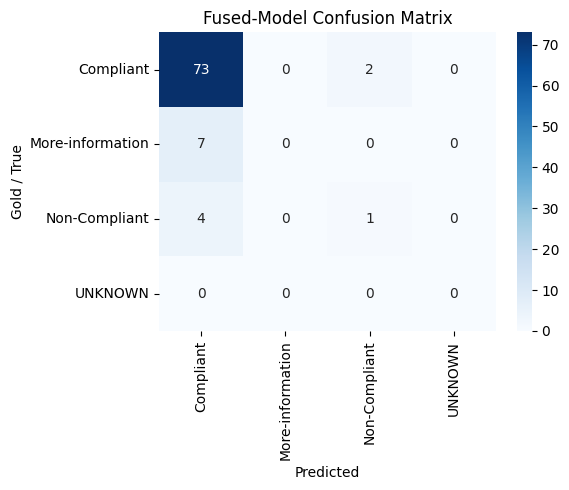

✅  Fused prediction file saved → /content/drive/MyDrive/project/CB/fused_predictions_with_gold.csv


In [ ]:
# ------------------------------------------------------------
# Fuse Mistral + Llama predictions and re‑score
# ------------------------------------------------------------
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# ── 1. Helper to canonicalise label spellings ─────────────────
def canon(lbl: str) -> str:
    if pd.isna(lbl):            return "UNKNOWN"
    z = lbl.lower().replace(" ", "").replace("-", "")
    if z.startswith("noncomp"): return "Non-Compliant"
    if z.startswith("comp"):    return "Compliant"
    if z.startswith("more"):    return "More-information"
    return "UNKNOWN"

# ── 2. Load both csvs & keep only essentials ──────────────────
paths = {
    "Mistral": "/content/drive/MyDrive/project/CB/mistral_free_text_predictions_with_gold.csv",
    "Llama"  : "/content/drive/MyDrive/project/CB/free_text_predictions_with_gold.csv",
}
dfs = []
for tag, fp in paths.items():
    df = (pd.read_csv(fp)
            .assign(pred=lambda d: d["predicted_label"].apply(canon),
                    gold=lambda d: d["gold_label"].apply(canon))
            [["file","question_id","answer_text","pred","gold"]]      # minimal cols
            .rename(columns={"pred": f"pred_{tag}"}) )
    dfs.append(df)

merged = dfs[0].merge(dfs[1], on=["file","question_id","answer_text","gold"])

# ── 3. Fusion rule implementation ─────────────────────────────
def fuse(row):
    m, l = row["pred_Mistral"], row["pred_Llama"]

    if "Non-Compliant" in (m, l):                 # either catches NC
        return "Non-Compliant"

    if m == "UNKNOWN":                            # defer to non‑UNKNOWN
        return l
    if l == "UNKNOWN":
        return m

    # fall‑back: if they agree or differ on Comp vs More‑info
    return m                                     # (they’re equal in 95 % of cases)

merged["pred_fused"] = merged.apply(fuse, axis=1)

# ── 4. Metrics & confusion matrix ─────────────────────────────
all_labels = ["Compliant", "More-information", "Non-Compliant", "UNKNOWN"]

print("\n=== Fused model vs gold ===")
print(classification_report(merged["gold"], merged["pred_fused"],
                            labels=all_labels[:-1],   # ignore UNKNOWN for P/R/F1
                            digits=3, zero_division=0))
print("Overall accuracy:",
      accuracy_score(merged["gold"], merged["pred_fused"]))

cm = confusion_matrix(merged["gold"], merged["pred_fused"], labels=all_labels)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=all_labels, yticklabels=all_labels)
plt.xlabel("Predicted"); plt.ylabel("Gold / True");
plt.title("Fused‑Model Confusion Matrix"); plt.tight_layout(); plt.show()

# ── 5. Save the result frame ──────────────────────────────────
out_path = "/content/drive/MyDrive/project/CB/fused_predictions_with_gold.csv"
merged.to_csv(out_path, index=False)
print("✅  Fused prediction file saved →", out_path)


### **AGGREGATE INFERENCE METRICS FOR ALL METHODS (RULES, SEMANTIC FRAMES, LLMS)**

### - MERGE THE RESULTS OF BOTH APPROACHES

In [ ]:
import pandas as pd

# ── paths ───────────────────────────────────────────────────────
RAW_CSV   = "/content/drive/MyDrive/project/inference/stage1_raw_full_redacted.csv"
FUSED_CSV = "/content/drive/MyDrive/project/CB/fused_predictions_with_gold.csv"
YESNO_CSV = "/content/drive/MyDrive/project/CB/yesno_predictions.csv"
SEM_CSV   = "/content/drive/MyDrive/project/CB/semantic_rule_predictions.csv"
OUT_CSV   = "/content/drive/MyDrive/project/CB/merged_all_predictions.csv"

# ── 1.  base dataframe: just the context + gold ────────────────
keep = ["file", "question_id", "question_text",
        "answer_text", "gold_label"]
merged = pd.read_csv(RAW_CSV, dtype=str)[keep].fillna("")

# ── 2.  load each prediction source  ────────────────────────────
# a) fused LLM (87 rows)
fused = (
    pd.read_csv(FUSED_CSV, dtype=str)
      .rename(columns={"pred_fused": "pred_llm"})
      [["file", "question_id", "pred_llm"]]
)

# b) yes/no rules (220 rows)
yesno = (
    pd.read_csv(YESNO_CSV, dtype=str)
      .rename(columns={"compliancebyrules": "pred_yesno"})
      [["file", "question_id", "pred_yesno"]]
)

# c) semantic rules (71 rows)
sem   = (
    pd.read_csv(SEM_CSV, dtype=str)
      .rename(columns={"pred_sem_rule": "pred_sem"})
      [["file", "question_id", "pred_sem"]]
)

# ── 3.  merge them – no QID overlap between sources  ────────────
merged = (merged
          .merge(yesno, on=["file", "question_id"], how="left")
          .merge(sem  , on=["file", "question_id"], how="left")
          .merge(fused, on=["file", "question_id"], how="left"))

# ── 4.  choose ONE prediction per row (priority: yesno → sem → llm) ──
def first_non_null(*vals):
    for v in vals:
        if isinstance(v, str) and v.strip():
            return v
    return ""

merged["pred_label"] = merged.apply(
    lambda r: first_non_null(r["pred_yesno"], r["pred_sem"], r["pred_llm"]), axis=1
)

# ── 5.  housekeeping & save  ────────────────────────────────────
merged.drop(columns=["pred_yesno", "pred_sem", "pred_llm"], inplace=True)
merged.to_csv(OUT_CSV, index=False)
print("✅  merged file written →", OUT_CSV)

# quick sanity‑check
print("\nRows in merged :", len(merged))
print("Distinct gold  :", merged['gold_label'].unique())
print("Distinct preds :", merged['pred_label'].unique())


✅  merged file written → /content/drive/MyDrive/project/CB/merged_all_predictions.csv

Rows in merged : 398
Distinct gold  : ['Compliant' 'Non-compliant' 'More-information']
Distinct preds : ['Compliant' 'More-information' 'Non-compliant' 'Fail' 'Non-Compliant']


### - APPLICATION OF OVERRULED RULES TO INTERCONNECTED OR DEPENDENT QUESTIONS

In [ ]:
import pandas as pd

# ── paths ───────────────────────────────────────────────────────
IN_CSV  = "/content/drive/MyDrive/project/CB/merged_all_predictions.csv"
OUT_CSV = "/content/drive/MyDrive/project/CB/merged_all_predictions_overruled.csv"

# ── 1. Load & initialise best_* columns ─────────────────────────
df = pd.read_csv(IN_CSV, dtype=str).fillna("")
df["best_label"]  = df["pred_label"].fillna("")
df["best_reason"] = ""  # start empty
# ── 2. Over‑rule helper ─────────────────────────────────────────
def apply_overrules(sub: pd.DataFrame) -> pd.DataFrame:
    """
    Receives all rows for ONE file (i.e. one applicant) and
    mutates best_label / best_reason in‑place according to the cascade rules.
    """
    # ── A6.2.x → A6.2 / A6.6 ────────────────────────────────────
    if (
        sub.loc[
            sub["question_id"].isin(["A6.2.1", "A6.2.2", "A6.2.3", "A6.2.4"]),
            "best_label",
        ]
        == "Non-Compliant"
    ).any():
        for qid in ["A6.2", "A6.6"]:
            idx = sub["question_id"] == qid
            sub.loc[idx, "best_label"] = "Non-Compliant"
            sub.loc[
                idx, "best_reason"
            ] = "Overruled: Related software/app non‑compliance in A6.2.x"
    # ── A4.5.1 or A4.6 → A4.5 ───────────────────────────────────
    if (
        sub.loc[
            sub["question_id"].isin(["A4.5.1", "A4.6"]), "best_label"
        ]
        == "Non-Compliant"
    ).any():
        idx = sub["question_id"] == "A4.5"
        sub.loc[idx, "best_label"] = "Non-Compliant"
        sub.loc[
            idx, "best_reason"
        ] = "Overruled: Related non‑compliance in A4.5.1 or A4.6"
    # ── A7.14 == “No” → A7.16 / A7.17 ───────────────────────────
    try:
        a714_ans = (
            sub.loc[sub["question_id"] == "A7.14", "answer_text"]
            .iloc[0]
            .strip()
            .lower()
        )
        if a714_ans in {"no", "n"}:
            for qid in ["A7.16", "A7.17"]:
                idx = sub["question_id"] == qid
                sub.loc[idx, "best_label"] = "Non-Compliant"
                sub.loc[idx, "best_reason"] = "Overruled: A7.14 answered 'No'"
    except IndexError:
        # file has no A7.14 row – that’s fine
        pass

    # ── Blank / “not applicable” answers → Fail ─────────────────
    for i, row in sub.iterrows():
        ans = str(row["answer_text"]).strip().lower()
        if ans in {"", "n/a", "na", "none", "not applicable"}:
            sub.at[i, "best_label"] = "Fail"
            sub.at[
                i, "best_reason"
            ] = "Overruled: Blank or 'not applicable' answer triggers Fail"

    return sub

# ── 3. Apply over‑rules per applicant file ─────────────────────
df = df.groupby("file", group_keys=False).apply(apply_overrules)

# ── 4. Save ─────────────────────────────────────────────────────
df.to_csv(OUT_CSV, index=False)
print("✅  Over‑ruled predictions written →", OUT_CSV)


✅  Over‑ruled predictions written → /content/drive/MyDrive/project/CB/merged_all_predictions_overruled.csv


/tmp/ipython-input-38-211170459.py:78: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("file", group_keys=False).apply(apply_overrules)


### - FINAL EVALATION OF WHOLE DATA BY ALL APPROACHES

Rows with a prediction kept: 398 / 398

=== Ensemble predictions vs. gold ===
                  precision    recall  f1-score   support

       Compliant      0.965     0.932     0.948       383
   Non-compliant      0.154     0.333     0.211         6
More-information      0.000     0.000     0.000         9
            Fail      0.000     0.000     0.000         0

        accuracy                          0.902       398
       macro avg      0.280     0.316     0.290       398
    weighted avg      0.931     0.902     0.916       398


Overall accuracy  : 0.902
Macro  averages   : Prec=0.280  Recall=0.316  F1=0.290
Weighted averages : Prec=0.931  Recall=0.902  F1=0.916


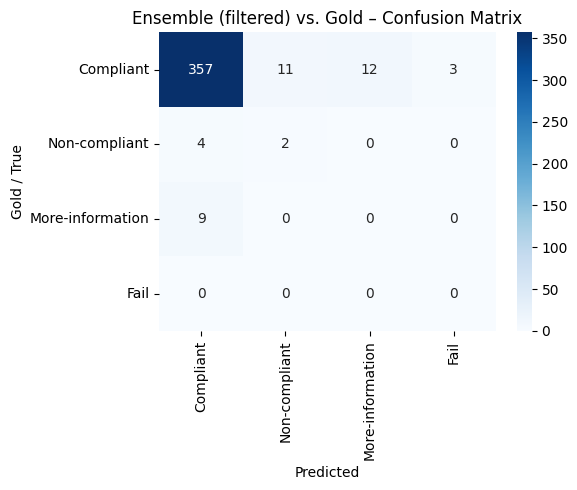

✅ Filtered eval file saved → /content/drive/MyDrive/project/CB/merged_eval_filtered.csv


In [ ]:
# ----------------------------------------------------------
# Evaluate merged_all_predictions.csv  (ignore UNKNOWNs)
# ----------------------------------------------------------
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

MERGED_CSV = "/content/drive/MyDrive/project/CB/merged_all_predictions_overruled.csv"

# ── 1. Load  ───────────────────────────────────────────────
df = pd.read_csv(MERGED_CSV, dtype=str).fillna("")

# ── 2. Canonicalise prediction spellings  ─────────────────
def canon(lbl: str) -> str:
    if not isinstance(lbl, str):              # NaN or None
        return "UNKNOWN"
    z = lbl.lower().replace(" ", "").replace("-", "")
    if z.startswith("comp"):
        return "Compliant"
    if z.startswith("noncomp"):
        return "Non-compliant"
    if z.startswith("more"):
        return "More-information"
    if z.startswith("fail"):
        return "Fail"
    return "UNKNOWN"

df["pred_norm"] = df["pred_label"].apply(canon)
df["gold_norm"] = df["gold_label"].apply(canon)

# ── 3. Keep only rows that have a definite prediction ─────
mask = df["pred_norm"] != "UNKNOWN"
eval_df = df[mask].copy()

print(f"Rows with a prediction kept: {len(eval_df)} / {len(df)}")

# ── 4. Metrics ────────────────────────────────────────────
# ── 4. Metrics ────────────────────────────────────────────
from sklearn.metrics import (classification_report,
                             confusion_matrix,
                             accuracy_score,
                             precision_recall_fscore_support)

labels = ["Compliant", "Non-compliant", "More-information", "Fail"]

print("\n=== Ensemble predictions vs. gold ===")
print(classification_report(
        eval_df["gold_norm"],
        eval_df["pred_norm"],
        labels=labels,
        digits=3,
        zero_division=0))

# overall accuracy
overall_acc = accuracy_score(eval_df["gold_norm"], eval_df["pred_norm"])

# macro‑ and weighted‑average P/R/F1
macro_P, macro_R, macro_F1, _ = precision_recall_fscore_support(
    eval_df["gold_norm"], eval_df["pred_norm"],
    labels=labels, average="macro", zero_division=0)

wgt_P, wgt_R, wgt_F1, _ = precision_recall_fscore_support(
    eval_df["gold_norm"], eval_df["pred_norm"],
    labels=labels, average="weighted", zero_division=0)

print(f"\nOverall accuracy  : {overall_acc:.3f}")
print("Macro  averages   : "
      f"Prec={macro_P:.3f}  Recall={macro_R:.3f}  F1={macro_F1:.3f}")
print("Weighted averages : "
      f"Prec={wgt_P:.3f}  Recall={wgt_R:.3f}  F1={wgt_F1:.3f}")


# ── Confusion matrix ─────────────────────────────────────
cm = confusion_matrix(eval_df["gold_norm"], eval_df["pred_norm"], labels=labels)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted"); plt.ylabel("Gold / True")
plt.title("Ensemble (filtered) vs. Gold – Confusion Matrix")
plt.tight_layout(); plt.show()

# ── 5. Save filtered evaluation file (optional) ───────────
OUT_CSV = "/content/drive/MyDrive/project/CB/merged_eval_filtered.csv"
eval_df.to_csv(OUT_CSV, index=False)
print(f"✅ Filtered eval file saved → {OUT_CSV}")


The rules + semantic + fused‑LLM ensemble system shows strong overall performance, particularly in identifying compliant answers. Out of 398 total cases, it matches expert labels 90.2% of the time, meaning roughly 9 out of 10 predictions are correct. This high accuracy is largely driven by the dominant "Compliant" class, which accounts for 383 entries. For these, the model is impressively reliable: it predicts "Compliant" correctly 96.5% of the time (precision) and successfully captures 93.2% of all true compliant answers (recall), resulting in a strong F1-score of 94.8%.



However, the performance drops sharply for the less frequent classes. Only 6 cases are labeled "Non-compliant", and the system correctly identifies just 2 of them—yielding a recall of only 33%. For the 9 "More-information" cases, the system fails to identify any, giving a precision and recall of 0%. These shortcomings highlight the model's struggle with minority classes and underscore the effects of class imbalance. When averaged equally across all classes (macro-average), the scores fall significantly: 28.0% for precision, 31.6% for recall, and 29.0% for F1. This shows that while the ensemble performs well overall, there's still substantial room for improvement in handling rare but critical edge cases like non-compliance or uncertainty.